In [1]:
# !pip install -U albumentations --no-binary imgaug,albumentations


In [2]:
import pandas as pd 
import cv2 
import os 
import torch 
import matplotlib.pyplot as  plt
import numpy as np
import  time 
import albumentations
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import albumentations.pytorch
from torch.utils.data import Dataset ,DataLoader
files = os.listdir('train')
trainfile = [i for i in files if '.txt' in i ]
trainfile

['gt.txt']

In [3]:
files = os.listdir('validation')
validationfile = [i for i in files if '.txt' in i ]
validationfile

['gt.txt']

In [4]:
train = pd.read_csv('train/'+trainfile[0], '\t', header = None)
validation = pd.read_csv('validation/'+validationfile[0], '\t', header = None)

c:\users\82108\.conda\envs\torchenv\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
train.columns= ['file', 'label']
validation.columns = ['file', 'label']
train.head()

,file,label
0,0000/image_0.jpg,A
1,0001/image_1.jpg,B
2,0002/image_2.jpg,C
3,0003/image_3.jpg,D
4,0004/image_4.jpg,E


In [13]:
# for j in train.groupby('label').count():
#     print(j )

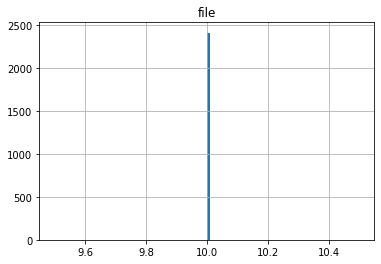

In [15]:

# this  chart  shows that number of  all characters are equally distributed  
train.groupby('label').count().hist(bins = 100 )
plt.show()

In [40]:
# length  of  all characters 
len(set(train['label']))

2415

In [41]:
# Since Albumentation is faster I'll use Albumentation as augmentation tool 

In [26]:
class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        label = torch.tensor(label).long()   
#         label = F.one_hot(label.to(torch.int64), num_classes=2415)
        
        file_path = self.file_paths[idx]
        
        # Read an image with OpenCV
        image = cv2.imread(file_path)
        
        # By default OpenCV uses BGR color space for color images,
        # so we need to convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         start_t = time.time()
        if self.transform:
            augmented = self.transform(image=image) 
            image = augmented['image']
#         total_time = (time.time() - start_t)
        return image, label, total_time

In [27]:
albumentations_transform = albumentations.Compose([
    albumentations.Resize(256, 256), 
    albumentations.RandomCrop(224, 224),
    albumentations.HorizontalFlip(), # Same with transforms.RandomHorizontalFlip()
    albumentations.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), 
    albumentations.pytorch.transforms.ToTensorV2()
])

 

In [31]:
# len(label_dict)

In [32]:
a =[1,2,'3', 'd']

for i, j in enumerate(a):
    print('i = ', i, 'j=', j)

i =  0 j= 1
i =  1 j= 2
i =  2 j= 3
i =  3 j= d


In [33]:
all_labels = list(set(train.label) )
all_labels.sort()
label_dict= {}
for i in enumerate(all_labels):
    label_dict.update({i[1]:i[0]})
label_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 'a': 36,
 'b': 37,
 'c': 38,
 'd': 39,
 'e': 40,
 'f': 41,
 'g': 42,
 'h': 43,
 'i': 44,
 'j': 45,
 'k': 46,
 'l': 47,
 'm': 48,
 'n': 49,
 'o': 50,
 'p': 51,
 'q': 52,
 'r': 53,
 's': 54,
 't': 55,
 'u': 56,
 'v': 57,
 'w': 58,
 'x': 59,
 'y': 60,
 'z': 61,
 '가': 62,
 '각': 63,
 '간': 64,
 '갇': 65,
 '갈': 66,
 '갉': 67,
 '갊': 68,
 '감': 69,
 '갑': 70,
 '값': 71,
 '갓': 72,
 '갔': 73,
 '강': 74,
 '갖': 75,
 '갗': 76,
 '같': 77,
 '갚': 78,
 '갛': 79,
 '개': 80,
 '객': 81,
 '갠': 82,
 '갤': 83,
 '갬': 84,
 '갭': 85,
 '갯': 86,
 '갰': 87,
 '갱': 88,
 '갸': 89,
 '갹': 90,
 '갼': 91,
 '걀': 92,
 '걋': 93,
 '걍': 94,
 '걔': 95,
 '걘': 96,
 '걜': 97,
 '거': 98,
 '걱': 99,
 '건': 100,

In [34]:
labels=[label_dict[i] for i in  train.label],
labels

([10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

albumentations time/sample: 0 ms


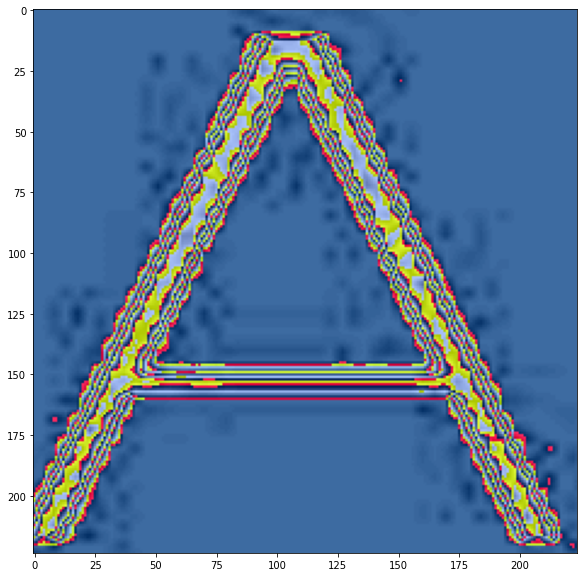

In [35]:
albumentations_dataset_train = AlbumentationsDataset(
    file_paths=['train/'+i for i in train.file],
    labels=np.array([label_dict[i] for i in  train.label]).astype(np.uint8),
    transform=albumentations_transform,
) 


total_time = 0
for i in range(1000):
    sample, _ , transform_time = albumentations_dataset_train[0]
    total_time += transform_time

print("albumentations time/sample: {} ms".format(total_time*10))

plt.figure(figsize=(10, 10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()

In [37]:
# os.listdir()

albumentations time/sample: 8.959131240844727 ms


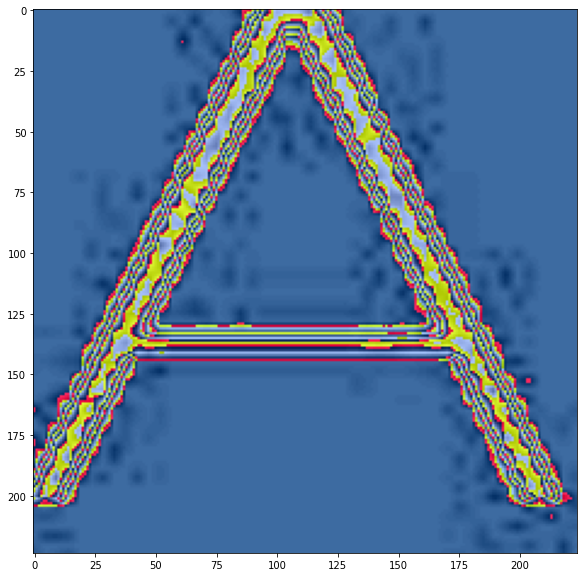

In [188]:
albumentations_dataset_validation= AlbumentationsDataset(
    file_paths=['validation/'+i for i in validation.file],
    labels=validation.label,
    transform=albumentations_transform,
)


total_time = 0
for i in range(1000):
    sample, _ , transform_time = albumentations_dataset_train[0]
    total_time += transform_time

print("albumentations time/sample: {} ms".format(total_time*10))

plt.figure(figsize=(10, 10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()

In [189]:
# import torch
# import torch.nn.functional as F

# x = torch.tensor(1)
# F.one_hot(x, num_classes=6)

# # Expected result
# # tensor([[0, 0, 0, 0, 1, 0],
# #         [0, 0, 0, 1, 0, 0],
# #         [0, 0, 1, 0, 0, 0],
# #         [0, 1, 0, 0, 0, 0],
# #         [1, 0, 0, 0, 0, 0]])

In [39]:

# data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAkgAAAJBCAYAAAC9EUpnAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOz9faw1z5YWhq3a3+d9JxJ2ZjKaAFcD0WApIGUifsJ/JHYmIY5wRIKIIsxEcsyHuCB5FEWyFD4SBQtkiSRgZAkJ5SJGeCR7gGiCjdAkNkZySKSQcAdHDjYmYcggz2g8cw3YM/c9+3t3/njfp86z11mrqrp373P2Pmc9Uqt7d/fuqq7urnrqWatWpa7rJBAIBAKBQCDwhMlrZyAQCAQCgUDg1hAEKRAIBAKBQEAhCFIgEAgEAoGAQhCkQCAQCAQCAYUgSIFAIBAIBAIKQZACgUAgEAgEFK5GkFJKvyGl9LdTSn8npfT7rpVOIBAIBAKBwNhI14iDlFKaisj/R0T+KRH5aRH56yLyg13X/YejJxYIBAKBQCAwMmZXuu6vE5G/03Xd3xURSSn9WRH5TSJiEqTv/M7v7L73e7/3SlkJBAKvgUs6X9Z/U0qXZGe0awQCgbeDn/iJn/hPu677LuvYtQjSLxWR/5h+/7SI/ON8Qkrp6yLydRGRr33ta/LNb37zSlkJBAKMEnG5hJjgv3wNa9/Q85EPzo+VN+s875xLUMtH639LaCGZpbK9Fmr5v3bZBwJjIaX097xjr+ak3XXdN7qu+6rruq++67tM8hYIBO4IJQITjWIgELg3XIsg/YyI/HL6/cu+7AsEAm8YQZICgcBbwbVMbH9dRL4vpfQr5DMx+q0i8j+5UlqBQKACbXJpNbOllNxz+xAeXIevx/uQrrfPSlOnP9TkNcQcZeXzkjyU0vFgpVna95Kw8qGPWQgSHbglXIUgdV13SCn9kIj8WyIyFZEf7rruP7hGWoFAoB8snx/e1gSJ17ytyYuGJleaVJT+511/LFLUB56PTyhjgcDbxrUUJOm67sdF5Mevdf1AIHAZNCHSZMlSj2oKj0ZJYelzHeua1r5LyEof53WL/OG80j1fGzrtl05fo6/T/63kOxAQuSJBCgQCtwsmRR5R8hr4ViXI+o+3bwxyNDY8pc1KdyjZCwQCt4sgSIHAO4VHjrB4xIi3WwmLdW6JSJSO9SVJQ3xwSuqa5/Pz0iTJUousPA7FtXyXgkAG7gVBkAKBd4RaPCJeLIxJAMZ0AB8TJXKkf5cczAM+opwC94AgSIHAO4NFhLquk9PpJCKS19zoTybPI4LcS2TrEhHTqJEjfZ5OIxr9QODtIAhSIBDIsNSSkuOv50NU898ZGiG6L1rTLvlkWf9JKZkLH8M2r/U1LsG1RtENHaI/NJ1aWkE6A6+FIEiBQKAKrY6w4sSEgNUnS6Xy9pW28XtInkv7PNNZaVQfAEVtMpnk++dt3qfPw3WsfUEGAoHbQRCkQCDQjJJTMtYgT9jHpjs+zuczIdLH+PqlPLUeayFJ+p4Ai9xgW69r+3A9kKhWU2DJOVufMwQtzt99TZaldPi8IIiBW0IQpEDgncEjN2jAPSdt9knibT5+PB7z+nQ6yel0OtvHx3gfk6fj8Sgiko+V8sNrC2Ob9yziM51OJaWU15PJJB+fzWZ5PZ1O8/mTyURms1n+PZ1Oz9Ko5S2IRCBwfQRBCgTeEZgcaWXEUzA8xUUTlOPxKIfDQU6nkxwOBzkej2f79vt9JkwgSTimCRUfY8XJyldfP6Na+ZSOgfgwKcI2yBCToPl8LpPJRBaLhcxmM5nNZnnfcrnMxMhygi/lK0hSIHB9BEEKBN4pWhpdz0mbj2PN6hATJBCj3W6XjzGR4vOx3XWd7Pf7M4XJStfK11BypMvEigPFBInVHyZFvD6dTpn8sPI2nU7leDxKSskcNajzUNvXcv5Loq9KN/Q+A4FrIghSIPAOURuWbpnPeNtaDoeDbLdbOZ1Ost1u5XA4yH6/l+12K8fjMa/3+30mS7vdLu8DWeJj2Mc+TZyfVkfuWoNdG4GmTWtQgabTaTaVzefzM3PabDaT1Wol0+lUHh4eZLFYyGKxkIeHh6wcnU6nfD2RcyXJe0a3oB71CZ0QCNwrgiAFAu8U2tzmNbql0V7sdM0mMpjWQJKOx2MmPCBIIE0wv+E87GOCBL+k2kgzDy0EyRtRxvthTgNBgtlsMpnI4XDIx0CQtBkOx6G2TSYT06fLM4XyMf6t7/MlCNSlDtuX5DucugMvgSBIgcA7g26IS8cBjxQxOTocDpn4rNfrrB6t12s5Ho/y+PiYVSaoSZvNJpMiECI+xgTJGtWmHbi9xrrkdC3yfNi+PqYdsheLRVaNoBiBNGHffD6XDx8+yGw2k8PhIKvVSlarVVaZoBrN5/OsJJV8kZiQBDEIBK6PIEiBwDtESYXwoE1qPBINBAmmMhAeEKTD4SCfPn2S/X4vm80mkyYc22w2mSDxMfgvHQ4HETkPAcB54n06z7VyEDknQR5pYv+ixWKRSREUIyZNWA6HQza9obxAjlarlUwmk0z+kF9LPbJGHgZJCgSuiyBIgcA7QB9zRskx2/M/0moSm9jY1AbzGpQmkCKQKRAoKEgwu7UoSH0JkhWLyAr2yOY1EKSu67IT9ul0kul0Kl3X5WMoj/1+n9cwx8G0xiP3SvdQI0yeCc4K49AH1jvTF5f4KYUZLfDaCIIUCATOYJGjkomNfY6gIIEIbbfbTHQeHx9lt9vJZrPJ5rbHx8dsfgNBwrH1ep2JlCZIOk86v33vtRQR21KQMERfK0i8b7lcZp8jmNNSSrJarTJpwmg2kCbOk1aytGpUGvFW8ysLBAJ1BEEKBN4ZWp1rrdFTvF1Sk0oLCAETK6048e8aQWq5l9p9gkzAFGapSkxUEIoA+6EoQUWCQsRqEStGrLjp8tN5KpnZrHvAsdL5/D8Pl5RpIPAWEAQpEAiYsBpu3ajrbYsE6aCR3uL9hwnSNe9VA0QJa5Gn6N4YVYfRa9PpVA6Hw1kUbexLKZ2RPl5zYEyA1Ssmbpr0aHLTQpICgUA7giAFAu8QQxyaWxQkjzBZ0bK1ouKpTdpPx2vs+5CAIcoJEyUmT7yNY6X7Ox6PZ/5LrCZpvx9LxfOIEW+3kqRbJk+3mq/A+0EQpEDgnaGVHHkKUouqZDltl4iSXvR5rLBwoz5mDCBNMjgtmNKYBDFBEpGzOeRwrt4ulRPOYwXJumcLl6hGt0ySAoHXRBCkQCBgouZf5JEhj/jUzGuWqY3Jksjz4I2euWnIvVojwnBMr9nEBh8kmN88E5t3fyUTG9LQ94w0S2pamNgCgcsQBCkQeKfoa2YrjRqrOW3rbSZWlrOy57ysUYoL1JcUlEgSjkPp0YQR/7NIZMlvy1r0PXj7PGdtfS8tw/2ta7w2LlUEA4FLEQQpEAi4KDXkaOxbTGaekoQ4R1pJ4n1aseE11BRgDCXJ2ubfrBbxKDZ20EYe9/u9pJRMZ3XPCZ0VJK0kWWlaCFIRCFyOIEiBu0NJ5eiLMRqSS/LzUg1Z3zxqNaPmi2QNWy85bOulZMLT6ZackscsT33/8BFiXyH2QWJfJD7Wet/Iv0V6vHu2VK+xnLEt/64SaudoRWgM1ar1vQ7CGBiCIEiBQMBFSTHCPGmsBnHEbL3sdru8bSlG2om51PhZKos1j1rfey3tt8pCO2mDiLDfUUrpWdlg32w2y+WiFSIdf4n9nWq+RbdgniqVZxCWwD0gCFIgEHChiQATGRCbEjHCtCLWNv4LkqSVFYZ2zuZta3qQS+/Z2sZvlAlUInbO5sYfJjYReVYuIEjT6TRHHMfQf47YDWdvdtBGPkrk6LUJSIua9Np5DARqCIIUuAt4/iBD0eK42jdPffJlmRmG5qNv2i3nabONNqP1GaFWGqmmTU06bzy3GfLFCgvv0+apPiYiz2RVc9rGWqtK2sSmywoBJll9wz1yZG5WkZCGRQI1cbSe52vA+24tB3Jd7i3Xq8H7zkppBAJAEKTA3aFGTCzfhpeoDPtU3vfSg0ajD1LDE81ut9u8hgry6dMn2e/38unTJ9lsNrJer+XTp0953jXMzbZer+V0Oslutzu7Pg93x9QdIk9xhyzVSE8JIlKeJsW6R012QHAY3NhigfM4ExdWmLbbrZxOJ9lsNpnULZdLORwOeY17mE6nslwuZTKZyHw+l9lsJpPJRBaLxdn9Ii9875aC9trvF5ep3ifik6Sx8/Da5RC4XwRBCtwtSqpSSRHgc/tWnq2qUc1/Rp9zLeXo0h43r7UiYs2h1qIcWQqSZ1rTo7UsYuQpSEPQ4t/D52LNpAhO3J56xArSdDrNZrfT6ZRVIyZ7IGpM5FoVIz5Wup/avZaUGK9ceNv7RkplXUqzj1I7pkobeF8IghS4e9R6qhrXriAtonav0Ca1w+HwTEFar9dZQVqv17Lf72W9XmeliPftdjvZbDay2WyyAqNDBYjIme8Nl6dFlFr9j0qmMizsR6Sjd1vXYvKCfGOdUsoK2W63k+l0KtPpVDabjRyPR1ksFjnS9nQ6ldlsJqfTKa8Xi0UmTPBPmk6nZ9e3iNJLK0ieGVITyNr/x+gkWMrhPX9/gddFEKTAXcNSOvQx4JpSvpcf3r63ilr71WgVZLfbyeFwkO12m5fNZiP7/f5s33a7fbZvt9s982vSDalWg5gMeASp5Z54jetqcxrS8BQQVj+0+Q9EC8qQiJyNWGOzG3yNZrOZzGYzSenz6DdgPp+fmfF0WbSQo9d47yxyZH2PY3wbtQ5JkKTAUARBCtwVSgTEa/xaHUCH5qWWD88Rdcy8lPLm9d5bTC4eSbICPpYWDgPAASBZidEmJJFzklQiSPq4VyaWWsH+Q1o1KqkbulyZKIEkISaSLisRyaPZ5vN5VppAlGazWVaPdKRuqzy8+2493opaOXhqUYkkYb/lk1RKy7ruS31fgfeBIEiBu4FFQKxtNtMwrEbxmnmz0nqJ3myrqbEF2ueI4xltNpvsfL1er2W73crj46Ps93t5fHzMJrbHx0c5HA75HKgoNd8T9jHC2jMtaQWnVC7Wmv9nmdv4Gvpc7SvE+YBpbLPZ5GtMp1OZz+fZ/wiYz+ciIjKbPVXLXdfJYrHI10e6ltO2Lr+XNrUxLKJkEWBNbPrk9S2ptYHbRBCkwN2jpCaJlHupY6ZfIkcvTZJa0NrTRsPGSpI3tYg3GaueeNaafLa0Lo3Wso7p+8Nx73nwEHv2K9LX88iSJmZWWfG9Q13iMkspuVG4+RmUnlmJFI1lxur7P08J8vLTQnI8Rarl+oFAK4IgBe4Spd5pqTJ/yYrTUiiuTdbGhDataXMalCT4HpX8jXSgSCgn1qg0wPIz0udba+Tduh/rd9c9za2myQyrktoEp6+hAdOaiOSgkJPJJJvTFovFWWDI+Xx+trBPEsgTO7Lf0vvUl0Dd6jsfCDCCIAXuFlavuqVH+RIyvNUYtyhJpYbmJfOLfZZypH2QPH8ja0oR/s33xfOcWaZRiyRhODxGu1n/9e6PfzP50aY6NrexL5B3fX1dT2UTefJBAnnsui4TR5QTTHTWNCx9lUlLUauhhWjW9vdNMxC4FQRBCtwNSg6Y2pfB+i9vX7uiLvnCWGjp+b+GOsANslaULNOa15hbo8Rwfb229ml/IwyZTyllpQX7+L/WO2Ld336/l67rngWs5FF2njnNuz7+x9HAS0QTZjc2v7FJTpvcdJ6878N7b/oSKm9fCV4e9PP00i8pgi3pBgKXIAhS4O5gVZqWqcH630tUnLWGVOO1zSMeasTIU48sPyTPl4ZNWOz/Y/kgadVoPp/nqNOTySSP/LIa4tI9nk6nHKgR98C+QCKSVR+t3njX5Gt7ChJMZ+yszWsoSJo04ZraUdtCq7p0CUodEi9d/XxblT/rOi+hCAfeJ4IgBe4KraSDTSWvibHTH7MxqJWjNl1a5jb+jW2tOunFSsdyci6RXDa3gTAhnhDO43XpHpFnTeQ8528rr3rbMv1aKpK33ytfvZRUI73Pu399Tqs65kGTlhpJ0tftq75aJtlAYAwEQQq8KQyV5ANP0ApIa/wjOGBrXyOrsdd+P/y82Byn/YGguMxmszxUfrVa5TnLMCRehwiwtpHm8XjM0a0R8RoqD5sLcV2LvGlVjIkP7pPLUORJQQLB67pOdrudiEguU+QFTtqsIjFwv5rYYd+YpEGrfx5alK3S9WvntZ4ThCkwFEGQAncPy6TVx8xyS+jbONRgEcYWNcBSK7xh6576UVI+kIaXPyZFVrBIKEesHmH0l6X46PLUBEn7+YhI9ktCOp4fVa3cLJXNmq8N+2plWlKRSt9CSX1sUY14X+l90ml677GlFOn3Xx8vfddDCVkg4CEIUuCuoRsE3TC0mlpeG9f0EamlW9pXIkbe6DRvIlpWYkqmFG74mSiJnBMkRJzGkPjlcimLxSKrTHw+tnkfrsk+QUBKT8PrMdrMulZJRWFyhLWlIMEHidPSZYnRbLxwXq1Jeq9l3q2Roz55aPHl0ua/VnNdax4CAQ9BkAJvBhZJwn5e3ypemiS1kqNWU1uNKFkKkpe+5xPDE7syMcJ6tVpl0qH9lVoIEpMzkJXdbpdVpFp5WsoRzGNwuGaChHuCwzVGszH5tAJtamd2Hi3HI/k8VbUvhpCjWppa9Wo5D79bFeJb/+YDt40gSIG7hUeIcMxTkO6l0qyZLsa4ttXgYe05C7eY1DQpakWL4qDNbOygPZvN8j6RcgRuviacuzES7nQ6Zb8gJjA1BalkNrL8kryh/yVTm74GyqJkbrPy01Le3v+s96dm0tTXalGP+P/WvbR2fu7lmw/cFoIgBe4alomNj/Ha2/fWUOuRi5yTIN2AY2Hna46Azb+xzcc9M9tQVY8JEatHi8VC5vO5LJdLmc/n8uHDB3l4eDhTkFomtYWvEdYgRbvdLl8L6o9FArQ50AL7GSFCN9Lj/MBJG2U6mUzOhv7v93uZzWZyOBwyiWPHcX2PHrG4BCUFEGj55jRJ0u+hdc3XMkUH3ieCIAXuEp5qVJLfr02OasSkJd1a777VXKIVDuStphhh3Ucx8tSOVvXIU3a8c1g9YgUJ5EkrSPr6lqmMVSNeYLrShEPnqcUXSStIuoxbHN554WtoosHPu8XMVUJNOSqh77dWUqY8NcxTlQKBSxEEKXD3sMwK2OZz9L6x0vXMGpeawa4BrRxZpAYKB8+lpudW0wv7IHlESRMbEdv0hWNYawKE0WqsIC0WC3l4eJCHh4ez6Ue8hQElDGoNfJFms1n26cHC5ApKE5crl6/VmKPMRZ58nrg8LAVpu91K130OAQATIMIRgBAin5YZcIz3RUO/30PTZBLtKUhczjrtIEOBayIIUuDNYaifwtC07pEkMRkCkUGDjX2WKY3jHWnHbD3dCKsmDBAlbOtGXfv7sGmNR65hgYltuVzKcrnMI9xq10VZIIZSSinf2/F4PCNImtiJPCluOjYSp8Xp4D/4nx7NltKTkzbHQeIRbjCxIfI38ofrczgC9ksa+p5Y2xp9vy/rnaiZ10qqWJClwLUQBClwc+gj31uVY0vP9qUq00vS8fww9LGaaYrPt8w9mtRABbJGpelRVaURa5bfkUWIaguTE88xm4kTCJLIcxObZxabz+emWqQXnS/co74nzxzEChITmdLINWvUIMgVE01czyOmFi4559JvqJTPWppMmIIYBa6FIEiBu4al0oRPgg0mSawaoQGGKoF9m81GNpuN7Pd72Ww2z8xseo1GnEmXVlZALFjxwFqb2HA+kxaY1haLRTatrVYrWSwW8uHDB/nw4cMzBalkZuu6TubzeTZZ7Xa7rKQhKvd8Ps+qkjax8TbfF+eflQ8mkFCLmCjAnLbdbmWxWJyZ2LbbbSZu2NYKkjVh71gq0jWhSbvXOWAFKchR4NoIghS4GfR1/OwrrVvnXcMnqc91W0wXrdfocy+6QbKGmnvxd0qBIGsxjyxFz1KV9H6t4rCKpBUl9kHynLT5WVnO2Z5q5Clg1j15z4nTRX6sYJC1coZqpAmYJm4t70Xt27sGUSr5HlmdniBEgZdGEKRAYETcqt8RoEkRm3R2u132PTocDlk1YgVps9mcOW2zo7blx2SZ2TwHbW+xFCSsERxyuVyeOWlbCpI3Gm06ncp6vZaUkiyXy6yGwewGx2gslpmTG3f2A7IUJA4XgHN5LjasEWagpCCJyNkEvSBZvP8lcIlC5Zl/9Xn6P9rPKxAYG4O/oJTSLxeRHxGR7xaRTkS+0XXdv5JS+hdF5HeJyLe+nPoHuq778UszGnjbGEIqLqkch/63ZNKr+UNdG33UAq0csVrBkbHZGVuvS87ZHjlCHrVpjVUYy9cHqpDlsA2TGxZNkKzr6bKYz+dyOp3OrmspStr/qKR8eWWv/8cNPk9vwpPV4hgvIG9MjCxVqfQe9NnPGFuN9cgRm9P0vkDg2riki3EQkX+h67q/kVL6L4jIT6SU/vKXY3+867o/enn2Au8Bt6y4aNx6XkuNh2VWY+df+CBBQWoZtcaOxWzi8ZQAz7TGRKY2zN9yzm5x0rYUJOR5Pp/nkWuWuY3XVrkiLU1+rPPYxMa+SyhHmNy4jJk08Sg2vk/kzYqL5OWltH0pLiUxY/hQBQKXYDBB6rruZ0XkZ79s/2JK6W+JyC8dK2OB94FbJxx9cA/mNY8YHQ4H2W632Tl7v9/Ler2W9Xr9zEnbi4OE64s8+dcwUWKFxVKSQGB0kEc9rJ+dtK2FFaTaKDY8r8ViIV3X5WuziQ3pgkCllLKZzFKB8FuXPcAEhhWflJ4myN3tdpnsbbdbOZ1Ost1u8/0sFovsb4W8wEyHEW6es3ONHJVIbSuC0ATeAsqzLzYipfS9IvJfF5H/x5ddP5RS+vdTSj+cUvpHnP98PaX0zZTSN7/1rW9ZpwTeKbQCUVss1PxaxkzLStfKR8v5Y6CUb71fR3H2hu+Xpg/x0iuVlzZHsXrEZjXLGdsaft93sdLS6Vr7rLxa71btmXrlZjnMe87z2rRZUu9aiZK3r/X9t55z6ztufTul44HAtXGxF19K6TtE5MdE5H/edd0vpJT+pIj8Yfnsl/SHReSPicjv0P/ruu4bIvINEZGvvvrqdrvdgcAbATfCUI9YBdpsNnI4HOTx8TE7ZD8+PmY1CedAYdJmN06Dt7lh1Q0gq0ZwgGa/mslkkh2xEQwSTtlYtLLEo9hKC5eHVqkOh0NWlVhBWiwWz3x9+Fo1kqgJiCaKPO8anLQ3m01WtPA/OKxbChJUKB7tVnsv9LOz8ljCpcSF/6+d3LGvD9kKBMbARQQppTSXz+ToX+u67v8oItJ13c/R8T8lIn/pohwG3g1qvVxgaAX5kuYvNr3ofVaeSvc05H69srSUCh2IkMmPJkE1JYnTrikYrB5pxYhJk/Y74n1aYfLUHk5PkxqtTFnhA/QoNmt4fYsPkjbD8j6t6PFzgfmNJ6sVkTOfJe0k36L6lJ4Vv8Mt72ff95TNjH3NekGSAi+BS0axJRH50yLyt7qu+5dp//d0n/2TRER+s4j8zcuyGAgELoXXADMhgi8R1CMe5q/9jSzihHSstBlMUixSAt8arKEMscLDTtnaUdtSkESeB6BEeeio3PwbDtxQlWazWSYjTGxAmnB9rEuKDJMTVnyYrE4mk+zfhbnZJpPJWVmwoiQiOaBliSR5hNZTuDwMJUf6/1b++JwhZsxA4FJcoiD9N0TknxWR/3dK6f/1Zd8fEJEfTCl9v3w2sf2UiPzuC9IIBAI9UfIjscgRiA/I0Hq9zuRovV7nmEh8LqtNuJ5GTXWwhu6z6Qi/4ZDNZjQmTLxtESSkpxtYEAA9So7NbdrEhryJyNk9o1xFnhzOPXXEM2XhmYhILtuUUnbS3mw2+XyoSByrCfPJgVhZBKlk8muFJiiXEBX+LytXKD/8tvyRAoFr45JRbP83EbHe0oh5FLgIrWaBvmassfNRSrM1P0PMEt71ao1fzRnYm/PLcwrWZrbaPXlkxTKzeeYtayk5Yus0eRtmsZJTto7BhIab157CwfddMzvyNTWRhY+RNoOKfCZS0+nUNLF58N4TT22ynqdFjlrfZc+0pr9njxRZzzQQuAYiknYg8AbRoiKxggS1aL/fy+Pjo6zXa9lut/L4+CiHw+HZcH8rcKSIP3qQwfs9BQnK0Ww2k9VqdeakjTnYsGZFCSqKVpCQLq9BSOCkDYWI1SKRzyEAQA4RAgD/R7liqhDsZ7Lj+WbxMHwQBm1OgzoEIsSO17hfnLNcLkXks4M3/JJa/JD43fDISauzdis0SWox5XnvUyBwLQRBCtw0Sj3aFgfnIdcfeo0+PehrwlMrSk7arSpSbW6w2j17hKWmIPUZ7o/rlUxB7D/UJzwARoppBclSrErvlkWevHLVChKia8OcBl8pHurf6qTNedH7LnmfLXW39P/aN+SR3UDgmgiCFLg7jN2bfQuwzCQ1/yPtoM1O2hwQEuEA9NQjbHIDQWLi0AJNhuD/AwWJVSPPB0lPDwIFSaRMzJgg6fQxzF/kSUFClHFNklCuLffukRFNXnn0GqJmI10RyWY1BI/Es4NTtx7ZBnOiTsuDp/rV9o2FFqI0hg9UIFBCEKTAXSJI0nNocuQ1vJ5SpKcVAUFic5w33F+bZ9AgMyzlz1KMQJB09Gze1iPYLH+kknmNy0irVUy4eBQbm9ig6mjnbLyXNfJgkRQ8I1aLoBJ1XZedtkEAsW86nWYCC+LEC8cV8sx9upywfQ1S5BEzbW4rqUrx7QdeAkGQAq+CMUxbfa9/SZqtzqst51ySD8904alGnlnNM61ZJIpVIr6Wvj7nzTIxeb/ZUdubkNaaRFab2iw/lZozMRManb6Xh5Q+B7Psui6fD6JVMjX29QViUisiZ3O16QlscQy+VJYptE8+auTSU+RKadQUK/3eeE7a1r4gTIFrIAhSIHDn8JQjNIpw1tVqkVaMrHhHaHwtsxoTJU67RI6YjDA5YTIChQhO2NpJm01sFnnC9ZEeoBtT5EkTMqhFmNdttVrlvIKIsMlKR7K+RGVhIgtiBBMbD91HXjD0f7lc5sjbvIbqBEJVIzleWb0EAbFIkpefl85b4H0iCFLg7jBmhTiGqtQ3P1rB6HO+lwdsWz4mnpLkKUvW4l2zBD6uGz2rAWTy5A31Z5WHnaO1gsTl5jWu2hxm5cGKqA21yAsr0Kfh9srFU5LgW4RRc9rPyHpmlsO2p9T0UY68Z+nt847pvHjm89q+IEqBsREEKRB4A9ANKzeSaDxZQdIO1yUVCQpSbZoRNG4gEB7YP0mTEQ7SqOdd0woSq0hMmpgwAdY2m8YwhB7pd113piABHA8Kig5CHOAarSTCUkpwrlaQUF5sLjudTmdO2tvt9pmCtNvtROQpXpJFBjk/LUrNJcrNJR2CIECBl0YQpMDdweth1v5T2ldyVr0mLknH8zvS5i8vIKTnsM0kwPJNKqlKuCfPVML55GOaJGknbWu0GqtKnhKky5jNa3xcp388HmU2+1w9wuSGUWzwQQKhAjGyAlRyuXjQ5/IzgylNk06QHU16sVi+SFohs9Ln3y0kyULN96xWBmOcFwiMgSBIgbtEH5LUlxz1vf4toGRG007ZmjB5EbNr8Y90mtq3x8unbpwtsxaTIYsgsWpUctZGGhrarGOFG2CChHuez+eSUsoqE4b9awIyxrOEUsT+WtiHSNqYvFb7iFnPENeC8sWBLrmsvHKrkaO+prY+aDW5BQJjIghS4F1jrAr8teH5rLCJTQ/r16Y2bWbDtqU8aaKEPJTyh8bX8oexTGzsoL1arbLjNhMmPdTfCthYg2diWywW2cSGa8LcCNMVtruuyz5BlxAllIselg9yxI7acNKeTCY5dhVMa4iHxKPdkEcmqawmeaY3xkuSklJaQY4CL4EgSIFXQYvaMDb6Sv+6EX8ttDq8Wk7aLU7Y3jl6v3VtKz+tzslYa78hSxXyImf3Mau15InT187iTKS8uEva90mn75kh9X+sctZqIPJSim7Oi+dz5D3LMcy/rRhKhoIoBa6JIEiBd4m3ohyJyFkjqE1lp9Mpq0DsfK0XrSBxYEjdCJcIkuWroreZTHBwSB0pe7VaycPDQ3bS5ujalnJkmdcs6GM8hQh8d6AgsX+RiGRist1usyM3FCQoT8iTyJPjtkUu2cQFAqPJEJcxhxYAdrudzGazMydtXm82m7N7QRBOy7xW8kt6LdxKPgLvE0GQAq+Ct0BQrlV591WMeNtTDzzHbM8/yTKjlRyzGZ6K4y2lYf1MgiznbMspugRPWfJ8oWCWYt8n7LPmieN8adWGfYj087QUJADXYcKENGpO95YPEqfRaiK1cI1vOHyNAreEIEiBwJ2DfY64cWTl6Hg8FtUiPYWIRY6Qlmd6ZH+W0sgyHZRRO2Pr6UWgKI1FkjSYGGnCA78jEclqXEpJFotFLlsoR6wgIeK2FQpBE00mTdY9aCKCZw2CxH5kmHZEK0goZ+QPpAv3imf2GggCFLhVBEEKBG4Irb1yyyFbO2IjdpEmSJiItkaSOGK2pTaw/4ylClnbKSWXDGlCtFgszuIesYmIFyZHQ/3GdEwkkafh/Ri51nXdGUHCKDZMasvO3fP5PKtIlh8QnKyRtkeStGKIYyBIPIoN8ZK2262IiGw2m5xPJkgIYcBqGUhTn/dvDAQ5CtwygiAF7g5jVqpjO6e2XL9vWp5zec0h25pbzSJArU7ZtftoJUqeA7RlYrPUIs9B+1JwPtnfR5vatIlNq05snmNfH95Gevr5anJkneM9c8/MNp1Oz4JZ8j3q63nwjpXUxNo1aucHeQq8NoIgBQJ3BN1QWn5GUI92u52cTp+jLR8OB1mv17LZbM5UJKz13GtaQSr5H1mEiEkMGmWsLeVIq0aIos2RtCeTyZmSNJvNRjOxgbzAqVpE8mg1kSfzE/YhuvZut5PlcikikpUk3AcrSDCtsYLEZVgiIB5BTimdmdUQemCz2cjpdMplBZLEChLygv1Q9piU1XCJihTkJ3APCIIUuDt4jq1jo7VX+1LO2poc6bXlpF1y4m2Zx8tyBLfy1qIgaeJUcs729tWG91vlZZms2HFaO1KzuU1EnuWFh/mXFC4sfK1SHkrPWd+XpyBposxxkEQk/2aS1MdZu/VYy3cSJClw6wiCFAjcATxyZKlIep41KEiWYqT9j/ooSNzAY10yoWFt+SBpRQmqEXyQ4HtUctK+BOywjPtDBG0ROXPUhpIFlQZ+PuyLNJ/PRUSyOgNnb+STTXjaCb70/DUJgYKEZwnn7K7rZLPZZN8iVtxwDVaUoHZp37IahnZWghwF7gFBkAKBG0eJHGHbG8XGZKk2iq3km1TyUdHqC5MkdqRmomRNJVJbJpNJdpjW5AjroU7aTO5gVtMqksgTUVosFtmBm0kIkxH4KmlfG5APNr8xWbKePx9jIqOd8lNKOS7TYrHI+eD8Ij2oSojt1Ndk5jmQt5R1IHAPCIIUeBVYzqe3jmuYCLweuKUYWGY17VxtOWRb04u0zLlWM7NZ5WOpSJogWXOqsTqkVSJLLWoJCslqCOdRl6s+xvlnkgTTmjaxIbikFS+JA08C7ASO6+p8eOZMzwdNP3cOAQCFSUTO/JGgaLWS4Zrpr4YwsQXuDUGQAoEGvEZlrhskz7SmVQSoRdvtVo7Ho6zXa9nv97Jer/P2ZrM5U5UsJ21cW+T53GAW6WAyxCSHJ3idTCZn5jNr0cP7edg8j8IqkaS+piK+BwCqCkiEiGRSwXGQ4KSNOduWy2U2femYRVyeKEM2EWpCp585H7OevYhkBYljMc1ms0yOcE8IS4DwAMgfjr9WXKRA4FYQBClwd3jNnmct7b496xYlzVJx9DHtZF1z0taOvS2j1TzVhUmIVnc8X6Q+Ts59HLN1uen8eSY4Pk8vUJFKi3VvPAqOyxXEo+UevPviZ28RZqhU/Mz1vtbnfgleclBDIDA2giAFAiNhTHOh1wjyokcrQUXAzO7b7TarRbvdLitIh8PhmYJkBYu0nIdLpikmC3CqhuM1lKPpdCrL5VIeHh5ksVjkudb0kH495xoISMvItZpqxGRJkyQmdny/MIlBgUEQSShcIp8VpMlkksMrQMkBOYGpC/sOh0Mv3x2df75fXA+O213X5TnZoCYdDofsPI7nwQoSP3c8S52e9dvbFwjcO4IgBV4NLYSipaG7BdR8NvrktUaOdK/fGtrNTtqWGa3VOVvnh2E1nOwjBGLDDtaz2cyMfYRjPPUIEyOOmO2RGuSR1SDth1RSlPR98dpSw9gHCc7ZIp8duNnnh4lH13XZORqKjvdu1FQvfke0uVVEsplvMplk0oTI28hXSkkOh0P2SdLBI7lMrfKzyisQeCsIghR4FYyptoyJS0wepX19lQKLnFhESU8x4vkj8aIJkjUHm06rdK8AjwJj8gCig1FVrBKxUsTkSMdD0sEgW/yOPBNbyTdJkym+L1aQ+N54LjaR5wQJ/j0AB59sDVHgETpNjlJ6mjvOGtkGggSShPP5HRB58jnzzJA6X0GOAm8RQZACgS+4tUpe9+I95cgiQ5ioFM7Zu91OHh8f5fHxUY7Ho2w2GzkejzkuEhMlTZJq0E7abFqbz+fZtLZarWQ+n8vDw4N8+PAhb8/nc9e8xiY2q2G2yozPaSFJljKG/XwOTFUiklUjkLyUkqxWqxy5Go7RUIzY9wikCapOjSRZeeT71crRbreT2WyW4yEhL8fjUZbLpaSUcvRtEXlmYhORZ87a7J+ly//WvptAYCwEQQq8a7T4UwxRfkrHtA9JLY2SH5KlKpWG/GPbiqDN5MtSjzQ8JUGboyyzVGlYvx7Oz/4wXvqWGapVSSpdr+SjxPelQwCAQLHixGoYTzvivW8l8x/ns/T8+T3gCNqtz76PAlf7ToJIBe4NQZACgQLGIkd9UfM90n5Henj/ZrM5U5C2262s1+szBel0Op0pSPv9/oxAMUEqKQZMGrTpCQ7Ys9ksq0YfPnw424aCBBUJChJMcqwgWaSt9pvzaTX2+hw+V18P2zCn8XQeuE+oMCBJrMyISDZ7TafTbBbzFK2S0oX8sILUdZ3sdrszUxliNB0Ohzyn3XQ6zQoTfJXwDoDQoayZrOpyC9ITeMsIghR4FbT2kvuYeMZGzYzQohZZ1/NUi9K1aqY2a0i/dti2JqP15mHTwQs9YlFSWCzFiJ2xLYdsVpRYcWEFySMvVn41ufBIUukcrDnqNcgN8szmt/l8nskKm+Q4iKMVw8kiazVzIN8v8sc+SMgvO2SX3gF+n5AeRvC1vAMlvOa3HAgMQRCkQOCFYCkW3nnaxGWZQCwzihcwkudgOx6PZ2qR5XuENIEW84l2ZmZ/JGv0Gvsp8VKba80znY2p4Hm+SRxdmwmdiOSAmJjWQ0RyiAOEBQD5A+loddL2oN8HkSf/IR6mz6PY2Ekf5Imd9pnY6etgXyhIgfeAIEiBwAuilSTx+SVfI08p0g7bvCBGD4iSN4qtFdxYaoLEpjI9ES0TJB7qr4f4l0jENciRvi+Apx8ByYEaBmIEwgEFZrfbyWQyyaQJ0axBkC4lGJosd12XiQ+XC+aJ0/PwgTwhRhPPz4brY+35TAUCbxVBkALvEiUTX1+UfGD6mtOsa/ddSpG0WXXy/n8pWE0qmdy86Nkls1MpTZSX97/avj7Ph8mCvl9tGtREz1r6pKuhlUbrPeiz4P1A3tjEZqVp5WcIPKLb1+TuXTsQ6IsgSIHAiPDIUd9reMSn67qsFGh/I0s9slQkKAlQGy5Rj5BfNEBaQWJ/I1aPWEGyYh+1EoeaX5fnK6X3tcDzsWI/I5EnE5eIyHa7zSY2xCCCgjSEHFlknN8PjJBDPpAGm9h2u53M5/M8zH+32+Vh/9vt9pk/GMIVaCKIdGsEpvY+Waa7QOAWEAQpcHcYWolaFfmYFbJFjsao9LVCoNdMnrxh3p4jdt+YR6U8Apay4g33t9QjXKMGz09Ib5f2DXEw1gqXvkcd5JKduy2VrA9KpsYSqbaeufWu8MJO2iJP061470qpc+C9W+xDps+7lsobJCzQiiBIgcCVoEmSXtf+2+J/ZMU7qkXSZn8VnsF9CEnS96IJAw/51z5HemqRIQoSgwmTJjB6H6/7poGFiZ7IZwUppXRGNhAOAIqNNTqvhQh45ifv3dCEAGqSfj+0DxIibrNqhHTgrG2Z3DxoQs95wv7WbyIQeGkEQQoEXgB9GgKtdA3xN7JIErbZTGepSCVVxronPq+kqOjRap5D9iWju6z88P6xyBFMWbg/kSeChKlH4MTddd0z3ys2fzH58cqf3x8L2sSmy4EJkjUtDY9kE3mK84TrMBFsJdP6nCBJgXtDEKTAzaDmT/LS+RiKUiPW4m/h9bpLakHJMVtH07ZMLpcoSFbjXTOteWY27bjc+iys9PV2yeRWuj/v+kyWoLBgzffHRMpy1L4UlrkV1+Z3Ar9ZeQRZ44XP4/zr90+n7/3WedToq65617ZgXUurjIGAhyBIgcAI0A1AK9HwGgSr0fN8RjzlSDtoY5uv6zV6Q8HESDtq62H+2M/OwLPZzI19VErTamBLCpLebr03TYxYWZnP52cBFbuuOzOxjWFKtMyIIufvCe+DWQzKkFYULRMbTINQxAAExCz5rFlKWMv7NZQkjfHOBgIegiAFbgalCpehK89ahTqms2cJl/jvWD3yklnNM7PVFt1YeWpAS3la+y0SoVWk0tD+FmXFMjVZ5Ejnt7aPocvBSk/fp3W/1n16Spn1PljmNev9189U76856XuO2vrc0rdkdQ5K5OgSk1oQo8BLIAhS4E3gLfkvcIOERguq0On0FORxs9k8CwIJ1YgjI+vJaj0yZkGrMRaJAemBOqQjZnPkbFaSrAlrvVhIfYlDi3I09H2xVKSUUp57Dfk5nU6yWCxE5HNE7d1ul8uh67ocPBLlwc7z+jq4d4vQogyYwMBMhuPsg8QqkohkVXE+n8tms8lKF88fh30ikie+5etr1BQmXf5v6fsNvB0EQQq8Gmq9QO+41Ztvud6l/6nly1I2rDRbrsc9f8+XSM+xxktpvrXafejGylI9LNWEyQ6bk/g3m5i0H5KXjlfGNXPMJeSopBwhTS4HEclrmKIwtcjpdHo2Jx3P46YJCQ+x9whs6bfe9kI/8DsEExvHS+q67uzZsH9Sq0m2dA+8rw856nOdIF6BSxAEKfAqKFWupcrf662+VCXYSqhKJpGWNHQjdjgczpQjrFlF0sqRHvLd2qBhbZEhbjChnKChh2+RNdeaRY5qprbWsm0xw14KnSYTQ4solQJmsoJ0Op1yuZ1Op7NRhnh2HJIBz8brJOC4zrcmSXhHWFWCjxpUShA7iyDpUAIvhZoqZdUFQZICQxEEKXDTaCVLr10JWj4kQ/MDk9rxeJTdbieHw0G2261sNhs5HA6yXq/lcDjI4+NjJkmPj4+y3+8zYeI51rhBralc+p7QOMJ5mskNnJJBflarlXz8+FHm87k8PDzIw8ODrFarHDVbD/EHcdC+O5Z/jlfe1j1d6z1Anpg8cp618gNSJPLZxAZSslqtZDKZyIcPH2QymZypgiAmrALi2iJP0bH7kBNtsmXCfTqdZLPZSNc9jb7j58rvsyZ2uM/X/O7CFylwTQRBCrw6WkxpVgNo9ZQt1NSIS/Kor9VXNSqZ13TDZgWD1H5GnkO2p7KUTDN8HpMBHeywZFKzAiNayovl36SVJM8PySpvj1RZKJlbvXdNEzituOn7KoU7QFmBCGlSy5GsWxVU61laShIIGr9bUJWgGmkHbv1O6bRem7S8BFkOvA8EQQq8KjyFyGus8ftWZfS+vXsGN4isKEAZenx8lMPhIJ8+fZL9fi+Pj4+yXq9ls9nkfev1+pm5jf2OSiRD50PkyVwEsgOz2WQykeVymdfz+TwrSIvFIqtHUJDYgRsKkkW2+k7FYeW/DznqA02KQHxgauR3EL8Xi4WklGS5XGYSst1uZTqd5jWIy+FwyOZTPD+Y1ZigWIoZfzcw9QFsngMJ4qjq8/k8vyMppRx64XA4nKlji8VCuu7z/H3skH4L310gcA0EQQrcDErkqKYWlcwsLaqO58PRAot0tELfn1aPrGjHMLvBZ4Qdtdlcw07ZtfLy8qMVEa18MGnSZrShvkct5jXOb00Zqu3zrmuVl6VUWYvnh8STv87nczkej7msoObwCDGRJ+fvEmnUhJffSeud4uCRIEJ4v0Qkr/HeIWCkNalxzS/oGiil6alsQBC6QCuCIAVuCjVyhN81Bemeerb6PjUxYgdaqERQkB4fH2W322X/JCZM7Og7FJoYzWazPER/tVrlNRSih4cHmc/nz4b7e1OLsKO3N4KtRAw8onftZ+8RIk4X5SXyeQj94XDI5QTljc1qh8PhTO1BOjB3lYJnWqZAfAOaHPHota7r8vxrSAOkDaoR1D5tdqsRo5IKPDZKZvp7qQcCt4cgSIGbRKl3qvdz4/CaJKnkE1NrILTPiZ5LDU7au90uk6Jvf/vb2Tl7vV5n8401ms3zDSmpdtz486SzaDRXq1VegySBIGEf9lvzrzFBGmJes8rdKvuxoP2huHx4Og6g67ozggRiAWKJyWvxbEBYQJTw/oLsWmVTMq0BrCRqgoSRaiBlIGSsbuFZIfK2VidLeAmfpJZvK0hSYAiCIAXeNLS5AbBMOCVfnBZYDTubPGqkj49xr187alsTjVrxjsZonLicrKjYtThHNQdtz7RmlWfJdHKJ39HQMvJULlZ7rCjiMFch9hGb3UCo9DxueIdqZjbdWdAmNn6n2C8JxIedtLUDtxeVXRPUVnPuGKipWEGMApcgCFLgpnDNyrSEa6TJDabVkHjpMhniqMeIdwQlab1eZ8dtOPfqIf5DyBLnFw26VpBgRuMh/YvF4kxV4rhIHAeIR21ZJjZPCXlteASblSMmMiA8KaXs4IxYR1BkcK9QkHAcI9lSSrLb7Z6VUUse+Z3D9UCA+NmCCOE/MAUej8f8jFlB0oFIvU5IIHDvuJggpZR+SkR+UUSOInLouu6rlNI/KiJ/TkS+V0R+SkR+S9d1//DStALvA62V7Ri9wxYH0yH58JSk1vx4PX7LcdtTkC5Rkiz1pkVB8qJk1xQknWarWjSmQtDn+TCJtFQvJntQgVoct6EaWdOu1EyPmoSzgoTjWpVkHygs8DcCcdLvH1/Dereu5RMW5Cvw0hhLQfpvd133n9Lv3ycif6Xruj+SUvp9X37/3pHSCrwT9K1U+5zvyfAlU4FlOhgD2vTmOdWywzb8jKAWQXVg0tQnJpIHq2FnNUkvrBZx42+NaNNEooUEvBasZwQgv1CSsMZ9QknSI9YQAoBNW9iHkYowxYnIM9JUyidDxzxCecPXCb5P3DHBKDa8Z7PZ7Gy0m1aQtOrn5c8itxZRLt1Xi6k6EBgD1zKx/SYR+YEv2/+qiPy7EgQp0AO6krymmtTiI+TtG5skYVsrR1aQSE2QdARm3ePX5KilTFk58gIcWsP6a35JFjHSaevyeQ3iVGuYS2qWV27z+VxSSjnKNhMk7JvP55n0gmTpsqs9Pz7O05awbxGui/xjYXPafr/PTtvW4t2/Vz6W4hbkKHCLGIMgdSLyb6eUOhH533dd9w0R+e6u6372y/H/RES+W/8ppfR1Efm6iMjXvva1EbIRuEdok4CIHfOopXG8REEqKQTWf3R+dT6HNuiWiY3VJE2YPCdaSzFqUY+sxktEnkWFtshSq3M2tjkNSz3qo5JcSpBr129pmLmRxzNjVYnLB6oSCErJxKbL3iqrWv74OL8nIucKk6UQWe8cv2ccZBKL/iY0AWo1q7ag9D68FrEOvA2MQZD+m13X/UxK6b8kIn85pfQf8cGu67ov5EnU/m+IyDdERL766qvoDrxj1HrDpePX8G3ooyBx/vqQuVp+PPWITWxw2oYzNxx8S6Pa+oDJDJvXoBTBpIbYPnDcnk6n7tB+joGE6yMtq9F8abSQo1KDrPMNkxbiCiFyNfv5gLgiuvZkMsmmLZjYLAXJIug63/w+wpzHeca1QMzwn+12K13X5XdtNps9U5U4iCSuZ5FqTq9ElIagRAiDGAUuxcUEqeu6n/my/vmU0l8QkV8nIj+XUvqerut+NqX0PSLy85emE3hb0GqRpSTp47VrMfqSHAu18z0zkFU5902bz9G9/tqi1SNLTdKola9WMLzh655ypJUP9llpMbNweV2izLWc06og1Yhxqcy0WoRYRJba5qlspY6DpR7yfq0gpfTkrI189X3H9L17v0vkaAyiZKlHQZgCQ3ARQUopfRSRSdd1v/hl+78nIn9IRP6iiPxzIvJHvqz/zUszGnib0MSoVtGOiUtJ1BimNb62ZQbRDto85B+9e1aQLPOIbtBE2soVykLJ5wgqEhQkRNn2FCRcx/I9ulRN8DCUHHnbjFKeYUZDrCOUP4bQQ11ic9xms5GUkmw2m3yeVpDYjOXdi0VeSgqSfle2262IyNlgAIQl0AoSX5/Np1YZsWIYCNw6LlWQvltE/sKXl30mIv9613X/55TSXxeRP59S+p0i8vdE5LdcmE7gDWPMXl5JhbLO846X9utzWk1rrWnyonvuVqBIy1dE9/a1ia2WX61YWEPULfLE/kg1v6QSuUCZesqA/p93P30Jr972lCOdV2u7685HtEGdwag0EB88N02ouOxAprSq5N2fJkesErEJjPMIgARhwlr9nvG7xtdlc6H3TF/DfBrqUWAoLiJIXdf9XRH5rxn7/76I/PpLrh0IvARaSNAYaXBDxfssMqQjZlu/mSRxY2WNWrPusWTe4Aa0RIqsiWkxE7wXC8kyFXllZu0rkSJNnK5Bjqx0Acvfhsklm9FAgPCsZrPZs7VHNnEtvs8SkeR8g9AwWeJgj6X3jUmTpSAhX1xGvLzEt8a4liIZeD+ISNqBwAhoqYw1GdLbIDls0mCzmrUPE42ikdOB/XRaXt61bwub13Q8I+2cjWjZlonNCh5pmWFQPjVcQw3oQ468fFjkiO+Tpxfhec5wHNdbLBYiIrl84dQtIrnsD4dDVprwX/YpKt0jzgV0yADkAw7Z7KSNiN673U7m83k29UIJQ1BMbFsmt2uRFY+ABTkKXIIgSIGbQd/KrFQhtvZWSz3bvr3eFnLkESMmN7Uh/Jb5rDS03ysP3cMvmdWshclOn6jZXjlZ5e0pIyVzm1f+rb+tMiuZ2PQ9WGSJt7lsYZqqlbN24GZzls4vp2fdp76v2qJNvPo91b5FnkraV9Hh+9H3wWZt6x0omUEDgVYEQQq8S+iKtUSSgJaK2IKlEulpQ7ruaS6uT58+yePjo2y3W1mv17LZbGSz2eRh/RxJmyNmM9kqDe1nPxYrxg7WllJkLavVSh4eHrJyBPMbK0/a76gFJdNWHyXJI0MeAWo51rfB1aES4Gekid5yuRQRyWV+Op2yqrRcLjMpgbrEJlZ+j/HsvQ6DNrXpe9MKEkIQdF0nm80mE+L1ei3T6TSHd5jP588UJG1mG0JWPEJUIkmBwKUIghS4WwxRi4C+FWvNpNIC3RtH4waCpEersZ+H9gkpDb22iJHVo/aIUcnvSJvcLOdsb7h/SUFqITG6gfUa29L7UCJH1v+8fLRAKya6zOGDpMu6NK8dLyA3KBc8+5rvj373tdnNGhiA9087bmOaEtwL7o2vqZWuVlgqYYkk9X0+gUANQZACbx59TWXeNUR8olSqoJkYsZ8RGp7dbien0ynPv2WpRVCMcA6TJm6MWmPUaFNPSik3ulhbRMibf42VI3ZCtkat6fLU8AgLN45D1CPP7FjKg3ec86O3GdjH5jQuZ/wXCztpw98Iqowud8vHjBUhyyeJy5DVJs67Di/BZAiq0nw+PwtUKiJ5dB7uDUvNB24IPAW49AwCgb4IghS4e7QQoDFIEq6jt2v7uHevo2IfDgfZbrdyOp1ku93Kfr+X9Xot6/VadrvdM7Kk1SVuJEXsUXI6/5ocYYHJh397ZEgvbGKZTCZ5NBuIklY1vOdSIi3Y30qSWq5bI0It+cB9WGCCxEP+QUD1/0CG4OQOcxqO8QK/H45thHcMaWsiyu+ER5B4bji8a9PpVHa7nYiIbLfbMxMbiBHeRRHJhBr7QZTHRJ/yDwSGIAhS4E3AkuOBEjG6tAJtlfa1oqP9kHRASM+0ZpnXLLVIkyM06Jqk6H2aOFkj0FpMP9qsVjOx6bKytpHfvn4sJeWolRS1qEU1lMqa4yR5JkpdzjDPYW1d3ysPvhcmSlhrE5s1eADvqMjTlCr6vzrG0qUofee1/wQCfREEKfAuMabZTW9rMCFCo8Jms/V6LcfjUdbrtez3e3l8fMwKEjtpa3MbiFTNZGSRDPY3Yt8X/m2pRNo5e7lcysPDgzw8PJypUOyYbZEmL28637oh1ORkCFmyyqmWjyFpsT8Oqyf8m0exiYg5zH+5XEpKSZbLZSbLMGmmlJ5F5NYjzPge+Lc2wTH5ZAVpt9vJZDLJSieifaf0OSwBnjnCEYAoYfg/VLExiVIrghwFLkEQpMCr45o9TOsYjo9VeVpmNYZWjrS5TffIrejFeoi1Vo/4nlvLU6s72knbGtJfUo6YAJWG+Vvlo/PtKWD6P/p6rcS3tawssjmGeoR9TKC88tTlj7XIeTRsHmrPS4siB1jhI5h0TSaTZwEkRSQf86a38YjpUPR9BkGUAkMQBCnwqniNXuWYaK14eeQaFCT2OToej3lo/+Pjozw+Psp+vz8b4q9NbxwcsMVU5Jl2tIKEIfoIAFlbcL52QLZMbZeglZyMoQ6Wrj3kP1zuMI9ZJBBO2uyIbQ3zx3bXdZmkgMQwefKIEqepockQzL4ISrrdbs9CQcDfCIoVHLMRsgDvKu43yErgXhAEKRAYiNaKXvsdHY/HZxPPHg4HWa/XZ7GP9vv9M+dsrSqVnIhL+S4RJB6RBsdsXsN5W49w0wqS9j0qldkY6sK1G97aPXj/Yf8vDvAIIoHzYJayIm7DVMWO8mxG67oub2PoPTuG63zzPuQP+cKIO2t4v4jkuEiTyefJdZEn3BNMbTDTacUzELgXBEEKvApae7OtKJnWSunUTHGlfS3HOB2PJGmyVCJE1tDtPvfHjbzng6SH9FtxeWpxjrylBV7+h5hVvPehVWWyTHh63ZovnaYuG8usqWMj8dB/+HqJPI0UY8dtnUdrn3WPAL+zHIwS7+50Os1kDCEAkD+QrNJAgkvhPZtAYCwEQQrcJGqNpK4MW6X71+jBcgMDIgTT2WazkW9/+9uy3+/lF37hF/K+T58+5ZhIcMyGuYOjJPchhgATI1aDMFR/tVrJbDbLzteLxUJWq1V2yoaCoSenxXVFnpt3Sr5HFi5tSMcgR9b/sO5LlJigsIrEztv6mcznczmdTrJarc6G2YvI2QgyKDW4Hn7z0Hovb95zgfM4FCQ4aSMCOL+DeH94It6u63J+QfRBmvoqcF5ew1wXuDaCIAVeHZYjrN7PZgCrgdM95Fo613YU1cRF98at4f16iL9lTqvdt1c+Vv5q/kglR+ySA3aLavTappahDavVYJcacf1fj+z3UZOwiDxNgtvyTFrvC9CDC/S7i/czpXQ2gW4pDAWu2wIuL6/sgiQFrokgSIFXRYkceRWqNhXofbcGNq3BdLbdbmWz2ch6vZZPnz7JbreTX/zFX5THx8c8vP94PMpms8lO3Yi+zb4crEZwetygWGYdJkJQK6AgPTw8yHw+lw8fPuRtKEdYc8BCHQwS+eL0sG2VjYehSk8J3jX7mMmsde0/ulysZ4PnAX8j+PWwsgcwQYFpDWQFZjcQWt25aAGUHg4aiYjvIGU4Zzab5ZAECA/BZjc9qKCPqdU61+sUBAJjIwhS4GbgKUd6WytJY1eOpWu2qEbW9XTPm+dcg98RCBP2YUoS3cCAEGmFpk/PXKsU2s+FTWmaDGmnbDTEliKiy8bK7xBfoD6w3hfrGQ8lSaX/Wqqn/j+TSe0TBpOWiGSnbYxsw4jDrusySWUCg+uxI3jLfTLx4BFtiNAN4iPypGAhVhKb0+DczWoSrttazlbZec8wiFJgbARBCtwEdGPpKUi1xm6sSnLsylaTJPgiYYGihNFru90un8dqgTUSqGR65PT5fIsYaedsTY5YLWIznBUAsmReG1p+12z8xiBHep/1nESeRzVnMsMkhxW+lFL2STqdTpkgsVoD9ckyt5XuU++zTGs87x98n0RsgrTf7zOhsmJ3tZok+5Aj/Z9AYAwEQQrcDDQpanXUtXrntwRuaDwT23a7lV/8xV+Ub3/725kYoeFjXyXti8SNs0eSrDK0HIKXy2V2zkakbDax6bhI7OANnxhgLJJ6KVrIY19VsIUccdr6vxzcEWucC3MZ1CIRySY2mLpAqvAuwRTGI8lwLUvNa7l3qD1490Qkv4siktUthCGA+Q8O/SmlM6JkBTYVqROakpmt5bxA4BIEQQrcHEoNY1/TmnWtmmlnaEVbUm+046oVSZtJEIIAlhoX5LVlHx/jxXMG5qH9ViRn/LfUAPc1p9X8kcZASYW4hCj1Sdu7Bj8PywSqF1aasMAPyXLWHtqJYDVJRJ69v6wWWe+556zdUl46H637+lw3EPAQBCnw5mApBpYJTx8TaRsNp9OqbetRamxeg5KECNrr9fqMIMGswfusBoDNNx6YFGmfI/T85/N5Ht6Pof2eT5Ie2dba8LU+lxKJuaSRa1GV9Pkt+wDr2tZvfT2Oss0KEo9oRFkjmORut5OUUnbkx3/ZLwkqlZVPL/+sIHF54TqazGN+ttVqJdvtVlJKz8xuHGySy6BkovTKuY/ZLRAYiiBIgZvDUHMIoy85aq1kWxQpfX2tIJXmYINpTc+Hxb1vy8Tm/dZgksQqhRWQkFUkL1gkq0c67VJZ1c7j/OrtoY1gH7XNIjClc/qUP45baehnApUIJjN23AYJgjO0VpqsYf+cX75371mx3xAIOpNhmP34XS6pSbhmTcnzykeXnb5GS70xVEkLvD8EQQrcDKzGxWtQSj3LkmmnD0myKmKdFv9Xkxf0wjGyh6NjewsaIW5MeF0jE1blz74uvFhO2TyUH2vta2RF0K5hKDHicteNfF/CVFMPa3npk4anYOpr8rvGShwTJB7FJiLZSTuldDYdCZy4QaK0WdS6dy+fIDE8+oy/Ce1zZr3LrBrxgmuhDLQvFpdP6Rl75Kh0biDQB0GQAjcBTUjwu9S71w0m4PWONaHhtZeXFkWJF0vxsaYU4d86QKRFiDwFicuhlFetToDs8Ag1JkiImo0oztaUIyWC1EJIW2ApVLw9lCS15mNoo9qajr4nkAWUMVQiqDS4HsxtiD/kESREvWaC5OWN3y2UO7/P+I1zeUQlRtGxOY3XWiHld4fT47Lwvu9aeXvlHCQp0BdBkAI3A683WJLb9TbQqhjx2lKIvPQ1UdFqj4icqUE1B1bLDKHzaBHGUllZZclLbd4vTYa0Wc1qwFrKWW/r+yntb1ERW9CHpHlp6Wu0XtN7z3BMPxsmTeyYrZ20+RlpZ+/as9J50e81m9X4/Wx9p62h/riu7gx5SqGF0vfA/23t8AQCjCBIgVeFVaG1VGJ9zDqeclRSkUppWKSFGwA9Ao3jHWn1yFp0GjpdL6+eqUGb2CwHbahFi8UiO2mzgoQQAOyg7TW8LWVfK2N9zFOKau9B7RmPhUuuz8+JpxBh5YidraEGzWYzeXx8lK7rZLvdynK5lK7rzpQkKEi4LogNp2s9K/Y74v9Z5kARkd1ul+eLY+fsyWSS33me3BbkCGqm9d2XFKRW9S8IUeASBEEKvDp0Rd1q4urbq6+pSV4Pu4UAWAqQ13v29lvKUenePHB+9T146pGlInlzsJVUiZZyxrr0fEsmtL4NXqncxm5AayS2tM9S99g8BpIEwtOqIFmKX+074fO0gsQkq686ygoS7rnWCbDeZ+u3p6YGSQoMRRCkwE3Cq0D7oEU5KlXOumK2CJQmRDyCB8Oga75H2g/Jy4P1u/WYiJgj1jz/I6hJy+Uy+7qwL5Lng2Q1YCU1yVMOsPaUoz73reGRtUuv3/ouWfsscsSqD0iJ9ttZLpfZabvkg8RO1UxQdP4tEsT3o8k1/lPzQeLj+A/yhHtiMqhJXa3DgGt65Vx63wIBD0GQAjePUgPswVMvPHKk/2OpWlYaWi0CMeq6LhMka3SPN4INJg1Os6aitPpZ6MZX+xxxlGyelBbEqDa9iC4Xb59Fkqy8XoMccX6ugb4qn36OIAhMkDCkH+eATIh8Htl2OBwycUUIgMPh8OxZ4Rng/aipf5yO7rDwey8iz97j0khNvg8mRjX1yEOLIqy/kUCgBUGQAq8CS+pv8SfxyFILIeqTrxoscqTnnvIIkjdHFY8K8kwEQ0w4+I82xXgmNS/mEZtsOPBgyWzjqXStDVULSdLHLYJm5U/no5SnISS9D/g5o3zZT6frzof+WyY2jolkLTrvTH6sDoF+fryGCgWC430HFmESkbP3h+M88TfAZeOV+7WIbiAgEgQp8MroY0JrldpLx2vX57UHbjhAcnhS2d1uJ6fTSbbbrRyPR1mv17Jer3PEbO2srcmSzosmSbox1Xn29rFCBHWI51jDNhaY3iaTyVnk7JqCVCozbGNdUo9an0cflN6P1/ZbsUxsyIs2sWGbTWwY8o8JbLFPRPLkxymls+jYTHYY2tRmmZv5e4QJDe92Skm2262IiGw2m5yP1Wp1FuQSaWuTYou5LBC4NoIgBV4dfWT0UgVp+STUyFNL3kpmJF60D5IXXdhTjnReLdOZl0deW/t1w2s59NYWTVw4jTEaLa9BLB0voZYn7bcyBjm6tAHX5FcvtWfkqUc8Cg73DZXKeq6Wamm9h/r9Z1VVfwf4FpikIQ98rT5l65W3992GeS3QB0GQAneJkhmtxayme8DYp51E+RinrQkRFCHMrwbl6HA4yKdPn+TTp0+y3W5lvV5nFQnEiZWj0n1aZhAs2uHVGnGm51hDMEhWkXiuNZjaLKLEJhLrWVjlzfehFTCrnMeA955YxLk17RoJGoMkaUKkSTDICHyQoACKfFZp8LxhcoN5i7eZzFj375lM9bPvuu7Mv04rSOv1OqtFeLcQ/Rs+d0zisNbfZh8CW1IggyQFWhEEKXC38FQiq6Hu06O0etRWulolgvM1yM92u5X9fn9mWuNRa/gv57fUSOkGA/uY1HGDChMNSA5MZhw924qQrRd9XU9xqOXTK/dSWY+BlvdjDDAxulTtYnWFTWo41xqRCCdtjGYD4QWR0o7QUHO0kmQRI6w1QeFvwfoeEAcJE9hut9tno9UwlQqig1uKKpdvjSRZHZtrv2OBt4kgSIG7QkkdKjV+tV6n19v09mmShB40fDAOh4NsNhvZ7/ey3W7PCJJ22LYcU617tExwVu+YA/DxWvsfWSTJm0pEr4dCK0kviVIZe+Sm1hDr/4+hHunfmtiwyqIjn0OlASlifyQMGgBAqGrhGizl0iKd/C0gUGRK6ZlfEocdSCnlOeZqBMkqJ13m1nccxCgwFEGQAncDy4Smty1p3oLXy6wd47QwQg1mBShFj4+P2bS22+3k06dP8vj4mM/hmEhotDySpNPk+9c+HFCNOMYRxzDiCNlYawdtJlAlolRTkbwy1+bBl0LN1KaJkEV8LFyDJOFaSBNkiPfh+qwWWSY2kA6OsYVnyMe0o7Zl3tLHoGRZnQQRyWQI7xJCEPCku1335KyNCXg5mKRV9i0dnZZzA4EagiAF7h6eqa1WwbYSopqCVDIxWIoR+x3pvHsmDo8geaZEVpIss5k+5jllW87ZFrlpJUd9GrdrgsvUMgN698dlUHsOQ6HLm8kRP9c+TtoYOQaigvM9J21979qkxvfNix7uj/TY/0lE8j5WsfT3YL1TlrrH+at1iIIwBfogCFLgLlFSjniYMMwTFknSjT6vLXAjwb1mNqNtNht5fHyU/X4v3/72t7Nj9qdPn+RwOGTHbfgnoffu9di9+8MxTWBgUoN5ZTqd5qHVloLEDtusHrGpDddF3ni79nx0+dWIxDWVJc88qxv914Ju8Pnd5X1sJoMJDQpgSklWq9WZMgRiAtMb7hE+SIg/hLK31CKdT03a+FvY7XbSdZ1sNptMkjg9KJsc7PJ0OuWo7XAgbyHdvK4hyFGgL4IgBe4WVoPnKUmA3m6tZGsqEgeE5KlFOOaR5XtU87ew7od/a38OSzliH5UWx2wdAsBSGHS59TFDWcevaRqx1DeLJGlyMCQPff9TIgFeWYEYW8oRnik/a5i5RJ78juAnpJ+xl27JjKiVVChCIESIkYTtrnuamgQj2UCYLFW1BX3KPYhSoBVBkALvDp56VIImJRwtW5MiPXoNax7hxiPZLB+kFjObJiy6oQQRQtBHPceaVowsB209xLwPoWxp4GqmzKHwiNC10Hq/fa9nlQmUJW1CAwmCL89yucwmreVymedFA5GB4zTP3QaiokfQ1Uxw2rwMMiTyOUgl8szvJPIOnyXM3YbrpJTMIJZBcAIvhSBIgXcBz8+i5k9jERVWjHhoP8jRZrOR3W6Xo2dj8QgShvrrNDUhKpEkHrmGxnK5XGbT2nw+lw8fPsjDw4MsFguTKOmRbNbopjEbpyHEqw/6KhCXmvfGJkl8Xb4+D/fn+deYGMHEBqLBkyTjvx5BEpEzk5vOA4PNvmx2FpFs4sM1eQJd5BFhAHA+zIEWQbLUyiBLgWsiCFLgZjC0cdEmnCEmHZ0Hz3wn8tQYlCIG86geK5q2FUW77/1rgqFVJDavoefumddazC1DfD5qvj19rt9aPq3KlXdeK1Hic7QJ6lp5tN51y9x2Op3OYiPx9B787Hm+Nyy4tudrVlOSWFFi/ySY3UTk7NuwFv4++JvW255/YSAwBoIgBe4SpUqQnVtblAGubGvO0V3XmX5G7KS9Xq+zgoTI2YiujbU2sWkVie/TagzYaVf7nEAh+vDhg8znc/n48aMsl0v58OGDfPz4UebzeVaVLAWpFPOob+PTYoqz1kPSqqVjlR+O9SVELWmNCU4b77d+9pg3D0oMnKAxjJ4VJfgBTadT2Ww2IiLZkRvvIoePKN2PNrHBjIf530QkK65QrOBQPplMZLVa5bkLoYBxiACerw33j/W13pdAQCQIUuAGcGmP2+vJ62MlsmQ5QlsmLTaxaRXJUpB4uzQPWwssRUarCJbTtQ4EWfI5ssqoL0kaSqJqapJVTn3NaJazMR/33o/We7YUs5rJtg90vpnMagUJ5AlqEvst4dnD7MXvAJPvEkpmYVZ/8A1oBclTjywFiX2itJN4EKPAtRAEKfCquLSnrXu3VoOn9+tjnBeu4DVJYgVJzz2lVSQEhYSaxMoRetPcIAw1sWmzGpQEDOGHWgQFCaoSjsGBW8+95pGFsRujl/Yl0QqS18iW3p2hKJEjzyFb54nzxoQIxDellJUkEAr49cxmszwEnwMzQqXB808pPSPvuqNg3Rv7IEFBwgjLruuyegW/OOR7u93m8+GTBF8pqFFM4JnA4T45mGYgMBaCIAXeBCzTiT7WYkrxSBEqeKzZx6hkcsMUIzAZsJLE5KivksT3g0ZQD+WH6Qyj1xAHCSYOPpcjZ5dI5Zi4Fjkq+RZZPj28/VL+LCUft5qCBXLAxAHPX0SexRlKKZ2Z0/DeYdQbzGpQlUTkjNh4JmguT/5e8E5zHnBsMplkU/N8Ps/fiIhkQsVRvzn6t343dfpBjgJjIwhS4KZRM615SgD7IPF+vW2lVyJJnmO2dshm0sRTiuj/WY7aJTVJ36unJmjyo+ddAyGyRqzpof2tGNJADSEkl5jaLNVQ76/duzanedfX5rwSvHOt8tHPn59913VZBYJ5reu6MzLEaiHUF15AbmrvoyZ37KAtImdECfnG9XkkJ6JsazMbyJSlnCHNIEaBayIIUuAuoclRzYSmGz2rUrVIEfeIseY5p1gpgnkNcY/W63WOqg3TGq7LypEXLFI3lLoxt9QjVo1gWvv48aM8PDxkJ+3ZbCar1SpH2WYHbcsfycIQ0+hrNWQtpKPl/RiSrohfVp6KVCNmWIMUiTwNIAABYXMWO2nDnHU8HnPE7eVyKV3XyXa7PTOxodz4W2AChPzyN8OKD/LKw/thynt4eMj5f3h4yOnDxAZTIOaXQxrWFDhD3sVAoAVBkAI3h74KgUeScMzatq6vGypPTaotlrOpNqXpbaux9O7PauxZSShF0m4Z3u+RyxLJsFB7Hi0Yq/HT92C9M33VxhZzbQ2199rapzsGTBh4qL52woZapCOl6wXX1cEikb71PlhqEg/RB1Hiof8lx2y9eIrWEDUxFKdAK4IgBd4Eav4lGppwYNHKDvsJwUwGXyM2obEPkp5mBIoT9749ouTdk9Voe1OJwEkbC8+3BuUI87Rp/yPLz2MsjHGtvoTJUo9azGq31Ih6ZjaQGChHiHkEp2smUAjMuFgssnlrsViIyGezG5y44eiNa+H/7EtkKZkAkyIOKcCEqeu6Z98NlCNE1oaCBCdtrSDx91tTCAOBoQiCFHg1tPT+WnrYVoOnz9MEhCvVVqWIpxfRw/j5tx7ej99eD9jaX1I4AG9ov+WDhClFQIbgyItRa6Vh/l763vMp/Vcfq5mfxgCn2WLCuhb6mIMswqbfBSZAIEsikkkunLZ5mD/7nnEEbWsePu9b1Gnrc7RyxP/Vw/zZB0l/NzyfG19LkzXru7HKkvMYJCrQgiBIgVfBpeRozLQsUsTO1FB/2NHaiuPC/kR6VJquyL19jFpDzk7WOr6NZVrz5lpr8Tm6Bq5NjrzGskbqXkJF8ohin3xok6gmSpbJVZvXrLhZUKQ09PuqzW86r9wJsDokNfM0TznC7yb7XbGKxmnpfAdJCgzBYIKUUvrHROTP0a5fKSL/axH5JSLyu0TkW1/2/4Gu6358aDqB94k+jWSfnrnlu8CjblglwhoECZGIYQLQo9T0dCKWCc1Sjvi3vi/e1g2FHp0GlYgnoeXf2AfypBtLff3XaEDGVI5E2kjSS5AjrQhaDXSLyc/KO0iCjjTNo9qgJmkyDXWJR7aJSHbW1qYyTyEqlZen0GoytN/vc6wmzM8GUxtfS5N6Ha/JKs9AYAgGE6Su6/62iHy/iEhKaSoiPyMif0FEfruI/PGu6/7oGBkMvD/oCtFDyfxUupZVmVpkxhreby2emcxTh0rKkWdW89QCbhx5W6sGulGxVCOvwdNmEu8Z9Dmm77n0u4RaA91HPSjd+xhgcsOEqfTMrTzo52Edt94Rvbb28dpa9PWtfGkVyVKPaov3rTFR04tXvlxWVnkFAh7GMrH9ehH5ya7r/l68fIFbhEVaNBHSDtncsz2dTrLb7fKaVSSsoSKxiY4Xkef+EzpvQEsjp9UjSznSihKiJ7OC1Dq0/yVQI8d98+YpSKXzrwndiNfy0ZpXvBci53OV8eg1Sy1CgEj2W8P7oa9vEfua0sX3yyPStHo0mUyyggRVVuQpkjZfE+8sYiXx98UBLi3yGQj0QXmynXb8VhH5Ufr9Qymlfz+l9MMppX/E+kNK6esppW+mlL75rW99yzolEMgoqS4Mq4Fv6b3W1CLL38ganuypSVY+9D5e6/uxFCNvsfxKLCfcVufsUl5KS9/nWCorr3ysa+n0h+S5dI2+KCkwNaXGy08pjdb3pLRY17DIupdfDet5sr+e9a3pjgabri1fP+9d6aNIBgKMiwlSSmkhIv9DEfk/fNn1J0XkvyKfzW8/KyJ/zPpf13Xf6Lruq67rvvqu7/quS7MRuHN4Zi+9rxUeSeLfVmVrTThrTSkCxahEmjxiZt2fp3Jwg9QyEa218Dl9J6q9Nvo897fQ4Fll27rPu16NHJUIs3byt/aXCFTLO+MptpocWdP38NrqpOjrtXQ87vn9CbwsxjCx/dMi8je6rvs5ERGsRURSSn9KRP7SCGkE3jDGJkeldErqkTdkHyY2OGlrkoT9XsA7q/L2er2MUoM3mUzOpg0pLRwfCSYUPSScG76XwpDn/hZMJ33NfrVrWeRIlymPTquNdhR5MlXh/ymlbH4uEaMW5ZCJUakjIvJkYsM7LyJnU5PgvkqdDeTrnt+ZwOtgDIL0g0LmtZTS93Rd97Nffv5mEfmbI6QReKNoMZm1nNPnf56aY8n+ljpUigBcUopK29Y+z1TCprKaOY3PL5mTauXZgpb/XaP37t3LGI3hJdfAf70Geyy0mgY9oq3fJRASEcn+SyKS/X1ayBETWd5nkSRviD/HQQIpSsmeBoXJj0WivX0tZRp4v7iIIKWUPorIPyUiv5t2/29TSt8vIp2I/JQ6Fgg0gSvXFpKk/6v/55m7LJkfKhHPt3Y8HvNM6Ov1WtbrdZ5zTTttQ32q+UeUzAAgNHCmRu8eyhHmUeNI2YiczQ7b7LQN1aDkS3JvDcPYhOhewc+OFSQQCj3kH4qiiOS52FarlXz48CGrNiAlUEiZkIjIGVGxoMk+/g81CkQIQ/m3262ISM4j0p/P52dpsuoFh2/+vizz+nt+NwLDcRFB6rruk4j8F9W+f/aiHAXeLXTPTpOkPtew4MnvfKwleB0vLU7aOs2SylRSkLRy5M2vZvkWeb4jXpnVyntsBeRSZekWiVJNIewD755q34hFhPU7UQoUiZFiXddlE5dHpr17s5Qb/X3xyDZ8W1COmFDxqDWtIOnvqcUvyitn/R3eAq6hvoq0Oddf6/q3joikHXhV1BpH7/iY5hzLLwJK0Ha7le12K4fDQR4fH/N6vV7LdruVzWbzbG42DhdgKUdWHvUajZfu8U+nU1kulzKdTuXDhw+yWq3k4eFBPnz4IIvFIitJJdXII0klwnQNWCqhXvO5+r/3hj6Eqa8KYj0/VpRAhPA+Yb6+lJI8PDxkpQm+diKSzVyYBoQdqTFcv4Xc8rvNChJ8jaAgbTabs+jYmA5nPp/n/yMswel0yt8Dq1pW2t57FgjUEAQpcPOoNZYW+vR8dAXOJGm/32eCtF6v83q9XmfzG8wElqrkqUSWb4a+Z27U5vN5JkYPDw95jWW1Wj0zqZVGqbX4kbwEWkjSa+fxGrDeC8C77xaS5K0t5RHEY7lciohk0gICgnnT8H+oOXCQ7vscuCOiI2jDxAalik3JIEooF5gED4dDnpjXKsdWX6RAwEMQpEDGtSTcGizTms7TEDNQH1gqEsv9PHKNfY6YFKFnzYHr+NpWmrzW98tmNWvYPvscsWKkzW41H6OXVI6sZ+udx43YtZ//NdGqGoqUFdUWMxufx2XI5jUmSV3XZZIBgo2gjTBxgfDD/OaNeGypP1hRZdO1iJwRMOQN6hIUXahZrHiVTOc67ZpCWdpnlX/fOnMIqbw2SvVu33yUyuhevldGEKTAu0DLB45eM5OgzWYj6/Va9vu9fPr0SXa7XTax7ff7rCptNpv8Hx7dpvNQqni4IuHePhqu1Wol8/lcPn78mNcfPnyQ5XKZ91lqklaRkAbjViov3dOvnXdvsMyttXez5V41GRJ5iqgNUgMyhHdztVqdRdPG+wHlCCQJ7yNMbnjHcX3rHrx7wjeBa/G7DtUI3w+csxGaQuSzyrVcLrMpEOe3wjPXD1Hs3ipeq6N8iwiCFLiZD2Kog2RrJVa6T+0vxJF7Ledsz1Eb/y01ftovic/T964bEStujees7SlH2u/IOjakfIeiVTEs/e8eUHreJTObNhHhuHeu3qcX9knqus40u0HBwTtlBYks3Z+3D/litZb9kvCusx8UK1lYrPhHnEYpHyWzm76GR5KG1pmtdVvf61+i8PS9rkcy+di9fZsegiAF3jRK5i2PFMGniBWk3W4nnz59ykoSK0fH41G22+0zJ+3a1CM6f5aCBOdsDOdfLBby8eNHWSwW8h3f8R3ZOfvDhw8ym82yk7b2RfKiZb+kea0FJROTPu+ewM9Yb5dMahbx4eMWkbKeLUalwb8IJi6tIMG8BrMWE5jtdisppTxfGitItXsGcC2oVCJPTuQikpUqqEMicjbYQERyOAAOqaHTqeXLI0mBACMIUuDm8NIVlfaL0KoR+xzBMRv+RzA3sJpkkSMrPb2P4Y08AlnCmuMecVTtUs//VkiR1zPvk6/Xvoc+0ApSTQGxGvISPNUJqhHUInb8TynlCYyR5nQ6ld1uJ5PJRJbLZSZKIFclFUnfq6WaiciZrx+b7qAM4RjSxDfH8ZFqgyH6llNLOdeuXVJXrHPHeH/7qE1BBPshCFLgXYArbE1evOjZ2kmbg0Gi98rDn7HWZjYLlqTPKgEaNcusxkEg9ZB+KyZSjRzdqpoUqMMyS2O/9T7hneII2ZheBO9tSunM1KbfKYtwl0x8noLL31vXfR6VpokOTznC3xyUJmtqH/3+er5FfcnCEHLE6fU9NkaerpHme0IQpMC7gSZH1iS1etQaFCPEPILZDaY1KEhceVsqkger96qJEZvZ4Ky9WCzyEP/5fC6r1SrHSIJ5jVWkIEdvGx4JEDk3YcG3qOs6WSwWZyPUmEBtt9usIOEdh9O0fq+Qfo0kaV8zKLYgbyJy9h2C+COKPZzKd7udpJSezYkocj6HHOdNv99jk4ShPkmB20YQpHeMe/ioL3VktPx/PP+jPovnmK0JkSe5t/iWcK+/NA+bZUZrmUKkVLavRZTeMkGz1JSSz9UlpFWTEf0u6Gja3hxtnolWk46SyUqb+zzTqvVNwiG79C3qzo5Ow8rfpe9ZSS2ynkMf09ulaO2QXTsfbwFBkN4p7oEcXQrLjMbEBtvogXKP1FvYzAblCNe1ph3RsHqy+riOd4SetPZBsgJDWo7ZupHj9AMvA8ukqo+X1tZ/vHSs3/Ad4tFr7KDN72PXdWdqES8gLLwwvM6B5ROlz9NhMVJ6mmpEf39wJmefQJAjjsatSRFPl9JapjWU6tKXJiLvoV5/SQRBCtwtSr0zhlaOtM+RVoTYn0gvpR6sFbiuTwXpqUbenFml+dd40WkHSXodWKpO6bzaM7PerZpqo9VFJkwtClJJUbLuw1NI9T7kvaTo6m9ULymlPKJNzxvH+RnTrGx95xYsM2Pt/JbrXht9Fae3VqcEQQq8WVgKklXhav+jUtwjyznbqtCxD/mwYJkCUnqKJKzXOpq255xdIklBjl4fFlHSjWdf5cg7F9flUWxYI1YWVCD+TjB6rOT0r4mWNhtzfjRRsogefzMiT/5ImOaEv0vESmL1l+8PRE+nh+Olsm0t+1ZyxM9hbN+nwHURBClw99CVMsPrlbIi5BEhPXJG79Mky1KRPDOb1YtlgqSdtJkIaZMb9mFKktJoI04z8PLo2/vu88xK54DAaDVSEyTPxOaNYsN1mdhY5MfqCOhzYBrj7wYmNp4bERG+tdlNE0BOi4lcTfVqKU+dd71tXfNeyFGpPn1vCIIUeBOoSdKXOmZ75jVrVFzJxOaZGqweuW6IWsxpNRPIUGUiMByemcJqMGuNdun6gGdmY18cTRpYaSqZ1vS7imtbeawRAivfAJMl71vUpm/+RlNKZ2uoqFanpZUolRQj75j1nIeY2rx0S8dalLxauq3nt1zrHhEE6Z3iPfQSLDKkYxzBSRuO1zrWkT7G++CcjbXnh8SwFCNWjlJKrjmNHbN50QqSVpFKPebAy8EzP+ntMdLhNd5FVo9EzqNq6/9YTtps6uX3i1FrqD1YBKPrumw6098kO2kj9Aa+AZgGRc5DHJS+x1Z4+fSuXzKtvaSidC/q1a0hCNI7Rk11uQW05K324Q9RjkqKkWVGs0xq+G2pBN5SU4ValSTr2qXyispzfHjK0RC0+rvUlJyh751lnvLerz73490TCJ03EMIyb/Ma/8W1rO/TUlWHwrufMclRa31dUtGHpvleEQQp8KbBlSsrR/BpOJ1OZ9OIaKVI+x3x/E9sVtPO2rpCtsxpaHDYF2QymbiKEfaxgzaG9GMuLY6TZA3tf+8V3nsEP3eY0+CngwYco79EJCtHp9Pp2buGfaxsclBU/F+vW8xT+je+2ZTSM//AlJKpICFmEq6hOxWesjsErffCJOnaSs4td3bvEUGQAm8WlmJUGrFmOWVzZGw9ozgTJL32fB2s3jri0GiCZI1Us0awsZJUm38t8P7Az98i6OxgLSLZRIW1FQeJ9+EaNcUGqJmnmCB53y1MbNpJG1Ok4F6RV76eNgteghr5w/6XIEeB8REE6R3j1nobffPTIjnXSBLWTIz0lCFeDCRcF+lYZjfk02qgmNTA98ga0m/5fmgTG65RIkZjmhQC7Wgt7xYzmnes1anWMotpB+ZarC39fqaUzsxa/M0xAbNM0KU1/4e/YU2WsIhInrsN5EhEzvKhCU3JL6xW5tY5Vqeo9b+v/V3eSj5uCUGQ3ilujRxdA1alih7n4XCQ7XYrx+NR1uu1bLdbWa/Xeb41ROe1JqflChmVf8kniYkJq0ZocOBculgsZDqd5jnWEDV7tVrJcrnMiza9sQoFU5smSoH7R6kRrqkT+h0UOY8JBJ8fkIrFYpHXmLNtuVyKiMhqtcrfwMPDw9mABx3M0fPRY9Lk3Z82j/Ok0SIim80mv+fL5TJ/A4vFIl+fSR13KF7S5FW6fqhKt40gSIFXh+eD4KGkHHFlo30gLBWppBCVImfrCr+0T+fPM7VxRe45Yw9xytblErgfeN8GN6xWY19qePU7ov2TrPdSb+upRrRKxE7S3j2VzGved1VSg6FkHQ6HbA5k859n+tPlxuVUyvcQvCQhqt1Lq+r4nhEEKfCqGFLZtFYyXdc9k+PZCXu73crhcJDNZnOmILFfg6cgce8YaZUIkzatwZdoOp3KcrmUyWSSZytfrVZZNbLUI6zhh6Qdvq1RR4H7h0Ue+pAkTYrYF4eJkcjTMH+tIKWUZLVa5W8K2yBEHGUeZMYbUcb34t2fpSDBjLbdbnOe+VuAwznIEe6Fffa88tPl7X07VuenFS+lXrXmI+AjCFLgptCiJrHfQK1SK/kv8Mg0PXLN8keylCROQ1f2lnqkR9WwbxGPXmMnbD1qSPsnlQL6hZP224CnXrSSJL0f7wqIERP50+nk+hzpUWyLxeLZtDv8ber3r5Uc8X4mSSBhKaVnnZ7T6ZRJHL4nqEqsJOlvt6SkWPWJ9VysfTXV5iW/SY+UBUkqIwhS4GbQampr6flh7ZEjJkhaJeJtHViSzXEeIbIqe91YMElCz5dHp1nD+T3nbVYDSupRVIT3Be990u9Vn4aXzWlwXub08L148/91XfdsJCXIhyYaeCe1Kc+7l5J5TX/DKX0e5o9vCAQJ/kmYq03kfLoSS9kdizTUTHe38v3dUl5uHUGQ3ilYhblF1PLW8pFzxap7m3DEZhPbZrNpMrGhkuZ8lnqSgEWMQIZgWlssFvLw8JC3tYlNO2ljWDM3Rp6PSeB+4JEF3gf0MdfwO6F9j/jai8VCUkpnJjY4bi+XyzMT2+FwkK47j6sEQsL+QXwfLQSJQwfwtUCGtttt/i86GOx7NJvNpOu6M4KEzg2neam5q1RXBRm5bwRBesewHBNfCrVKpXSeZVKwjuMcqyeqHbU9M1opanZLXq28synMMrd5M6jXHLP5+qEevU20NsalhrlGCLTS6UVwx3sKcoQ1jxLT72FNaa3dn/VtsqqkB14gcKT3HXNZsGnMMr0NQamMXxpB1vojCFLg7mBVqFYlrP2NWBWCYgQFiRfL7KbNa94IHQusHIEAsQoE5+wPHz7IcrmUDx8+yIcPH2Q+n58pSFCMNJHSSpGuBKNSDGho8sxkhYMrQuFk/56Hh4f8jeE7gckL5AjfnE4LJKc1j9yxgTM45meDgtR1XQ51gWjfUJSQRxHJ3/F0Os2EylLUOG3rW7JUpxqJ0tfX5RK4TQRBese4FRNbSz765tVSi7wgkVbUbGvov1aP+qBVObJ8jSxVyYpzFCa1t48W07jlU4P/tlwfBMNTjfTAARHJpAVRrrHAN4nJTkkV9vJoqUf4fkGaRCQToNK33JKPkunNU51aYBGlwO0iCFLgrlGS6bUJjacmwDB/rNnfyFKMhhIjkeej13gEEIbtz+fz7Hv08PCQ93lTinjkKPA2UFIqeF/JjDrUpKJNbHhn4Ze0XC4z2cA3xWY2qDP4rcMJtJAKTl/7LzE5wnkwpUFVms/nWTlihYu/bW2O9kzWfA+eOd9TkzyTd+A+EATpneKe1CPvP5oUaYdWTYy0gzYIEkxrIEre8H6G15O3KkHLMRsEablcysPDQyZIIEmr1Urm8/mzmEccKTvI0fuApWRc21yjydHpdMoEabVa5XM4ijZICogLnKSZHFgdDetemBwxOQE5EpEczR7XA4nrus8xj0CWdrvdM4KE/1r+fHqutqG+XHwv8a3eJ4IgBW4KNYdNz8HTcp72HK6tKNqWj5Enx9cqO68n6Tm86kloPbOa18PV6fYp477/DYyDVod+y3G4RDBKKlIpzRJJ4XdWhwDAMH+e3BY+PlaoCcs5WuehRiiYKCGPnpM2m9Z5jWuwSZGv76Wty79mbutDjuK7vD0EQQq8KjwlxttnESFvYXMaq0ZQjNbrtez3e1mv13kb87OxkqTJEue9dm8ickZyWDmCUoR51z5+/HjmqI2h/zouUkTIfp9oUSzGSgfO1nhnRSTPd8YkCf4/x+NRNptNNrsxadLkA/s8AsLqkVaf2O8I5AakZzqdZodyqK8icqYk7fd7mc1m2SwI8xnWOr2SUmyR11qnKXBfCIIUuDmUVCTLrFZaauoRm9IsFckiZSL9lRst4WsnbSswX8kpe2zZvq+zaWAY+pqUtfrT+ny0auMdK/3fUpBE5MzsBjOafmd1OArkQyu/ltrivd/4D8dGAmAy41FqrQMurE4X59dS10qqUa1cA/eDIEjvFF7P6KXRJw+WasSVHUvnXdeZwSG1DxIP+ecpC9ArZj+kVglc7/OCQ7KStFgs5MOHD/Lx48c8vB/ztOnRbTzfWlS494NLvjfvOV/jG9YKEob8I0AkK0jw7dlut5JSkt1ul1UcDtrI+WVViQmIRZA0weIpTUTk2RQky+VSuq6T5XJ5licoXeyDZBE3TrdmknwJNS/wugiCFLgZlCokS0mylCLeZoWIyRIWPYoNx/m/2km71mO0epuWYsSmNiwwuWE/TAZMkLSaFHjfuFZHB++tjomEofusKMEUDGLCEzF7KlLJn8pTkqxOEa59PB5lNptlcxq+bRAjDP3nb5oVKE6b56YrkaBb6WQGrocgSO8YLc6brw0tZ1vESBMkHfPIMqVps5r2N7IctEsKUsnkpkkSNzxQlSwnbc9cEcTovtDqY2ehxbHXMqd5pmnLydhL1zIJi0g2q4k8mbnm83n275nNZtnUxWqn5VfkmdT0e851gJ73jesI/c1DxbIWnQaTI52GR5Su/S326TQOQdQlZQRBCtw8dKXOxMiaHgQVIMc30qY1bWKDczYHvPMiZ5f8JKx9emg/K0dQjTiCNoYrTyaTvNamNT0UOfA+0aJi6G+n1ijyu41YRpqcMAna7/fy+PgoXfc5ujXMXPP5PCs7OJ8VKCZfJeUI+cY3iP061AW+eRHJ3/tkMjlb73a7s8ltYUbEtXF/yBcTzlsiE0GOXgZBkN4xblU5KjmYWn5IWk3SpIl/l+Zbs9SoWh5rBMnriZfmuLJ63lbv2yqfljItIZy1x0OLcuQ9P0/d7fscvWP6OiWFxHqPQSx46D+ro6W5A2vzCHr51WY5VnnwX6uzpDtO2NaRvkHcdL1SUtpLqtKQ+rXvf1rqqBriW/cRBOmd4lbIEVd4pd6w1Zu0zGhwsEZUXa0SscM2+yN5cZAsssSVMpQcXuuGgOdS0wqStcDshp661dAE7g8lcqSJ6SWKRYtJWJMOnSYTc7zbGLkmImfzmU0mk+zAjXf4dDqdOUxj32KxeBbFWn9DnsnQqh90B4VVLfZB0grSdrs9U5DgZ4XvC3HH9Hd9TbxUnRz1RzuCIAVeHValbR0DtGqkCRL7FekJZ5kIaYfNkorU4kyqfS309CLWogNDwhEWFXRtapHWHmQoQ6+LkhKq9+tnO+SZeeTLIkQllYQVIyYJrN6IyLNgp4fDIa/1O++prpaCZN2HBv/HC+UBXyQrkjauy8oYysXzQSwR2T7kdkzFqAW67L3jgc8IghS4OXhKkiZGOkIuK0jwJ9Kj2DRR0iPVavGPdD6xcI9T90Jr5EiTJM9M4TUiHi6tvAPjoIUceSQGx1qeWc2kZxEiD5q8wBeJ84kF/kbWRMvWPisdvd16f7w/JTuStjeaVeSJFOG/7Gel6wHvmXjfWQ0vTY5a04j64QlBkAI3iRJJ0rFPsMDxcrvdyuFwyBGzddwjbV7jCTdRSXJl6VWSWiXibVZ/PLMa9uljTK4s4oW0A/eHEjnCdiuJsa7nKR59r49jHK8I4JFe8NvxTGxYw7SGQQel+y9tl453XZcdwUGCYFpLKcl2u83pY1CGiORvHN8bRutNJpN8jiaHXJaBt4sgSIFXgSXpW6YFqxLUv7Wi5M3DZDlpa3NaadH5Ly2Wk6pe2KlVm9LYH8NauAy8stVlWdoXuD5KjbylINVUij7XBfqQL/2+salNEyY9uKDmsO3l2eoYWSTQW+v6wFvgpM3O2lCOLNMad5Cs52LVY0NwDeUpMBxBkN4pPIXm1uCZHFg6hwK02+3ynFCHw+HZkH5r2D/7KKFiFZFnhEnnSRMhPflsSin7E3nO2FagSChIJYIUuD94hKCk9vQhM7Vreg24d30mRcgHj/DCfzGCbbVayel0yu9w13Vnjtm8DUJS6ox4Zi6+R+s35oFjJ20oSFCSoSAxIRKRbEaEfxJG6Fnl1Upe+yDI0e0hCNI7hqXi3CI8JamkHllO2aW5mbSUblXCVr60Q7alEvVZ4KPBZEj7gzDG6rkGrg/vHdbnWOpE32frkSO9r0SOkK6lquC4HvLPAVC933xfTIDQOeHj3rdo7fOUIh0cFgsrSNgn8tQ5skjcEIXPey6lfS3Hauj7zkT98RxBkAJ3Ba/iYyVID+eHUmQ5afM8axYh6qsg8Ug0TLfAw/s5aKR2YC3NsRa+R+8Ll5CjsWA1/papFioSO2YfDoczvyMoSKvVKg+i0GQG19LKEaeliZQmL7puwBQj7JfEgSJZqUWEcIQhQFgDXNd7HvFNvl0EQQrcDbinaZnX4HgJggQHbYsoWWpSSS2ySJJWiriBADHChLPatGaRJJCsqHADt4QaOe+67tkwfxAjkCLM1YZJmHn0KEafet+fPuYpSiXliOMgsZM2HLJFnuI8YSJbrSpxx0UTpdcms4HrIAjSO8ZrmtYs00LpnJKvQsm0VgoA6fVQdZoa2vzlmdNAejQBspyyLR+jPpVtVMy3D8vvb0wH31pa1jmXHNfnWp0GVlURG4n/g+9S5DwmkYg/KIPh/bZM8Jo4MQni+dlaw314z+4WVL+hxwPnCIL0TnFLfkeWv4S1jysyKEFsSttsNnleKKyxjx2yLdOal6YFNASo/DGUH71n9JJXq5XMZjP58OGDPDw8mCqSNq0NQVR6tw/tu2Lts8jxUD+Ssa9bA5MhKEcPDw+SUsphN6Ac8fcIosIqkfZL8szfHnAuq8wiItvtNvv4LRaL7NDNEbUxdxz8q9jshnLTHRmY6YD4Ht8OgiAFXhUlcmT1HnXPzhve7zlne86XNZKmof2QPH+kvurRJT3AksPtJdcIXA9jkJga+bLOt7aHQg8i8L4BKEki5yQIZi78V6P0jXoYoiDp83QYEJ0/q8xL+WnZ13p/L42++Xkr9UgQpMBNwCJHno8B9wzZv4h9j7bbbV6zA7dWkCDv9wGTGTYhzOfz7JAKBWk+n8vDw4M8PDw8c9bmyNkxx9r7gkVmsM1rvV27nnddfa2x3zVWVOfzeQ4QKSLy8PDwTEHiGEkc8BXKDcDfaAtB0qb3lFImQ6gvRCT7SbEPEvK9WCzy/ziALK6vA7ZyMM34ht8WmghSSumHReQ3isjPd133a77s+0dF5M+JyPeKyE+JyG/puu4fps9vyL8iIv99EXkUkd/Wdd3fGD/rgbeGknLkKUY8ig2yvY555A351ya2vrB6yiBJs9ksEySY1fgYq0reyLXA24RHZvi43vbejZLJzjp+LejBCqfTSebzuXTd53hIICm73S7vR374GEiNyDDlCOfoYJAgSCBEGMWGEaeTySSTIR71hv9yvnC/XF+1+HwF7g/P9Uwbf0ZEfoPa9/tE5K90Xfd9IvJXvvwWEfmnReT7vixfF5E/eXk2A28dfRSkkmM2yBKvPUftoeRIm9dqJgWec03HhWGnVn3tkvmt9Vhpn3VPgeuhhfiMZf6ynr2X9hhpeuY1Hq3JU+vwd8GjN7WJzTKDW8TJIlVMlGp1hjeyVUfc90zzr02OWr7tPvUBcEkH8i2gSUHquu6vppS+V+3+TSLyA1+2/1UR+XdF5Pd+2f8j3edS/WsppV+SUvqerut+dpQcB0bBLfV4SqTIquwsExtMavv9XtbrdTavwUEUShI7anPl1wqPGHEDAOXow4cPslgsspM2HLhxLhoJJkuBt42S4jMmOdLX80x4Y5EjbWIT+Wxa41hCi8VCRCQrNVBOodjgXI7YbZnBa74+XFdweiBhyA9PnptSyt8jotmjgyUi+VpWeXK08ZdQ6wIvh0t8kL6bSM9/IiLf/WX7l4rIf0zn/fSXfWcEKaX0dfmsMMnXvva1C7IRGArudd0SSj1GrjQtk1tpHjZr6C6ub6FkntAqUklNspyztZN2CZcct45F5f2y0N+ZR5L0+Xp7SJpIt6Zeja0iWd/C6XTKo8J0cFTth1cjQS15tOoMritgOvPCgOh6hombLt/wP3qbGMVJu+u6LqXUq5Xtuu4bIvINEZGvvvrqtlrowIuACQpH0uVKDfvgyAkFSKtH7He02WxykEgEhIN/Aweo4zQYurHQUr5lQuB51dg5e7lcZift2Wwmy+XyzNzGDUTgfWJMPyFLGbauP3ZjjneYVRkMVuDI1Hrofdd1st1us4KDYfbWxLbWvVq/WUGCQtV1XXbQhm8Son2D1GEOOczdNp/Pcz6hJAGoN7ijpDtdQZjuH5cQpJ+D6Syl9D0i8vNf9v+MiPxyOu+XfdkXuEG8tnqkHTAtWz+G57MqVPI5YhLlOWa3mNZKfiK6p2z5HXmj1nQDwCqS51eh89FXGYrK+uVRUmiv9Wythnkshar0vWgfJKhEIp9jDuG/y+Uyxw1D4EioS96ghaHvtTa1od4Q+Wx249FzWLSqZM3ZJvI0sS3SGdtXx7qv0nvUeo2xnvd7wSUE6S+KyD8nIn/ky/rfpP0/lFL6syLyj4vIfx7+R7eJW/kAtBTOFRsTJO14bS2WY3bJQdur2CzTF/bpaNkWOWKS5M27VgsQaUn5QXQCl2Do+9PSmeDvAz4/IpKVo67rsmIDgrTf78/Mb/xt8DVazOCcV45dBLUHJEfkiSAh/dlsdqYWISQBkyZN2Nj3CGm9JK6Z3q20Da+N1mH+PyqfHbK/M6X00yLyB+UzMfrzKaXfKSJ/T0R+y5fTf1w+D/H/O/J5mP9vHznPgRFwSx8AEyMmRZDGMVeTNqlhW8dB0s7ZPN+Tds62zBG696oXb3QO5pxiE9tqtcqmN0QZhlO31VvWikKQorcDqzF/6fSveW32ORKRPIQe5GE6neah9ZvNJn+XcIrG5Lb4rlJK2Swm4gdwtfy42HwOJ3CY61jh2mw2Oe+73e6ZyQ+kCY7eAJvGcX8vaWILcvQyaB3F9oPOoV9vnNuJyD9/SaYC7wM1R2zPudJypNRDeVsctGuStUWOLCdU7XhtzctmOaPqBeWgK/xaZRsE6n5QMq2Vzh8jzb7X7NtQ8vfRdd0ZIUFQRjhp43vQ34WOMg8CUsun/oasRatKVvRspFerO1rqkrGJxqUmsxqCGD1HRNIOvDq0gsS+AdiGo7WlIGknbVaQOPgbX8tSkLiS5Qq6pCDBx4gdtBE1+8OHD2f7p9OpLBYLmUwmZzFgtDnPIkmBwC2DFaTZbHamCEE9gv/PfD6X9XqdichqtTo7H8FURSRfi30GdaeKvxVes2kepjWMRgNhg08UnLRPp1NWkFDfiEhWkgCQPpA95BHXD7wNBEEKvCpqqpEX6M2ad439jpgIWb1ATZAss5omR/jNvV/tj6T9kqyAeLqHXCJHNbL0EgpEYHxc67kMve6Q/1kDCvBOi4jpP8TEx5qjkL8tkA1riD1f03NM529d5CmWkSZRXG+APHlKNPsb4bpaRWpVYq79bd779W8BQZACrwbLvKZHqsGREmu9YHoRvdZzrsGfSatHng+Sjm2kCZLnnM0j16Ae4TdGuzG5smIhhYIUuDdo0zOUVv0dYbTacrmU/X6fv4+u62Q+n8vhcMjECedqoqMJiog/PRETHPxm0rXb7bKDNvsbTafTvC+lp/ncuEPD+bEIXHy7948gSO8Ur+0wCmj/AFaKmCAdj8dnk9N6C0xt1kg4rD2S5PkbsXKkiZFHiuCwrQkSGg89is3KSwlRAQdeC17HAqoRqyswR+Hd3+/3slqtsgkc8Yf00H92qNbKUY2AMKFC/kBk+Lvebre5swInbUymywQJ5IljlnH4APaVuoV6NTAOgiC9Y2iH0ZdGyZFSkyVL9i5Fv9VmtT5D+y2SpHvI2qlUmwdaomdr5Qhl0rJP5ztwu7iWU/TY6Y+ZDjtr86K/D2+wA0gVK098PZ2eVpD0GmnziDMReWbCR7qleoTzok31TOTGMLXFt/26CIIUeHVwxQPiw2YyRMHWztjeAqVJ+zVZvk4aWjniihwmA60aeQoSnLOhNFlqFPtscHlwJW6Z3wKBWwIPbhB5biYG8RCRPFiBJ69lBQnHRCQrr2wm4+vzyDRNSuAgjnN1LKPpdJoVpPl8fuaQXTKx4R6hcukRcCgH6/sN3BeCIL1j3IIUbPkhlYb4t86bpEmQpx71UZI8Fak0tL9liD/S1OVi9ZBrZoVLEZX568FSdPs+0zGe3yXvkfVOs/JT+n4sJRb7WfHRSpX17Vj3pAc94Hqti66TrDpF7yu5MvRVjqx9fZ/V0Gf7XuuFIEjvFLdAjgDL9wj+CawgWU7apajZ2rETa12ZWRUuV9qsHGFtLdpxWy+sFllkifFeK6TAfUArnEzumCCxM7WlzGLAAwJEwgeJI27jf/iuRZ6+Z1aFkL4mmN63NJlMzqLw6ymMdL2CCNs8xxubAjl/miTpsgvcB4IgBV4NuiKzSBKIEdbW9CJ6qK7Xw7N6etjWlToqZe7FgijViJAe5YaGoKRMWT3vqEgD9wbd2eBvy1OMQJD0iFARyWv+JngUm+5caP8jva3P0fWNHuZvzcnG5jTkw/Kl9Ehj4H4QBCnwqrAqFssnqTS3Wsmp0pK++beIPwO6RZS8mC01x2w9nL/kqG2hdF5JDSwdK0n2UZG/PFpVXetd1cdewjHcIgD821JOSqZqrSrpYf7IK5OTFrOT9RtL60APz9SGuoOPIw3OY8mvUJenh6HfpmdybIFl9n1PdUMQpMCrgysqbWLDfGo8xxqctOGM7cniuLbI+bBjrK2PXlfgHAAS86dZztmlSWq1gqRR6l16jUzgfeKWTOMeLN8jJjd6ouf5fC6n0+kskjZMa7vd7uzb4dFjpcEWnKY2e2EbJjZWprXZTTtpz2azswlsRZ6G+UNh6rqnSXatThG2S+a/wG0gCFLgVVFycKwpRJZTtqUUcVp6nwfd22XS5PWAtVrEqhF8j2okaEjP0kKpF/3ee4W3jpYePzeutedoKQ/XIFotSpanoFqhM6yF1SlLgbXqAGu/V+doNchStnldW6yyQbqv8c21qkn63Xqv9UMQpHcKy6z00tBSN5vT2AkbKpEeym85a3sKEqfJaYs8zbsmImfExpL9oSS1LOgd8wznOh/XKteXSivw8uB3eAzyfCk8U5uGZ0qDOW0+n2cFCXOk7Xa7Z0Pm2Q/IUlQtwmPtm0wmz+oRqEW8QBlClG84aWsFCdG/sQ/51WE87oFshLr1GUGQRkbfyuclfAVeAy35rfXe9Dxr3og1T2HidDQh9HpNNYdSb/610jbHTuH8cD76PF+v8rrE1yBwHygpSbX9L/UueP5IvF36rkCauq7Lax6ZqpUkfY+tBEnk+Qhary5BEEkd84idtL2YTFqF8ZSlVrVmrOfodaRaCe97QBCkETHkxW15Ce+pkfPyan2MVuXEtn8935qlGukJJWvmNUCbtUoO2XpkGqtEvF/HcdHmOOSDK1DPgbPkkG05e97TOxJ4GbymecQzKenvjB2yoSDN53NZLpeS0tMwfw7PgZAZPMTeUsS1mYv3WR0yLJYPEtYc4JXndwSB0mY4Vr+856HbgJcgJiWVWXfg3jNJCoIUuBr0R6fNWxYp0nOq7fd72Ww2ec1O2toUp2MglaBNaronyyYybC+Xy7zmiNnarOaNaNPlUCuzVpIUCLwmvPdQv7/sR4TvDQMaRCTPyYZvGuYskBN2hAZZYZJUa8x1/aNJEsxpmIsNdc3pdJLlcpnNZiKflSeoW/gfm9hKSlKpk/Qa8JTn90yMgCBIF+ISs0af3v9YjeG1XnqvR+JVSpY5zVKUvGH++j983Zb7tghSq1nNivarnbI9J1KdF08RqplNgiS9Twx55kOVpDHfLc/EZqlJlokNo8fQAQHJ0v6DnJZOX+cB91iqk3hkm/Z/AlHTChSTH48ged/ymIrwpXV9KElBkO4CQ0jYa77M2saPNW93Xfds+D6rROv1Wtbrtex2O/n06ZPs93t5fHyU9Xqd/8MO3IfD4YwsAVxpasKCbZAc9Gan0+mZWoT51B4eHvL64eEhq0j4HweG5IrbwlBJvVaJvsdK7L3BItSvgb6NuDavzWazM4fsh4eHs+HxbN4Cgdput2dR9aFEQ6HVDtGlupO/I1xTRGSz2ZzFMOKglSBNyDO+eaQNlUnHQOJ0NWmyzOy1srae+zU7v++1XgmCNBAtpKWmZvRt4FqJkteDKuWpBS0fiWVK456ZiO0YaUXItvyOeBLbkv+Rzrf2f+D9emix1Zv1omVbDtk19chq3KxKyHpmpUq09NxfskIN1FH6DvV7Ye3j357aqI+3ptk3v6V6zMq3Vo2gCLEvkp5qBB0hNm3pb06nqxUlpKuDTHIdZY2m7boum9pgRoeqJCJZ2dIKEl/bKjNd5rW6md8F6zu/Nml+j0QpCNKVUKtQxpA/a8eGqhSXApUNr/X8aLD5a+LDwSDha6TX8FWyphjRDYMmRTqqdUrp2fB9+B7pQJBQi7T/kZ5SRI9aayVJrWVrQUv0gbeLvma2a70XQxUkS0WaTCayWq3OwmHwFEP4tlNKst1us7ID52hrZJsmS+ig6Q6SiGRyJCKy2+3OrsVzMXJai8VCTqdT9pdCXdRiYtMkqk/H+Bbq9/dSzwRBugL4hS4pOUNeMv2xaZR6ny/9ETEZ0j5GbGLTjtnb7VY2m41sNhvZ7XbZ1IZ9MK3xPG3aH4nLAxUyr2Fa0wQJpjJNhubzuaxWq7xerVZn5KlGkjRaSFJf02qQpPeD1yJJlyrQ/O3xNwdna57UGaPEQJCgzmw2G5lMJrJYLLJ6YxEkPYLMUo9wDB021EscfRsmNKQDsrVcLuV0OslutzuLCG5F+dZ5sUxr3jNtKXPrWtfAe6tfgiBdiJJZTZMZ/fK2qAgWIfJIUkl6HWrWs/JS+5/uPTFZYtJUcsj2Fi/+ke6tIX+6MrQIU81B2zKl8W8rirbVi9XlWDK36eO8v0a6S5VY7Vm/p8rvNTBEdfH+XzOttRzr87xLHT99vVLdxt8gvjMRyUQERAMqEfaxiRtD6L2BEciD9f1b94V6KaWUVSA4aIOkYc2KEUiXVxdpM55VnpaiVCp73IfXrgTGQxCkEVFrzPoy/FZyZEm1fRrNsaDzxBUHxyyCLwGrRlCLoBKt12t5fHzMTtqsLh2Px9zL4yjaJTObRYjYORtSPytIi8Uiq0Xz+VweHh5kPp/Lhw8fsoIEZ24e4l9Tjxh91CPstypabdKz3oWoQF8Xl6gvQF/l6BqoddBK7xmOwe8I1+EI1FCVMHKMFaTJZHKmIIGs8Mg2/kb427CG3uMcVqNF5CwG23Q6PVOqtIK03W7zHI0cRBL3pEmjzp+nIJXq+hbiF7gcQZCugJYKbAhhKX0w+rq69/KSJEnnj3toVoRaT0liNckb6t8yzF/3LrW5rXVov+WgXVKQhqo4XHZ9yr2lYRqSj8BtoaQqlfZ5/6+hRcXU5+s0dP2jvxmRpwCQrL5AQdIDJErfnFfX1ZR67tSx+qQVJEvNtuohXVZcD1v5ayVHpXK2MCapfm91RhCkG4P30vetBF8TFhniigSVizU6jf2RtI8SztHEintrDEt6r8U60tGyoRJZTtrsP6GDRFoja8bALSgIgcAQaLMQO2qDXMAvEMcwFxu+OczV1nXdM7ObyFNYEag4Fllhcxp/m1CoQJBwPsc9Ql00m81kt9tlhYsXEcnqF9+TZRazTJHxfd8OgiDdIErmlXuBpxqxEoTeGPfKODK2N70IO1S2+B9p5QgLKi4O+sgVLpMkveYI2lpR4or3GuQoSFLgpdCiGNVgmYLYFMYjw0Bc8K3ycH+Y3eCjpENviEgmN/ydsNkd17fuk019/BtEbTabPauLEHmb6ysRyccAECxPYb72dx0q0jAEQSqg9kKN9cLphr10rPQheTbpl/ZB0TJzHxObdY61IB1e8/2yRO4tONdTlmpxkTwTm47wy/my8uuh9Ly1+bT2bK13rPYOBcbBmI3eSysN+t1raWhb6xvLJFZSe/U+3TEB2dJEB+uhJERfg01x1mATjMDTI9cscqgVJauMvHNqpnyvzFvLQT/H91g3BEEaiD6NHM6/xPbP1/OuVdr3Ei+3tpczKbJ8iSzViPdpW3+JLPE9cpyTmr+RVeFacZDgsM3D/OGYCUdvjpNiEaQh0BVa7Rlbz3vIuxcIMDSprjWwpffN6qDg20Qa/E1CxeFv83Q6ZSdtmN/YUVt3vqy6qQbPNMf+kZPJRHa7Xf7+N5tNDleAwJIw3YnIMwWJv80+HV9r3YeYWnWKVU+893ojCJLCGKqR1ctrfXm961s9ib4kqSX9luuVYFUqLUqSZS7jc63rcJpWvq1KuKYkcWWNdW0etpJzdt8ev9UAtVRotWes/2eVl04/EBBpa7hL/9Xb1jvmNfjeYnVueOi/yJNPEY8ms1SYGvqo4eyvxBPppvQUqNKqw/rkxyuz2v9LdYp3vSH5eksIgtQDQyTta71Y1otdS/clX3JLitaj0izlyIp7pCVsiyhxWfCHzsTFi5miyZCnIOmh/6wgsentWgoS/7aOYV/pmbzXii4wHkrq0ZAOmG6YYYJi4qN9A7uuywoSvk+QIQzLZ3LEnSz+3Tffui6C2r3dbmU2m+UpSVhBgumP6xjUD2z6q5WTt6+18239f2ja7wVBkBqhK4Sx5EirovGIT0sPrJafl3jZaz0uPY+a9dszp9XIkaWq1HqjmiTVRrZZPkjaQbtPObf6AuDcIc9dp6XPCfIU6INL3xVPPcJ7aClFtfAbIk/BJvnaiG3Evj99OhW8zXUZVCLtMiAieaJd3EPXPUXk5phOfO1L6vNWkjRUKX6vdUMQpAZY5AjrS16cEjni7Ut6F6+FmiStiZAX30g7Q3okSaOFDFn7NenR5IgXHOdeoUWSWivgFpR6731gvbtBkgIeLJNM6Vxel87DgmuDTFjKrtdxYYKEuEkiT98WInVDUWolR3wd7TbgKUmIl4Rh/si/iGSiZtVhTJZKHe+x6vo+9ch7rhOCIPXEGI3TpfBe2Nd8kbmiE/ErEss52xruXwoOaalHyIPIuUTvjS6ztrny5ejacAJF9OzVaiXL5TKb1lJKZ6Y1PdT/GmUdCLw0WkhSX3OPVlmgrOAb59Fp2sQGM/h+v5fVapVjpLEfEpMijn3UV/231COO9I16A5H+YWLjPHAoglLsNp2foSa0GvqQ3feKIEgFeMqRt6+F3deuwfta5NAxehRjKRyaHKFCKTk2WsqQpxbpNKx09T3VzG2Wk3XriLeSGlWq1FreK++/NbRcW79XQ9MKvB3UXAb0ezSGacZqoFuVX/0tWoMmmCRp010tj57C2qKMp5SedQpB0EqDTsau31vq9bEtIC1p3xOCIDXiJZSjFj+n10aJ4GlzmR62j2jY2+1WDodDnlttu92eRcq2lCRWkDhNixwBXmUKtQdrDgjpBYPUTtvz+VxSSs+IElfiQ8uzFVYD1tIrvMX3KvD6eMn3gtUorfwyoCDp8BsppRxZ+3g8ysPDQ1aQ4P8jImcEhRVoTt8D1y2od3h4P8xp2+023wf7J/KUJeywjYluWdXiTmApb/HdviyCIH1BqVGx1ArAa6QuzQf38ltMai0Ssffflka6VAbY1+JzpM1mmgDVHLQ5/ZKaZPUSvZ6ntd06tL82Sq70DLwyHaIc1oiRvn5r4xAYF0PLdWid4r1X3jtmHbPyUTrWCv0eatJkfbNebCQrUKR2ztadl9Y6s6Vu4w6dyFMkbU9BqoUuKdX/Laq0t897Dn3+26IcvRV1OgjShRja67Iaeb2Nj/m1XzYrj9Z+nmuNVaPD4XA2nxoUpM1mYypIeoi/XjhtnRf+bREiVpDm87lMJpNnw/n1HE+aJFlxjyDnt6pHJcKp36mWd6zV9MjX041hC3EK3C5qqqr1vF8bmrCwzxB+g/gwIeq6zz5Ih8Mh+wny8H4QGag6KaV8jIfYA/z+W6SRyRFID09gi+tqHySozF3XyW63y/nmziDfp1U+t/KsRN5fxykIUg94L0frC1wjRXqfh5f8WCzi5u3D/GhMjEB6mAhtNhvZ7/dnBAmkyTKxWQSpFah8dAXLMYwQ3whrNq2ViJJlUmvpnfYhMbhW6R3rQ4709YMkvRxeonFpfe56+6XBBEV/M+hssCKEb/d4POaRaovFItcJq9Uqd6owag2qEcxZOsq9pfByvvB/kadJcLX7AIgPwNOfQDmC4rVcLkVEns0OwKa2lnK7NkrvzntDECQDpd693te3smlpzGo9iVpaLS9yXxLm5RG9Ku5hsQytzWfWVCOemc2SoPvKxp5cbw0btkxqnmJkmdFK5Kjvc7ee9xjvGOevRpL0+YF+KL2rpWNDvu3W/S2k+KUawpKZD79rJjbu+IBI4ZhnBm+B9R1wHWc5ZJdMbNiGQlYysY1d17fcK9Jtub7XPnnXKl3/1hEEqYA+PfKh1/dUGQtDGssxwfm0SBGcJNlctt1us1q0Xq9lu93K4+OjHA6H/Huz2chmszkzxeEalqkNZcHlYoErRfTqMHR/NpvlaNgYto91q8lNK0c6Tx7J5LLk/dhXup/WCrNE8lsayHuszN4j+pKwsZRDTR4ugU4ThEbkKYaRjqANJ2kAztk8nB5D/nEe6hN8u5y2ZdLm++NJaJGn3W6X0+C6CSZ8rSDBxMb5YP8kq86w9t0i3mqdEQSpASXicumLUSNGpeuP3buwWL/Op7d4jtUl52xrMlomQ5qI8T17PV6vgvF6ozWn7JJDtpVGCyw1zNpnNUItvfwase/bQL6UovAeYH1XQMv7XLpmrbffqhz2IUmXoPR+Y7vl22Unbfj+4BvmuEh9zOE1BQlrrRCxqmQp48iTVpF0mhZh498llI4PbS9a3q3WOvmeEARpBOgXu4W4eASEf+tG2LvutV9ATYRE5Fkl0XXds6iy2jEby3q9Np20LR8kL4q2Lg+vorcctNEbhWMnAkFaPkjW1CIgT/oZ9GnM9G+LIPF98fl9pXDvuqEavSxaGrYxnoGXzqWEaCx475wmJBzLCN/g6XQ68x0EuNMFRQfKEZvftKlcwys7KDxMgjgwJStIqCOgEsFnCuEHUL/BpwoqE5Qk9sHi8mrBmJ2ZPoTpNd+nayIIksLQF2zIC6JVGJ0+X/MWXkBNlLRypAkSEx42nWnShH2aIFnD/r1eC1cmmjiBKDFJYvJjmdT0dCKWgzbnQ6MPQS69A3xP1v3p69bS4vNe+30KPMelz6NEivX1+3bsrgHv20HeOdgjCBJPK4LzoOIsFgsR+UxGQExAkLSSVIP+HkFgQGowgAQj0FB+qDNA5pgYQWmyOn+aGOn6/yXRV03C/rdWpwRBGoBL5EOvESwda1URWtK1UJNFNZFjkuSZ00pO2XqUmmVq006MLbCkcy3Pt0xCqwkR/q8lfyvtPiiR4pfEW6rQbhE180Sfa9zLcyp1GjRB522tIvH3yx2drnsyp2FYPe/DN+yZ2JjU1J4P50nXfSKSCRNIE9R0bwCK5U7AJKlUH1i/LVj7LZMmPxfrv17nqtZGvRUEQXoFtJCkW4NWjvjjRk9qv9/L8Xg8U4p4aD9MajCxwUkbChNii1iEqQ9Jwseq/RQQhRemtIeHB5nNZvLhwwdZLpfy8PAgq9Uqm9/YQbs2RPiScuXy5X24n0thNTqBwGvCM/HyPjax8Ug1xC9DIEj8fzabZZUGAz5SSmdKEsxamiCVOmL8XYIMIZ8cBgB1FeoaKEjb7VZEJOcHKjkiauNesUbcJq5nhprZvHsqka7adW+1jboGgiC9MdRIl9VQtvRO+6hI1to67gWCtCqsFiVJm720euSpSJ4ZzSNELZWJpcoNhVWB9VV9SucGYbotaOIg8n6ekWXys75lNpmxQ3ZpcEVNBQa0aUvnyasHYYJD/aYdsnUdVxvub9XbrZ1qS4Wy3isu8xJaLBBvEUGQXgGenMzH+sC6Vukj0/9rub4mRCwX8/B+rSCxkoQFQ/rZORtDZi3iZJUb9zJxTC9wkISf0Xw+l9VqlYfzf/z4UebzuXz8+DHvg6q0XC6fOWi3+i70gdeT1r/5Wej/XVJ5DemhBq6PoWbPIfXHLUCb27BmYsSmNR5Gj/9Op9Os0rCCBL8kKMjsx6SVcV1v8j4QIJ7CBMRIkykOLQBVi9e73S47cuNavOb6Tdd1nD+93XJMf/NDOlvvhbgHQRqAa5g9eF+t0bL2t5Ij/WL3+Tg0UbJs6pZvkbWwE7e+hhUo0rr3Gkli8xovejJaxEDyYh5ZSlKtgmgpV4vkeEqVl57VGOr3KHD7sJ7vJQ3XpXkZS51s/b+VpkeQEIcICg2m7hCRbNriUW/aL4mVJa5f0BkrEQ6OV8SBH3VdxHGTvCH/OiwArqFJl/5t5a1U5+v6xapz+qjz3rN6iwiCNBJae+ItPX5NCPoQJQvexzOUGJXiHFlEyFtanbMtRUWXt6UgWfFSmBxBJdJD/DWpKqlHpXK8Zk++9vxaG0uLkL3Vyu4WMVTVbYHXCdPbfd/ra8DLq9fpAakA4JfkESSYvHjpui5fw6pTNCGx6kEROcsHtjG9CepFBIXUdR6fxyoS1Coumz6d4FJd7xGmsfCW6o8gSD3gNTpjNCx9e3+XkCM+1nIdq2LQJAimNR0NW5vXsGCYP0xrcPS2iJK+b2/RPgaWczZMbA8PD/Lhw4dsYnt4eHgWGwn/BUkqkdWXBPcAaySphvfSEwzcHhm2OoPW987Ti4hIJj48Qi2lz2Y1xEba7XZ5G+EA8C1jDbAZ31Ktvc4a6iqcw75FbGKDqc9y0sZ57IzOnTudLn/zJdLkEW/dwdRlfSneWv0RBEnB+0j72Fz7viSW7NnnvyLtIww8c1UNXHGUFCVLXbLUJstxu+SkXVLReNH72EGzNNSfF5yjTWuezNzn3RgLFkkamv61Ksv3jmsqiDWUCPQlz3tI3dZ6vGa64W9aRM6ctdn8VoqEbzlqt3R8NPng+onNYLzW9aNVXzKx8pZSHni/dYzLTtdZ1r6+z+ySc+4BQZAMWIRlCHnpk1bLebyuwVOMvHNrlSZ/3NqkxgqSjprtqUiYnw0O3hyNm9PyPnb2O9L+QUyKLAUJ6tHHjx9lsVjId3zHd2TnbJbqmUCNPbzfK+uaKjREDn8rlVXgbcNSlPDuggBpcxObzjDwA2oNnLNZSZrP5zmKNcBD99nspjuCyJPI00wCTNa4fkRoAdSJk8nEVJAwPxv8qnCPHOKA60EdK0kTJY80sQLVOkNDoIEgpZR+WER+o4j8fNd1v+bLvv+diPwPRGQnIj8pIr+967r/LKX0vSLyt0Tkb3/5+1/ruu73XCPjY8Ni0UNVnbHyohvkvuSopir1VT48xaglOKTnpIjAaroS8PJs9Si9fZZqZDlrY43jfL7X47TKb6g616pQWr0+Kx+hCN0WrPfj2uldkta1Cbh1vvX+a3XUUo743K7rzvyNOOaRN88irut9W3xtkSdzHP7jOVC3hD9pCXPiKVa85jxaipMu35qS1IprqY63hBYF6c+IyJ8QkR+hfX9ZRH5/13WHlNL/RkR+v4j83i/HfrLruu8fM5NvFd7LqrevqVy0wPpQh0TKLkXNRsVjVRBcTkx+mARZ+3SkbHbQ5oCRWHOQNm1qK5kCWiuXMWXuvukG3i48QmTtv7d3QdeBbE5DPcT1Apy04WcENYf3oU7AtaEYgezw6DTOg0dIkC/2ZcI12Ekb88Rx/QgfJPgeiZwHuMVvJmL8XC2FXefVw9B67D2hSpC6rvurX5Qh3vdv08+/JiL/45Hz9eagX2T9snNPBse1IjCEKNVUpL75L41caxmxZpEkrSBZ+bWUoZTSmVMjtkFqSsSIR65h27uupVR5z9JDSZHU+8aspKLCe9voo3Tf27vA98RD8pkgpfQ0wSsIUtd1+VvHdtd1uS44Ho+yWCye1a/s+K3NUoBWk5C+zi9Gp6Gum06nZ1G+eUJv3BP+bxEknsxWEySdr751fV9LwnvCpH5KFb9DRP5P9PtXpJT+vZTS/yWl9E94f0opfT2l9M2U0je/9a1vjZCNy+Ax8aHX8q7r9fSsbeu3t8/DGC+9J/fWnLJbZWOrjLxy0mSRCZOW0a3Fc9xscd7sK3l7sK5f+4191rPR2y3vW1SG10epnK3n3PK8W9L0rq/z1bceueY701IO+rgVKdtbrLrAGpChr8npA55io8mKVUeW3BKswSrWoJVSvVMr3zFQe6/fUt1ykZN2Sul/KSIHEfnXvuz6WRH5Wtd1fz+l9GtF5N9IKf3qrut+Qf+367pviMg3RES++uqr1xvucSUMNbvoY1aFx+vSNVv21e4Ba5a0eZg/z6MGh0StHHmB0ti0xumU7ovNZymlsylCsA+O1g8PD/Lw8HCmGHG8I56k1vM3ssoD2xaZ7aMk6WvX/udBm+h0GiGd3wYspdB73y95XtY7VlIJbvnd4HvRRAnb/N3ykH7tpI1BGiIiq9UqqzxQdkTOh+6zz5CGp9hoYsRK+36/l5SSbLfbbOLbbrdnc8MhLdRHTOKQJ+u56jKz9nnk2ftP4AKClFL6bfLZefvXd1+eUtd1WxHZftn+iZTST4rIrxKRb16e1duHroRaFSmuBLhiK/Wkatdq2dcXmjB5Q1e9XhA7X3u9Ip2OdX9eL5J7iyXHTGuutZIztlUGVllaz9CCft7WtWqwGtpLSNdY6mmgDF031J53X5XHuq5+D1pJ0lDCjjT7oG9nEmv457DjtvWdW+pR98W0ZZnWPNN66V6Rr5rSrpWklFImUuxvZCnwpbKtPS/9DnjtS59rvnUMIkgppd8gIv8LEflvdV33SPu/S0T+Qdd1x5TSrxSR7xORvztKTu8IQ3rsTH74g7Ne6j7XrPUwWq5n9YhqPkg1h+whsjGTIu5hcUDIyWSSR6RhfjVWjVg50nOt1QhpX8JbKl+LDHvSfQ2hEL0P9CERff536+8Of5c8cg31CBMaBJHE9306nbKSBH/DrutyQFhWp0CSeH60lu8Tx5hkeXUlnLR3u51MJhPZbrdyOp3Owg5wlG8mT8hjC5Gxfpfq/VCSbLQM8/9REfkBEfnOlNJPi8gflM+j1pYi8pe/FCiG8/+TIvKHUkp7ETmJyO/puu4fXCnvN41LGq0hypF1jVpF2XrdUm9IVwDWFCIlgoTrW2u9zWXDpjZMSouRaIvF4myCWr22gkNCwrbK0SqPmlI3tEfckk7g/WGMjtGl130NWB0JEclqka4zdDgPkCWsMVktBmVwzCOQFKhKnsmd09TfMJvnvDoS9STIEtJGGsgHT0PC1wNJLHW+9HG979L25b2gZRTbDxq7/7Rz7o+JyI9dmqm3glol1adn11f14XNb7dQllGTjmrOh53BYIknevWiCpE1qGL1mRcmuOWzr+7XKwCpDbe4q5d86v0aO+FipfFpNfKW8BcaDJsut70kJ1rvgvTtDrzvGeX1R6ljoe9aqDv+35JDNajNMbCBRHC/JGrRRyzfns1RPYk42Jkwi8mzONqhFXGfytvede0So1pbU2pf3Wp9EJO0bwVAC1Pf6Q9QI/cGzWsQmtZYJab1h/bW8aXKEio/nV4JsjqjYlpO2ZWrD/zVhs37rcqn15lrQouDVYPVm30ol9VbwUmrgW1QdLVOXXqeUcgRr7aSdUpLlcpkJyWq1Opvfreu6rNiwf5KOb8Sw6gM211nqusjn6NpQiTabTSZurIJB8Uop5fqTSRPqQUtdY1KnO358nvU76oxzBEH6gksIBNBX1n6pF7XV9MMfmzbvWMqP10uy/IxKQ/1rede/9VIb4u85ZlvyOe6V0/bUpKGEpIUQ6Wf21hq894AxlSOgdq0+Jl4PQ9TlIcesNGudpNJ3ppXl2lB/mKtKdQPnzcqrVV+yssX1o+5kWk7arQNcdFm0qEnWsdbzvfJ+6wiC1ANjNVSll1lvvwRKKk7Xdc96QawWYa41zMHGv0uO2i3kiMGVH2Ty6XT6LAAklKP5fC4PDw+yWq2eRc7WJjd2xvTK5SVJSpCjQMCGrid1Xcq+iVCCWEmCgrTdbnOkbVwHw/DZ/MbBGnVanmnTUtzZ3wguAEgDC64Js99utxMRyQq3iOT8Q71mMuepSV5+vXINPCEIUk+0Kk3W8VLPR297517aWA7p7XmO2TrGUc052zKt9enxeqoRTx9gOWdzrCNvPiadhxYVqS9a7tFLZ0yiFITrbaBvB+PaafStE63vTaOWb21604rR6XR6VkdgZBtMcsfj8YykwA8I1+HRabX8aZKk60yYzEDGQJr2+32Ots1+SbwgL3xt1IWctlU2LeU5lnL4lshWEKQGWI1TqcEq7deVQh/zzKWVlaUO6W29D7Z5b541VpSsczzlSCtINekcay2X64lnQZAsPyMrIKQuj5rEr3/3laUvRShKgSHoYwLm/4xxbq2ebDX7t6SvO1FMlFAHYH42JkggSSKSFRzUMSBeraq3RY4wYg4EiYNUgiAhv/BVAolCHnENjvmk1SMe5TbkmY+B10r3GgiC1Ii+JKmGS3xYLoFFgESeZqnW+7quk91uJ9vtNpvQYE7jhfdZJjY991prZcMEhJUjJkVwwIZz9sePH89MbHDg1koSVy6WqqXzoZ83V8YvWSEESQrcElo6Y9Y+S50d4zviegLOziKf4yBpkgIygnpuOp3KdrsVkc8EBf8FefLqCX1vqE95pBrIEM+rpkfVMSHitLWJjRVw3DPuG3l8KyTlNREEqQD9AXsmmNbe01Ai1Kd3Vvpo9XnWx64VnlIUWO2Y3WcethJKShJXBJaiZA3rtYbueuXoPS+vt9vHd6yP2dW7/yBG94cxn9kljd6l7593jdIxr36yOhv6/JJ528q37rBYahLXFyArXH9w/CMryn7tvr161KtLtZO2Nqd5dSryoxWjPmV1TYxNel8LQZBeENdWi1orL/3R8lrvg7OgXjwFCcd2u13uoY3hoK3VI09Bms/n8vHjxzzvElQlmN9YReIK2MtP6XlZJrYx1aQhhOilTX6BgIjdwdDHvH3eNzakntSdpq7rsjkNQSJBPg6HQ3aE7rpOttttPg9mL/ZL4vpR5Fx1t8qBSZDIZwWJCQ3IEZvyRCSbAeFczgoSVCgs1ohcrs+iHrgMQZAa4ClH+O01ZN6+MfyN+ihHXj6sHg6vOWaRFRBSm9BKU4t4/ke18tAKDRZPMUJlYvke1fyPWvJQOt5HTarhErVoSNqhTN0HhqqvtetZdVwt3UvrIKTr1aHePi/f/NtTi3iEmsjneEmHwyHXESAweuE6g0e0cf2l3RSg8EDxwZrNbofDQbquy51JkCP4G3E9as3XZpW7V2Zj4ZK68t4QBKknSg1XjSiN0UMaA7qXo8kQtvFx1oJBQi3iIf6sHLEJboipTUvlmhhBScKi52DTylGJKLXAIkIvpdx479hbq5gC94Uh5AjHPBP2UFXJUpxFJI9gSynledEWi4UcDodcd6SU8nnsGwSSBbLCedX3DjIkImcKEsgQm8SQR6hc0+lUdrtdVrDgtA2HbTh3cxloAhadnfEQBGkAWno7luRcqgz6oM8HUFKPWNnRpAi9GiZITIB4bW1DTtaKkuWkXar0PD8CVF4c4wgxj3T8I8RLQmWph/drslaz2d+aGevW8hN4+/AIUR9VSavwfI51jK9Tqy9APEQkz3OGuodNbNvtNtdPmiChUwXFSeeT82od0yY21Kc4B/uZIPEEtrvdLuenRJBK4QiiTrgMQZAUSi+UfvFK5rVrMPk+MnetF8fn6Q9aO19rR+yWxYsI692H58vDFZ4mSTpKthdF24uerctDV8qefG/l10OtsmohyyUTr5dmiwm4lt9SvgPXw5B6w1IzvHMuQU0N8s7RxyxSwfksHdPXtb5Ta9HmNqx5wXxpXjRuJli6rrLqWF2/ijzFlQNpE3ke8wh50eY1y1nbUuW5XPo+9xKp9faXTJ+XCgKviSBIPaA/gpaG5yUlz1IFxedYHx16N1B8oBydTifZbDay3W7zujTMH+Y2Dh6piZWn2DARssgR+xfp6NiWgoTzoThxBG7LxFbrmVr5vTZa1EoLFkkKvF289jPuQ46wrYlQyzEvbU1WtILEfkPsJA21BvVcSp/nbIOJi1UlKDioH0v3xNs4F2Y97GeSxgoSTGxQkKCUi3yOAK5Jlx6Fp/09x8ZLtWe3gCBIPVHq8ejfY5GjmhrE+yz2753vqUeectRHQWoZ8m9BEyPss5Qjb4h/KWI2Ey5dHlbP1VORhihHJXXmWhXZGNd/TxXiS6GVzLSWfamuaSUZfdKund9SZ1nHLOWzpLziP963he8dyg/XFyLybL5GS5XmqNpswmIliTtbutNl1bU4n/2HuI5Furre5eNsUivVrS2d+D7PqHS8RfW7JwRBGhH8oXof96XqwyXkyPpYWUGC4gPlaLfbyfF4NBUkHs7PQ/rhnM3KUWkUG8rCMqFhHyordsS2Fmt6EfQeLaJkmdFKuESyfq1K4rWVhcC46GPauFbafQnzpQS71mmxOqOWksTERkSyczbqLp6zreu6M8ft5XKZ6w/2JcLayxv2s5KE4f3IJ9QqTDXCkbShKCEcARQkvjabB0Haru2w7b1vb62+CYI0EizVaGySdCk50tu616JJDggSxz9ih21ee8P8PYKky0OTIcvHiMmPHsqvt/XUIh5B0mVZ68FeQmyDJAWGwmvo9LO9FlGqqdG1/42Rfo0kMViB1oEU+bvWoUFE5CySNe9jWPHjLKKmlSPkDa4GOF+HSkkpmaPYQJ64/oIfE9ezVpmMBX1/b5kkBUG6Alrkbm/dgpKEOlRNshwCvThHFhmyYnboCkR/vFqW1uY1BHMsOWGzX5Hex9cY4qR9CTyzAf/29o2RJuOaPclAO2rP3fuuSw2e9Wy9jtk137VafaN/W4qPl4b1XbZ8S1yXiMhZfQCywvHTeA42vQ+j2LiDp10AvNhE+G2RJR0OgGMdeXHnQOz4P7jGEP+jGuktPduW53jPCII0MrSSZH3cl5jZauqQd4zX2t+IP77dbiebzSab1o7Ho6zXa1mv19nMxg7Z1tB/DhVghQ+oKUia5Mzn8zxUH/GN2DlbO2xj0WY6Jlu6YtXK35h47R5VraJ8a5XaW4D13Vrfvu5k4LhXD42ZN+t3q3pxrW8C96uDOTJJgu/O8XiU5XJ5Nsxf5LOJTURkt9vJarXKZi7uZOkguiJy5hME0sLPjes/PSoOatFsNstO2pgTDgoX9rEPU9c9hSCAE7gVSqUPWskRtt9y/REE6QrwzG3WWm9rlNh9iSR55/Exa7HIk+W07R33HLK9D9ZTkUrD+bVDpeW4XRreX1OQLoHVeFhkme//GmitGENduj76PveScqQVWN4u7bvk/fbej5riVfpvS1otypF1fa+uZUKiiYpVr1jztMHXR5MwXnTd75FdVpys+tMKu6L9jCxTX+kZXPoOWOTIerfeCnEKgjQiPEJkkQJru4SWXlvtPN6Hj4p9jzgaNoKoHQ4H2Ww22UHbGuavI2nj2iLnErImSVxGqKCgGvEQfahBrCCxUqR/s3Ol9kMo+SBx+Vyi7unf1+rJt+aj9dy3UKHdM6y6wmr0+DvCe83/fwnS3UKO+l67Rhot1dfLH779rnsaTq/3nU4nWSwWuQ6EIzYP84eChGMA3AtYsWFlx8qXNsGxugUfI46kzcP8EbwSChLIW9d1WV3SHdaxOj8tRL1E0u8ZQZAa4b1oLR+t95LUTG2litE7p5ZnSyliosTmNm96Ed5n+SXpvOpKXldklmLk+Rp5i3UeX1+TIqvsNXGroVQBtShJl8DK96V4CxXaW0ErAdFqxdgkqaRm1fI2JK1LSRLA+3UMJO4ccnw0jprNC/aBhKCzh9FxJf9Gq0y0iazrPpvHptPpGfHiffA94jWb1NjsZ7UTpfy0vCs1cjyWWnlrCILUgLEaIMYtvEAszVpmMyZJOvijFR/JUolK5AjQJEk7X1sj1TxyxKY2vrY242Hbykef8gsEXhpahb3HXruVx7Hy7X3XrPIAulPFBAn1DVQakaeI10yQoEaBqGhTWwth0nUwiA/XuZogaadurx6udfzu5Z15DQRBegW89svIHw6rR1otgolND/HXapImTqXehsjzUSaQlrmiQkyj2Wwmq9VKptPps0loS8P+4ZRtpclrvW39vjeMJa0HbgueInBvvfZrkyMuC63UYD8IBeoaxEQSEVksFnI6nc4iacPEBvIBksJxkdA543St+9LmKag/3DFNKWWz2263k8ViIV335KSNelKTptlslq+TUjobOeyVF+clcI4gSAq1hqVvw1N66Uofj/49pMGrmYA0kfHMb7qHY5nPrHzW8qyVI0tFKpncPGdsXNtal461KEiWzN+CsXvHLWUL9Dm3z7FAP4xRlt6zfKnnZNUpFkFrMVe3EqXWDoxl5inlQ5vFdP3DkbS9edp0JG3tuF0rA63+eYtVB3tO2iWHba+8anivna4gSD3w0i/IGLZ9/WLrj6E05L/FxGYRqVp+kAeuhKD6QDWC8zUUJKwfHh6ygsQqEweF1L04vm9NlGqEqoXE1lBSq14CfdMMUjQ+rqWatJqJh6ZlkQ3eX/rdJ9+1/7TmX5M0q3x4v/ZthDmt6zpZLpfZURrD/FHHQTnCGsREx1lqrT8sVV8r+yKS17vdLitI+/0++zHt9/usIkGZ0mqWro9qJKlEPEvP4C3UI0GQCii9BH2d3fo2tN5HNOT6LWqCpR7Vhu97PkctPT7dY7OG1bK5TQeEtKJklyoBb91yfq3srPssNQCXEJa+791QvIXK7dZQIwV9iPeQd621fiopRBYJalGLamn2zWMJWpXxSICuf7zwISA+MG2hg4jRcfoaSItHvVl5s46VVCPP77NWR2uVi8tSl1UNrarTW6k/giANwL1IjdaLzx+J9UFajtpW1Gwv3hGu630glpzNFRP8iOBjBDVpPp+f+R/p6UT0VCL6Xq19rDTVMLQR4Pu+F9xTXu8Ffcq0T4P1GqgRpdL/hh7vW3410xqTGA4x0nVdVmBQD6WU8pr9LDFSVpv9QZr6dIC57vRUfahFIp+VJHQccUxPbAsly+ts4/5bzWw1vMV6IwhST9xqpVVC6cXVHyR/YNZQ/laSpNPVBIUrJ60WoWJiE9t8Ps9O2kye2Cnbmm9Np1lTj2oYouDcasVxq/l6axjauI+V7ks957G/g0vy3ZoXXQeB+JxOpypBms/nklLKhAp1EK7ruUjUiJMXgkXkycSG+pgnqdVTk4AgQUGy/KNaOrUteEtmNUYQpC8YwvaBktTc94Xp8zF5qBEib7+WdfXHqhUnb2lRjywVyYuDVBrKP9RJu0aQWp6DJeNbaXlplPbXMGZF9NYqtVvFpQ3Qpb6IffbX8vFS7+3QdCwzm3Wc6yBL1bYiadcGiej6xcoTfvMz1Sq8RZa4A1szr1nKPsrUMj3W6u6aiv4W65EgSD1RkitfIq1LoT9Qr7eih/yXJqnVHybSgdSM31whYW0N7ecI2fP5XB4eHvIaapKlIHkmNm1W80xsVv5LqFUut9Kreu30A22w3rlW89W1oRvIVn+Vln3XgNVJ0er26XR6Zt4XkbOYR3DExjB/1H04L6Uk8/n8LOikiOS1R1KQB02Iuu5pHjcdFLLrPkfXRggCzN/GZjf2kYLZzTKl9SFHVn5byvstIAhSD9RUpkt6O33SYlxagVq9jdIQf8+cpvOgP0ZeY7ukJLUqSLVeW63c9L7Ss7AaL6tXNga8NL19nKfAbWLo+1HrlHkKiUj9fSgpymPjtd9N/X1rFdlTk7SCZClHfRQkrTiX1Hiud0HqSsqR9duqry1VaUgZWsffEoIg3SFKL2mNuJxOJ1MhQjBIXjDvGuZa84b5W2lalYVVGVnkqMXMxkoQ7lE7KOLanKYe0aF7VDXZW99jbV2qMErH+hKkWm/9rVVcbxUYHm6ZWzxzifd96X190PLeed/DkH3XhFdX8kgwXb5Wx82KxdZ13TNTnIjkY6iXNJnVRA3H+HzUY6irT6dTVpB2u11WsHjuNtSVGPqPc/g+9P1xGV3SyR+7k3gLCIL0BqErVt5XGqVmRcpGBG1tWrNs3SLPSYFXeetjJdt/ze6P+9MVi0eI8B9tjisRpJK0XFPIPHjHxlSPhjaQgZdHiQhZhEnE/56s96/1HWh97+6BIJW+F09pAbSK1HXdWf3kLThPO2p79QTnk/PDZjKY2JgoYTJvRNy25sSEiZDvQcR2NdD5HFLWb40kBUHqgZJyM1ZD1Cpta/UEa90D5X2oELyJZ7W/kTeCzQsMaVXUfKzU27Xuq1RGTIZQAWB0CXpPXoNRU5B0mZaei5f/MdQjL92+CtJbqazeAzwFydvnESTrWB/0JUm3SI6AktreZ3RuSUG2lslkcqYe6brGyg/XbbozKyKZKOk6OqWUfZAwdQrOBzlCGkxidL1X67R5v5noaZJkqWb3giBIPWE96NduiLj3gY8aZIHVHmw/Pj7KdruVx8dHeXx8lN1uJ4+Pj7LZbGS9Xud96/X6zOSGof96JAV/XNo3yHLS5mN62zsX5c6O5HCy5B4gy96WWlRTkLg8dflalYh+5q0Eqc9zre3z8qLzE7hteOqRdQywGl9rH69b8jFk32uTpL7fS9d1stlszuaeRB2nSZOnInP9pZUm6/nxf7DNx7nuBsHCfvyGGQ1pLBaLs7nkUkpng1fgQA7FCddigECVytXruJUIkd53bwiC9AX8IL1jOF776GsvwlAmbV3X62Vyb4RHqOmRaroi4N+eauT5Hnk91pbKWx/3ULo/9L7Ry9LkitPQ+3R5WmWsUSMkpd5YLU3vf7VrWXm7x4rpvaKmYlqKLW/XvrE++RhyvJTWS72HNbWD97cqR7VOkqfklepEK5+6bmMlSUTO1lxH8wg79sNEfCa+hmVlsOoRixDpfUyEaiRpCK6hOvXJTxCknigpSC0Y84Fr9YMJAxQWkCCY1o7H4zMFab/f531aQWKzG3pXWplCHkrKUMvSUnaoNCAdcwUCRQmVAufLU5D4HK/xGUKQvOPefY1xTkueArcLr4fehyDxtqdu9slH33Na0nhtBYnLkwegbLfbs3qSB6N46p2u9zwFSZvaPEKCugzHtYKEug1RtLvu85xxx+MxB7OEggQV6XQ65fnleNg/q/2eQqbLi/dZ5TGmanQNctQXQZAK8Bi199Cv0VOrXVc35CzTMkECuTkej3mEGkxn3kg2HsGm5WbPB6kPIbLIUYkw6d6ViDyTv1ExlQiSTmdoQ1I6v+81Su/BS5KjW6iUAk/w1CSR1zWp1pT2W4FVbnyM6zd0JK2BKBa8ugzEozRiVnfIWHFBuujAQflB3YY6HCYzjGKDDxKPYoMDNxM4VpLQqexTfpaixmXSlxhdUucMeQ/7pBcE6RVxaWNkqVlW0EcmRlhrEsSESQ/zZ2LEBMnr0eJj1PtqqlGfHi7S594P99zguMiVQykffchFaz5bVbFLjrem6+UlCNFtoqYmAWOpmEPzZuE1iVLNLKSPsTrOBKkl7htQIkqoo0CYcD7/TyuEPABFm8BAaNCpnU6nOVAkhvlPp9Mz0qTzgznkWu7NKjer3tcmtVYlaWxyVEuvL4Ig9YBFSF4LVk+RJVp89Oxgvdls5Hg8ynq9PnPI3u/3Z/vgnA0Tmx4OK/JcueG8WOYsXXG0qkiWQoY8YB/32lJKZw7aXp689MducGrvTBCkQAn6+dQUpJZjbxme4uGdw2Y0TZB0rDcNixDpudi4jtR1IV8H53DdhmPwL+K6DSY2EZHFYvHMxAbH7fl8ftaZ1PGbcD2Uh0UuNIHzCJVlRuT7vkcEQVKwHmZrpdR6jZZjrSzYkj7ZBMZqkrVoSZkrBW1S02l4vYkhsHpR1gIbOp+P3hn7JNXIkKUqWfm3yFHtHq2KYShJ6ktg+pCjoWkEXhZjvAPvBX0UJCjiTJBAmvQxb4CKNjd5ZIiVFSsvuk7jtVWf6YE3Vj0PnyW+D6RTC2HgleV7QxCkGwR/IPqjYraPtf44OD4Gm9I2m40cDoesFmHBEFde2DfJ+pCseC3efegKgq/B+U4pnfWU4GAImzr3eEqEp8WcVlOweLuVGOn75ntvObfPsRJCQXo7GPMdeOsokSPvmCYXIEasxnfdU4DGzWZzNsMAjwi2FCdNoHifZeLSdaWuo0B8OJI2nMu3222uO7FvsVicqUfsn8RECuTJCk9QgqeKvRUEQSpgaOV0iaJSk9RLvSFPefGG8HtD/fWiSZDV6/AkaJ1PfQ8637rnA9LE52nSYpnTSscss5pHki4lSC3HWt+z0nkl5asVQZYC946agmSpM1oZsgai6FHBVniAkrLuqVmlDiaO63qMyZulFvFktYfDITtmY19NDWupB0odyreEIEivhJaPV6RuprEUJCZAXoRsva8lFojOo/fRc960wsP7MJoCStfpdMofM67Pk0QixL/IcxLE2x558lQjiwTV1qX7rpVJ67mXwqu4gggF3iK8OrVU17JvJW9rlQcECYr84XCQzWaTlRuuT7U/k1amdD3r3UtpdFmtIwzHbY6kPZ/P8z4ReeZWAfJUqyvYilGrQ++dMAVBekW09jBKsD4OvfAwfpARiyRZRAmVBPLiSdea1NXUGVaGQJ7Qw+E8YZQGT1BbM4+1kCTrGF/DWuvtMZSia5KVIEiB9wSvPi3VWZ65Sx9jUxtG9nLcJK5rLYdvS5nSBEmb1Syywse4Q4z6lPMh8nlkm4icjXbjaUhYfRKRswltLbAFoEaK+irvt4ggSAq1xqOPmaPlenxOTZHx/ut91DUnbUtqrTkglvLaQub0B697WXoeNfgcWQRJpPyR1shQHyft0kfehyi9FElqkb2DKAXeIlrUbo8k6X1YuH7SYQFqKnypbvUUGu/bZPUGa62CeQ7cmrBZeeJre2ipI1vJ0dB6teXaY/wvCFIPXNqglEhF7QX1iEjJtMZO2ohrpPdZE9XqUW0tFQznrYWgMEnBNdCTmUwmOeDZZDLJw1f7EiRrn0eQAO/j9/a1EsTaeZe8W6UP/p57b4HAEJQ6c6W6t3Q+m9qsUW9c/4JQWb5NInJGUrDmesqqQ3Udpa0GIpLrfcRBgklQRLKDNkieyOcYUPP53DWxtdSLrcr7EJSI4kshCFIDSg2a1Vj2ZcXeR+udZ33YLT2J0rDVksNeqWJpybcH9NjwYaJi4AlodbC1S8gRb7dKwWMTpGsoSJf00gKBt4SaalSqu9jc5f3XColihUjpU6+W1CI+xr+ta5T8kqw88n/0tZio6Tzp7dZ9Q/DadVcQpAEYg9XWPl6dhqfg6A/U8j3iaUT00H/tg2QNV22tbKw8l4gJf6DsfwQyxIEfRZ5GoOF6ej2ULPFxRk2ZuQVypPM05Fgg8FZQq09b6tjSdS1FSO/TnVWrA8v7cH2v48WdRqjemgCllM58NvVUIxjeLyI5lIo1uS06pUhX56vUqexbh94DgiD1xJgNmteb6avYWCqR5bQNMqTXlv3ci+nBeSzlDeTD+/D5GD5Oi0zhN+/nfbzNzoXeNUrna/T5uEvkp5UYDXm3+pKie6+wAgEPfTpytW/N+05KCpBWc0TEJEgl9YjrTjZ3YZvTOh6PedQv6lEexcYEaT6fnxEjPt/yT7LKwauf+5bhPSEIUg+MSY5qwMfgEZGaxFqKa+Q5alsfsb732j7rPlr26et5PZOSgsQmO6xbzu+bT51f77e+p9r/vX0tFY13zluopAKBVoxBkFq/+yHEi6/B5+vOJLb5uN5v1f26Ttf1PYJCWgvqRGxr1corm7dMlKoEKaX0wyLyG0Xk57uu+zVf9v2LIvK7RORbX077A13X/fiXY79fRH6niBxF5H/Wdd2/dYV8v1nwhwB4vRRWj7xh/trEpre9Yf4lBYm3+5JGT9XxKhmPMLTYv0sEydvXF7W8XkqQhpKje66UAoFLYREj3tadKUbNbFQ6H2kw4amp7fo/ICSaMOGYJkBw0t7v99k1AU7ai8VCRERms1neZidt/AfO5bPZ7IwccR3JUbatAS5vES0K0p8RkT8hIj+i9v/xruv+KO9IKf1XReS3isivFpH/soj8OymlX9V13XGEvL46tN/JWNewPibrPEvS5f1azu0z/NOTfUsfdekePbJSI0j6flvS88rrJdBKgPqoTUPy4FXSgcB7RI0g6W0LXl1dg1Wfe9fz8m51lHV9qTvKtXrfq++xD+QL+3QeLqmfhuAW6q8qQeq67q+mlL638Xq/SUT+bNd1WxH5/6WU/o6I/DoR+b8Pz+Jt4ZKG2PpgWs+3FCRLSvUUJA4UiW3PQZsVpJpsbN0DBxvjkWdWFGyg1svSDX6rMtT6n74oEZ4xiVFrHi/tCb8GuQwErom+nTvunPK+mrlfb/O1UDd33ZMDN/Zb/+M6S6etSZ82j2lLQtd1z9QibKeUzuZzg+LEdTTSRyw6zp/X0X1ruMQH6YdSSv9TEfmmiPwLXdf9QxH5pSLy1+icn/6y7xlSSl8Xka+LiHzta1+7IBvXh2bSl/p7WPZk7wOrkSSvp+D5HNXMaZZPknV/pTLgxZpcVo9GayFHVvm1ms3GNK+1KkWtRKhVHWtBiSQFQQq8R7SqHy0dmT6dLV1vcX3KI9Fa2hKvLeD6n01vPCqNI2XzNge71I7eqLeRJups7ZtkqVx90LdOeg0iNpQg/UkR+cMi0n1Z/zER+R19LtB13TdE5BsiIl999dW7rJ01ObJ6K14voiShlkiRDmrmxcdg2dbLH+eT1zxEX6/1Nt+Xt7aIaZ/KagxixGg1B45BkoaSoz7qUWteAoG3hpryW6p7rDXqbEv15mtyh7H1m7M6jrotsEa2YY152bDW7YPIUwgAAMQI96dVLF02feC1J2OdPwYGEaSu634O2ymlPyUif+nLz58RkV9Op/6yL/veBPq8zK3XKj1wixhZ9uUW85o2sfFQf290m0VOLBKnJVdMjsgKEk8VoiNi654W0uF798qmlfyUCINViVkYkxj1fY9qFUPrvbcgSFLgXtH6nQBWR8zax//3iJFFkBArSasuACv0LQSATXRoBzhCNwgQm9iwhmmN52mDUzZPFs7XR11dawfeKgYRpJTS93Rd97Nffv5mEfmbX7b/ooj86ymlf1k+O2l/n4j8Py/O5Qui1lj2fSm0DGm9bDhuHbNIme496J6ER6RKznpejA5O2yMWJcKkF1aXNEHCB6nLvq/cbeXVO886xyMIrcdaiHRfst1CfMYgR0PyFgjcAoZ8Dy0ESdeBmiRZv3nYPFQYNlPp/9UIh3W81g5op2uvPeDgluzT5LUDuuyGQLeL1jGvHFrOGwstw/x/VER+QES+M6X00yLyB0XkB1JK3y+fTWw/JSK/W0Sk67r/IKX050XkPxSRg4j8890bGcE2JqwGiD8w7lUwrI+g5GfkKUh6DjYeLmr5I5XiYGjlCGoRlCP0UHgf1tw7sSonvudS+lYZlsre29daCZTIW+uxIWi9r0uJUpCjwD2jtSMn8rxOtfbp+kcPMrEmvWb3BNTp3Am2rlv77vT/meCIPJnHUMd23edh+yKS63+oSSLPFSTMf4n8cx3NdTbn5a2jZRTbDxq7/3Th/H9JRP6lSzJ1K2hlsiVcokboj5ivaZGl0mJF2m4ZAor0dJ6snpNWhrQvkvWxXUqQeF+NJNSO9SVIXq+u7/Va0Up8giAF3jN0fVDqRLFJX9d7qAtxHP/ThEh3EjWR8c7voyABFsnyFCIQM6stgLpkRdNGveyVTUvHr3Yvpf9wWbdc45pELSJpvwL6kKuSYsQjEbxFq0hWYEgmUDVZmcmN9imCnxFmjk4p5WGks9ksH+dgZJZ645El5EWjlRi1HL9VFWkoERpaeQRJCtwbPCJUIkhW419SlXQnUHcStYKEOvh0OslsNpPj8ZjrYDhQo27ndBhe5xi/eZg/6lX4IHEQSR7mj/VsNjsLLMlD+lHH81yY2vymy/2tIQjSlXFpQ2PJqTzfzul0OnO4thZEzmYnbW8ONl4AVoS00zXvw8cGqXYymch8Pjf3McmqqTSMaygmXrmXfut9Xn69fUNwTQUpCFHgrcBSkKx9FtGwSJEmAy0KEq6F+pcJElwcNEHSoVU8ogawSiQiZ3NaIh+c9nw+z3kSsZ208RtkUBMk1PXvpb4IglRAy0sw1jki5Y/WMpdpwtQy51qfKNqcL3ws2s8IHw1IENQjkKHFYpFJkSZNJYLUWm5jKSat6fdVk7x9Q9DXbPiWe3aBQAklcsTbLapRC0HSacHxGXVjSeXpuu5ZvSxyPlJN182eqmRdQ8/FpmMj6bhJbILD9T3XC6/s+7R5+p4sq0Lpv5fUr7U6MgjSBWhVDUoP0HpBuEeABWoRVCA4Wx+PR1mv17Lf72Wz2chms5Hdbne23m63eWEnbY64yiY25IvNaiA/IDeLxSLv1/vm83kmRti3WCxkPp/nbSZWNbwGMRhCjrxzWq/voeV+giAFAuewVCNei9ij1yxzl64X9fV4gWkL9fV2u5Xj8SibzUYOh4Nst9tcB282m2wFQB2M/2JtuUAgT9zJZcLF5kB0ZmezmZxOJ9lsNjleEogQd2DZ8Rv/Bdlj1coqT+TrrdQ9QZAUag2X1yAOIUklpq17BLp3YI1gs1Qk6zytHlk9FM4jK0jaz4gJEj4yEKTpdCrL5TITJSZLUJxaJj28J4Lk7WtNQ6P1XoIgBQJPKPkd8bZFgkqmrb4ECSYpKEoYJYY6lR2qUX+LnI+Cw2+LiKD+1iEEuJONdUlBgq8SfmsypK0NOh9WubY8n77/LSlOQ1DLZxCkHmghR6V91vW8l54JEZMfdrRGzwQ9EqhE7HOEnooe2l/yP9KVARMiqECr1Sr/Xi6XZ/sWi8XZPhAlEKjVanVmkkNavAa4QtK45MPw/tuXIPfZdy0EOQoEzmGRIeu3V3dbpIn/W1p3XZcV/+12K+v1Wg6Hgzw+PsrhcMhK/36/l8ViketwHbwXJAbBHvn6nE+0FRzPCG0LWwDgg7TdbrO/EdShxWKR9wE4hvABaCs4rpNVni11j9f23Vq9FQRpIDwiVLIVa1gKkmdP1iPWeLJZJkP40DQhsqJn649KD2tlx0OQJJAcmMwWi0UmQQ8PDzKbzWS5XJr78B8cwwfq9cqwvhYBsK4xhvrzkuQIuLWKJRB4DbTWFRZJaunwlpQpVkBQx242G1mtVrLf72U+n8vhcJD5fC7z+Vz2+71Mp9M8HxrcJzjAIxQc1NOsUnE7wWnjv6i3YepjJ+2u63JnV0SykzasASl9HoEs8hSh21KSkJe3SpKCIDVgiHJUMr2J+OY1jyBZapI1rL+0X5vdSrIpExN2qGZ7Nj70xWKRSRAUJahJIEir1SoTpIeHh0y2SgSpRJLG+oi83mQJQ1Sma+OWKpVA4LUwVG32OrV6u8V0xz5FqN/01B9Qdo7HY/YNYrMb9oucExQr37r+ZrIEYoV2AXmBIsTthYhkssbzuXkmNk2SOP2xTWxjmOSGIAhST9SUo5JMy/B6NdwDgHLEqg+rRXD6Y4dsbGuzGztp41pIQ0RMosQEic1pID5Qjz58+CCz2Uw+fvyY961WK5nP5/nYw8ND3vfx48czB24dWwRp8nap3G4Br0GKLNxq+QQC94LWb7lkpof7w+Pjozw+Psput8tK0qdPn2S9XmdV53A4yGw2y/U1j3ADocJvPbpMt0M8Sg7tCXduj8ejzOfzM/LGTtowq4lIJm6LxeKMUOE/pRAtb6UeCoLUA338T2oKUgsT1sSrpCp5ClFLxGydZw18cHphNQkEird5gZM2O3BjjeuLyNlak6Zb/+hugSTdehkFAreOMQiSiJwpNCkl2W63klLKrg4wc8GchfoaJMWaicBK11Jx2MEav7WpTId/0WoRtxE1J+23Wu8EQboxWKTIctJGbwPO2hwQks/RPkhMpJCetRZ5IivarMaO2NqcZqlKs9lMPnz4kM1sHz9+zAQJgcm0cmQt18Sl178FciQSBCnwvjGG+XvIN8T/geoCf6KUngIxIkjjZDLJztKsDsExezqdyn6/zyYxKEk8Wk3flyZKqDehSIGoIQ+4LvLXdZ8DS6Lzy6Y4JlalzvRbQxCkHmixrY4JrRxpm7GeUqTkd2QN8+d0LDsyUFKNNGniBX5JWMNRGyPccAzpsTSs910DQSYCgbeHS0hS3zrB8o0EgYGJCkQJ5AMj3EQ+O0fDQRv1Mk/PhFABWr2v3RvqdB7ubw3zR950oEhtgbDcSN4DgiANBHvvM2Mf47p8Tc+81uKMrV92vo4lk1p5wdoysTFh8haOnaSXmiM25+0aZOYtS8OBwHtEzQ1iaOPeWjdp9caqO3UnU0RyRxP+SF3XPatL4fdTm55J79NtCHe4tYlNd6L5PxY5uuYAmltAEKSeYH8hJknWeZYy0yedGjGy5lrTE9JaZIlfdGtUBm9jtAUv2s/I8jnSx3my2hJJslDyjQoEAgGR9nh0ViOvz/H8fGrHNJgggfiACHVdl4PmLpfL7E7Bfkld1+X6E6RJkxWPAFqkCGmwggQznog862xr0xrfl9fuvSUEQWqAN8RQkyT+uIaqE56yY73stUWzf75mieBZqo72B2JyYzkTlnyJLFJUKyvL/HeJ1Dv0GpdUAGNK07eSj0Dg1lDyq9T7rA5saV/tmIZVb2o1iZUhqwOp69qamlW6X92O6E64Vpz0/3R54h6t+25BX/XppUlZEKQesPx0NNHQDa/14dQaKG1i0yPVtBM2R8+2AkJasqmuIHiEBPLLc/no6UW8kWpaRYJypCexbbGnW2XVosi9tV5MIBBoQ6lB9xr5UgexhJI1QZMi1H8ikofZizzFHYITNoI6YuqmrutykEmRp+jW7EeKtVU36nbEMqfBiRv5QXqsNJVMbF651HAPprkgSAqW3GodL6lFQ9WjUj48c1tp3rVSr8CqILSJrbRYNnXL30grTLpH1KoctSo+JQJVe7al8/v8rw/uKR+BwD3AU1AsJR1rrgNb1CNPNbLq1lKdyRPBajeEmu8mfJF0Xqxv2ar/WywQHjHCvVnb1m8PYxKsayAI0kBYHwsfs87z4H2Q1svcMpKtNnqtlB+PCDEB8hZWl3ifdtrWpMkqA6+MWghVTYIOBAJvExYhajET8f9R97WY1Kw6RatImhjNZrOsyug4SFDfRSSfhzoUI9o4xhHuCYqQLgfAI0GsEqWUspO4jslkWR74Hq37fwsIgnQBNElqOc/6bZ0PlAiSNdeaHu7vDdnUsORhTWZ078Yb7q+JEveMLIVJl0mpbGo9GX0vpfsMBAJvB1od0gTJi0DtER0LrZYCr5MpImfmNjhpY7JYJkggTahLNUHS9+lZM7D2rA8gRiJiWiSsoMK6LKzyeQsIgqRwLVODR4osm3HNEdsyp+mI2Z5JzeoNWWRI77OkX60q6fM8c9prf0RBkj4jzGqBt4iWetb7X8mviK9TOw9ocU+AiU0P6fdUe0302AfJame0ggancD2Yx7I6ID1r8A+ImmVJGUKexjDTjV2nBUFqxJgFb8m+3Ms5HA55zcoQD+eHY7blpK0VJC/6KRMYTPmBj5C3EfgRwR4xJ5u1D/stJ22+9rWCPwYCgcAl0KTH8zXySJLlg4Rh/jCNiUj2IUKgSBAPzMe2WCyk6z47aS8WCxGRPC8aAjwyWUJ6+K3bFW2JgIO4yJOqtd/vs4P4brcTEclO42hjUnqKxs2xnLQFwjK/3RuCIH2Bx7pr+2qwPiy91r5GNfXIU5A8FYnT0/5RlnpkjV7zAkB6joTeMH+rTALjI9ShwHtFyW+o9r8WWMTJ81fCdT0FSdevPPTf8/XUdTuIUo2UWFYFzzrhmeN4H6tLNReTPmU9RDnS+8aq/4IgGdC2bG+fhVJPg19sK04RXjaEnd9ut3nZbDZZLeLFmoPNCwqpPyT0GtC7wRo9nfl8LpPJRB4eHmS1WuVlPp/LarXKipFWlWBH5+vroJClMu+D92AH74sgR4H3iJqJR4/60v+1frd06iwFSatI7IOEOh/nHo/HrBYdj0dZLpc5eKSI5Hp9Mvk8fxvCAkyn07NJZkUkO2rr9gX5RBo4l+eB4yCV0+lUNptNbodEJNfxp9NJHh4e8vloL9g6wJ1sXP8eEQRJQRMh/bLXGh9PjhV5LnPiZdVMHiQHpMeKlM2/edtSkgDtE8QEBmQILzwkXnyoHhmCmQ1O2piDDdfQPklWRRPkKBAIjAHLJNaiKJXqkj51im4r2J0Aax23iJ20UaemlDJpWi6X2dyFY6xG6TaF71/75+DclFImV8gD2h50lGH22263klLKrh1d12XyxAoSEyUesXzPdXIQJAeaHGkWbkHLrdZ+bQJjggRiA98ha5610vxrljMd5x2wTGp6uD4+kul0+izwI08lYo1as4b0e/LvpbL3JSRpyId7ycfuye9j4RLl6J4rsUAA0ApRiw8RzrPQcg6ux+l512LHbJEnsqTr0a7rzob58zQl3DaB6Ig8TSpumbws0xqG+PM14JeEtgX+TuwPCx8kTsNyqcD+Uvn1rXf61u2XqulBkAzol0nvY1VGxP6INBkAGdK2XkicID+QNI/Ho2w2G1mv17LZbLIjNvZhORwO2fzG1/AUJP5IZ7PZ2TBTOGTDPLZcLmU6ncqHDx+yme3h4UEWi4U8PDzkhc1uuA4IklaSuFysiqsF17JfBwKB+4ZHiPiYyPXM0Lrd0HWuJlIwbWGYfdd1stvtZDqdysPDQyY8iE8EExvqU24/+L69QMFoe/S5yAuI2GQykfV6LcfjUdbrtXTdUzDLw+Egy+VS9vu9LJfLTKowOg7psHvFa6FEWFsQBMmBZ2orKUgW9APSPkhaPdIO2DVnbEs5Kjlo48PQMq0XDFLHMrJGpXkxjjxnba+cucxay3bIsSHnjYG+abW+Z6XzhpZvEMjAvcGq55gIWPvGSrMEy58JxAfkoTTYhZ2zEQ+JCRdISUtdy20Od6DZh8lboCRBYQK5wz2AaOFeLLNmH4z1jPpaLRhBkAieOc0iNIySKsIPQw+xhM0XPQSYy7bbrRwOh+ycjTUUJF5wHq6DlxQ9C0tBYvID3yOoRfApQg+GFaTlcikPDw8yn8+fOW7PZrPsn4SPF2lpM5tVNmM22tG4X4Yov8A9QpvWeF0iRy0N5tDOCvsJgdAgHxiphnYA+1arVR76zwoS9mkyxdGw2SdI17doC0BuuFyYdGF7uVxmp3HsA0FbLBa5DYMZUOTJzId7123lvSEIkoJ+wT2SpM/xGLt+QbXyo9n58Xg8m2y2FDFbxzyyfJwsEuIN3dcTzbLZDYs3OS37JzEhAkHyejVeWWm0+gL0OeeS868F63ldyxxgQTcsgcC9oEUZsjpoXqetdF2rDfCOcb3LBImDNcLfyIqkrfeJPLUlIpJjEmnlSStqlpsI8oH/s48Rrguixj5IcBpHPQ8CiJF1uLe+FherTF+zLgqC9IKw5E09dQhGr2HNI9eYFGlyBILkLUDJvMbKkl40efJMbvyB6vTwMfVFNNaBQOASWJ0Nb981OiRcD3K9zKo+16VdZztpY81mN2u0sL4/3vbiFsHyAN8mdtLm0dIiT6QM6YrImT8Uq1GXlumYJtG+CIL0gmB/IyxMeHa7XXa6xpoXNrEhDtLhcMgkCmnoNX+MIs9NbUyKoBTBZIa1VpG0osQkylKM9L4wlwUCgZdGqT7RisvY6bGzsq6fMTrtcDicTWDbdU+RtFNKOUYSz5DAw+stBYnT0aoM2iRW/EUkO4R3XZfjIKGOP51OeYAQygqkiOPo8Yi6l1TBx0QQJIXSw/RMHpoI6PP5mvrD0EpS36H81mg168PAtuUwqH2EtINgyem6xRm7hRRZx1rNaqFKBQIBTxXp8/+hDbn2f6r5POl9uj716lhd39Ycszk9XmM/wCPQ2J3Eap+waL8ny71Dtz9DyrX232u6UwRBMsAvE790rMRYZiv92yJIIk/zrcGMxg7Zh8NBHh8fZb/fy+Pjozw+Pj5z0uZI2nyNlvvSv7WZjc1qUJIs85qOe+QN5ddETO/T+bL2BQKBwDUwprJR6uRpMxfvg7M218M8Ys0ysWEf/qv9YC2fI02ktP8RFCw2q4lINqthfrau+xwokuMocX4xUAcESuTJZ8qr1739r2leEwmCdIZaLwAvAo7r//J2ic176pEOyKWdtDlYpMXoSx+oRfr0wr2Smork9WRYRtbkqEaESvu8su6DeyVdnO97laoDgZdC6zdScqyuoVSXlBr1mnpkbVt1sqc26Xq25iQN0sKmMMtHlrfhowQixUP+U0pn5j+tTHnl2HrspevwIEgFWA/Diu9gnV9SQmCzZedshHHnwI/sbwQ/I55/jYND4oUtKTdIW79wVswNHTXbin/kkaVSOXjk517JSyAQeFu4tBOi6zLt2qA74SX3Bj1JLStIVt3bek+sHnHHmU1nsEqAAKHd6bour3kuNpzPbZt2AWlpO28JQZAMeKqFZV5r+R9DO2pDHeLJZ9fr9TOCpCerBUHi0W+s4Ojeh2caZOc8ixxZZrUaWbLuvaa4BQKBwGvgEiWJ0VqPeSSJSRGPVPNMbFbd65nZ+P7YGqI70qwQwcTGQ/8tggTHbsRywkS6GIWHe2wt21tqD4IgKVhEiPe1/N+7pkibic1z0C5F1Nb2XWvERMn+65ncauY0SxK2yqOUtld2l5CoW/rILsW1Ku23VEaBQCtavqfaOS31WenaVl1nmcs8twevzvUsFlZ7po+xiU2b2rSJjc1ppQFElrM259VyZveECKuDf20EQTLAD6xkI+1zPVwDLx7ID2JLsCM2O2mv12vZbremqsRO2nhxWRFi9ciyA+sP0VKPvCH9palHaqgRttqxQCAQuBXULAe6DbGsCjCh6ThInpO2ZX6zCBOTE+y3ZoLAGsQH7ZOInAWFZFMf2gJ0xrfb7bNZIXA9NrPVLDTId8lU+VIIgvQFpZe49cGUHM34nJKKZKlJLeoRriVy7idVYuNYl5QjT8JtcRD0yqjW4+lzPNA2FDYQCIwDq36q1VMtjtuluthTkfrWv1ZetAnOUoL0/J+sJPVRkGoWGkvl4rL0iFOp7C9BEKQrg4kKv2B6tBpUJAzl59/sb6RfRv3yWcSHVSXLEduKmG05aPN2HwdBhv4IrOOBQCBwi2g1+5fcBaxztZKvVSWeaiSllOtpdty2fJbYL7RWt6Jutjrv7KSth/TDWsE+S/A/sqYd0WoRj6Dzys0zwV27vQiCdGWADFi2XE2UNCniaUZYTcI1WDViMEmyeh865oZeSg7ZOt6R7sm0wDsvyFEgELhVDCVHLde1VCM2Z4E0MVGaz+d5KhI+T3eEEYvIgqc66/YKahE7Yp9OpxwrDwQK5jmvI480uY2ynMj1Mc8Ed22SFASpgJrJgh+49x9NkHRMCU2W2LzmSZUiz2Nn8EcFtYhVIyY2FinySBDvayFELSa22vmhLJ3Dk8NL55XOj/INBGy0NLolotRKohiWiU0r9KwqabXIW4vI2TbS8rYtUx2rSexTBKKkXUG0S4g2uVnmMV1mNWdubx+X+VhmtyBIjSiRIc2O9T4ROZt3jRUidtKGeqRNa/yyAUyGkBaTGbB6q0fB86qhB8BO2Dzfmja36aGl0bCOC6uCCAQC14PVyHrf4JjKkQXU0yKSzWRQijD8fjqdymq1yk7Uq9VKptNpnjvtdDqduWWAVOm2yWqruDOMY1CgsB+/Qb5gwttsNjnt+XyerR8p2U7aOiQNH6vtG7vcPQRB+gJP+fEIkV7X9jET145w2gHOcr7W6hHW6G2AnVtDQT2Ha6uX0jqs1FORLDbPuHYFU8K1icdY+e/bC+qrKrUcCwTeE/Q31+Kv4/0u/bflW21RkrTKfzweTSsAm9g4WKP2XWXyout17ZPEJKk0YEin4zlpe2VhmdFK+6zytdT3PvVeECQDngpUY+ClfRwUUjtns4rEa5zDodsBTVi0goT5cNipGmx/sVjIcrk8U42sIf01X6QSUQoEAoFAGzQh6roum8bYDwhO28vlMitIm81GUkqyXC7zuavVKitI2kkaZMjap9UjXA95FJHcHsF5HO0KwgFAQYLpDSQN5IoJjiY72Kcdt0EKubxa3DUuRRAkBYvVeuqQRYgshzQrGGQpMCQv7JCtVSQtVZZ8iFgOtUaveRGyrWtaQ029svSOtb7MY730L2G2GtJDKaGkJFnnjZlmIPBWMaafSp/zW+ogTznCdB5Ys5M2HLf19FAin525LesFEw+LoDAB0UQJBI47/bPZ7GxONs8awsRIl01pX80Picv3UtWIEQTJQc2c5i0eO9cO2tqprRRBm18yAB8RkyaQoJTOh/QzMSoRpBbn7ZJypD827HvtRvclyJFO77XvORAIXBdjkiNtVhORs/obigoTJA7L0nVdVm32+30OBwA/Jsv8ZVkmrPvic9gkh5FrSG+/32eC5I24ZjKD9qvFnGm5bliEiffr8h9SJwdBMuCRIt7WpEgHa9T7EGFUm9Z4eD+b2DjukWbhIpJJEL84+GDwATEZgmkNa160iY3X2jm7lSgFQQgEAm8V16jfQI4w+AZkCO0M6nvMngAT23K5lMlkkiNZH49HWS6XMp1Oz0gLEyMQFL1P5Dnx4GjYmsjxMP/dbicpJdntdrJYLMwRbdxWsJqkzW58njX67drPArgZgmQxxFuDZto1JYkJkjfs0YtAajF+C1xWnjxbc8ouHS8RotJzCpI0HqIcA4HxMcZ3VasDW/bpa+k6FvWvyJN5y6rDtVsFSBXHQeJOvDalWX493j3g3FLbZbVvpbajpABZeSqpRC2KUwtuhiDdIzQh6rrPcSFYvmRyBJVIq0U8txorSLWRbDxMUkTO1CIoSOxEBwVpuVxmJ+3lcinz+fzs92q1yvtYXWJznUecAoFAINAOyweIXSJYSRGRZwoShvnvdrvcRnCA4el0eubTymoQrmHF2rOIiM6nDnIs8nlONrQZCD2w2WxE5DyMAK+hmrEj9pAy9Mxreru1rbpJglSziY513b7wGLYmSZo9s9RYCqqlF02MvHLxehxeL8Nban5ImgxZ5Mh6Vh6bL5Wz/m+Qr0AgMBStdX9J2bjkui3KDNKyyBIIBPsiwTGaJ7Jlf1Ls4/YD1xCR7EdUy5unMKWUziwjXtDjyWSS2z2oWvoeOS+ltqRWxn0VohpukiC9FmpmLE/6YxsuWDozdjB5Voq8KUV4WhHPfGflTxMjHtoPgsMqkDe8n/2S2A+JrwH/pyEKUovpLcxzgUDgraCFgFidSD3kHurK6XQ6m4ttsVhISkkWi0UmKBjmj0CNrEKxiU27hGhTGOfJIi/ahQSBkKEeIXjk4+NjJkd60BCIHO4Z1/c6333cPErHWtqYKkFKKf2wiPxGEfn5rut+zZd9f05E/rEvp/wSEfnPuq77/pTS94rI3xKRv/3l2F/ruu73VHPxAqixSi0rAp5sx+AXC8yZYxjtdjs5Ho+yXq9lvV5noqRjH2mSxHnS+eM8aanSUoYQLRuRtHXMIzaxYT9MbFYsJW1q60NoWvypgiQFAoF7R4kcWW0O6nGQCR65zArQYrHI032AICEOEjrlMK2xDxOIjIhk8xq7hLCztkVWNJgcgYztdrvcZiBe03K5zCEJ4P4B53KkweqStXAZefnx2nFr3ygESUT+jIj8CRH5EUron6FE/piI/Od0/k92Xff9Ddc9g6eM6GNDZLchx3Q+avKdZuGlOdYsc5oXN0LntaQgWUvJ+dqLvMrz+VgTIJZMbEPLmcu2ptj1RYtZbwwEoQsE3gf6tCulxlq3bVwHsk+O9j/V9TcCN2oTmx5ogzpVd0a1qwib8yzo/5favvTFV4nJkI7wDRObTqOkIOl86HJqfRYlVAlS13V/9Ysy9Azpc+5+i4j8d3qleodgkqSJEr8YUI2gDMG0djgc5PHxUdbrtTw+Psrj46Ps93vZbDZ50SqSZw+32LQVFBImMVaOsIZCBJVotVrJYrGQ1Wp1tg3zmg4OyU512lm8hNoLGiQjEAi8FfRtrJkU4RzU7eyTCisDyAf8kVB/cjw91NVwAYEzN3ccveH4nB+u/0FotGmt67oc2VtEzlw70N4sl8uzyXS5s81lMJ1O829ec1nVyl67prAv1lgKUgn/hIj8XNd1/1/a9ytSSv+eiPyCiPyvuq77v1p/TCl9XUS+LiLyta99rejIO3aj2SK/1fJhmbw8Ju0FgPSCQfJLyul6ykqLgqRJjlaNag7ceuSB9VJbPROvjK2e09jKkUaQr0Dg7aK1Xi+ZWkp1fd/0LZWoNT+6M64beV1fQ0HiDjIrSDWfUd1+afWKz+E8auXJavtYQWLiw/GVtMXEU4la63BdZt6+Gi4lSD8oIj9Kv39WRL7Wdd3fTyn9WhH5N1JKv7rrul/Qf+y67hsi8g0Rka+++uplQx33RE3JYQYOEsR+Rev1OitJrBaxD5J21saLxexdv9jWqDJrRJoOQW85ZOuh/1CQ4Gvk5aMkd6JseK238VvLy7wviE0gELhltDS6Xh1okTKPoKGBRyBGEcnhW/Qwfw4UCf9YqP+a9GiXDzbHcR2sO7EgRmj7RD4P82cFifMCHye0RafT6cwsiDS0kmaVS61sNXkTeQqVcHUFKaU0E5H/kYj8WsrYVkS2X7Z/IqX0kyLyq0Tkm0PTuVV4NlgQJB0f4nA4PIuDxOdYo9isYY/aIVqrOdrPiP2JIHVaE9N6o9hAkDgt60MuvWy1HhT2W/bkIEeBQODe0aomibQ13qifQZYQ5w7tEBygF4uFiMiZCQyKE5MdrfxAkeLOOM5jZUmrRSJy5m/EbRCOg7Bx/pFmnzIoQZMjTZRa07hEQfrvish/1HXdT1OC3yUi/6DrumNK6VeKyPeJyN/te+GXMq1d4g9jsfqSaY2JjxWCXcc76iMHajOXRZZaTGieCY6vbZVLSTkKBAKBt4qayaxvPeipSLpD3hLjruu6rNJgH9ShWoiWWttXcy3hAJUikn1q0Q6CJHltn5eHUnla7eWl7VDLMP8fFZEfEJHvTCn9tIj8wa7r/rSI/FY5N6+JiPyTIvKHUkp7ETmJyO/puu4fXJTDkXCtBluzaK0c7XY7eXx8lMPh8GyIv1aNmDC1kCPL38gyq7FipE1sVhwkyJ9YkFbfMg2SFAgEAv3Aqg3/5m3UzYiJlFLKcZHYxIb50TChLMxb2j/Jsw5YfkrYFnka5j+ZTHLYgd1ud3YNXB8kCflerVYiImdzjo7RZvT1MyqhZRTbDzr7f5ux78dE5Mcuz9az657JgS8FKy3LNuyxaD3k0ZuvxlOLSizeYvyaLHmLpRhZ/x8qcw55Rp6fVyAQCFyKmvIAjFnnXNJWeQ7K2lrQWudbdb237fmWlvx/Sm1gSimTKK8d9Nq/kkuGlQevHC3/1qv6IL00LvVHKRV233xgXQoQCQWJ/Y14G+drSZHNWvxCW6PIvA/EUpHgfA0FiYNAspOc/ohq5VDbp2E9h74+TYFAIPAW0VrveZYDrvtF5Ew10goS+zFBheJr63aA02QFiQmRiJyFG9Aj7RaLRVa1YGqzRASRfqMCawQJPlTc1r4pgiTS3gCXjrX0Floa/xbViJ21tQ+SxZz5RbTIkX5x+T4skmTFRtKEqKQm1cqmlSRp1c27ttdrCgQCgVvEmJaNvnUd1/lwnub6X5vRuB3g0WOYz01EMsnh69fyxu1gSumsPeQpuESezGlsViv5IXEavMa2Ple377q9KZkQLdwVQWrBUAev0jklmc8iSZaDNk89ol8MgF94kfKQej7fk1k9YsQj27wYGbWyGaogWQgSFAgE3jK4sdbmHmzzudb/AU0CvHofBInrfR0vyXLqLpmgdD60eY3NaVCJ2Fmbg1daPrct5MhSjby2R5vU3rSCdAnG9l1iYsSEiMkQTGqbzSab3RBdm01sHJsBL7hFfDzTmqUetThp64loh5jXSuzdQu2jCwQCgbcIjyTpc6z91rW4zu+67lmnWOSziQ1rmNYw9F9PeAslSqPUMdbCgMj5HG8pPU1sfjqdcts4mUzOiJLnj2uRoJpZzSorq3zvniC1kpqhalHf9D3VhBm0VpR0bIkWx2xv0cdb/1dy0LbIF67XWj76A6qZMltJUhCnQCBwyyi1M57qg2MlX8za9fh3rc7Xv1sWK89srtLblprEZjdEza6Z1Wqd75IfUt+yvHuCdEvQD8aK+8AKEqtHUJDYQdvyQ8JDsxQkkeeBIrW6pH2PtIM2HLM5arbnqO29QC0vaoufkd4unRcIBALvDV5n1SJCbE6Df5GIZJOZ5aS9WCzy0HxWkEDeuK2zSAwTIJAf7iBjm8kRrCgICwDzmxUTUMSOuVQzrXmKUalMPdwMQSqx7RqGMMg+1/QehsWYdch2Jk+l4JDIs2VS0/fkqS3W/7lXwD5HNQdtnUatPEq9DZ3/2r14/wkEAoEhqKk510ir1o61pNunE9miDFmDd7RTt9dxZ/MbjzTjNhDHmBR13ZOTdinsTU1N8hQmz1phtZ9em+rhZgjSLaHEXrFtESDPMRt+R6weleyuYOAlCZWJkH7pPf8jqEWWalTyQap96H0JbV8WHwgEAu8FrcSJ2wD4IHE7IPLkg4R6HwoSjs3nczkej2fncYcf7RArS4AlEIg8HwnHKpceze1N5M4j4Dg9a91SfpZFpgVBkBxYbJYXHsZfIkZ6ElomVfpFZGhTmhfMkc1pFjmy5lbDMYsglchRXyLEGCpxBgKBwHtBn/rRMrGhPZnNZpJSysQHbQDMaSLnTtqIgwRyw2FrGJaKw8qRthxw24V4gdxOwsTG++HADdVpaDlaAgP8q1pxNwSp1DgPbWxLRMByOuNtlgkts5o+ZsmJeq1VKk8x0gRJ9xws+bQ2B5tFwqzyv4Qk1Z5BIBAI3AI8s41GH3OaJg+XmPo8EsLtAatKtXZAm9g4f1CPGJ5wgGOsOHE7Z7WHlksKj4qz7tfb9tw6+pjVGHdBkMZulGvp8EOFzMfxGvDwMKcaR8y2FihIbFqDgsTO2lbIdTajpfTkwM0vPCJks/M11qvVSpbLpaxWK1mtVvk8Nr9pwqQ/+pLP0Rh29kAgELhnaPPT0HP6psltAxyzRc7dQKDIYC605XIpKaVs0UgpyXa7/f+397Uh8r3nWdezM7szs5vENLaEkJcmkSjkkwlBArZFqGgTtPEFSkRs1EIQIjSoaDQg/WgV+6EgLZEWU4m2SluaDwqtoVX8kGgb/3lrmubfmtCEfxKt0DT/3ZnZmT1+2LnO75p77+c5z5md3XnZ+4Jhzpw5c85zXubc17nu67mfNiadnJy0o0Jo2kzVIjvN3/F+T8IFYI28MbNycnLSvjNOnpycYDqdtmUHuI85cYDf6zZ03jayFntNkB6LGHnb9BSkkhE7px7pe05BsqRIkZMJa58Mcsa8knqk2/XaVUOONmXsgUAgsE9Qb2gJ9p7Zx8e5CXIZBpt243utgsRpJSFKQHR/rKjA7VoFyVbZ1lhaUpHsttVzVSJA27Jy7DVBemyopMiXp/QwP6oeo66XNWarMmUVKv2D6UVPBcn6jqzfSF9UlbRbP9+5jlx9pC5s+4koEAgEngruc//0YoMqSCQrJBmMEQBadUa7+Y9Go3Z5bdtyuWwN35Z0cBvAetaFn4mcB0mVpPl8jsFggNls1vqkVADg/uWIj02veR6kTRAEyaCkGvGd6TKeZP2s5mw7DpvKlLaoZElJ0j9DiSBZU7Y3X3uxKUHSdd/ngrLtDgQCgYCPTUmSKin6TjLDekg0XytB0nc7WC2FAAAtueI8jQuWCOn39r6vapIONWJj5mAwwPX1NQC0n6lmdaXZatJpR5diU5QMbSVJc5MDtUlqzeui6KXd+hi02VbvwuiSS73x1+w4bDU1kGo9RrWmxkAgENglNr0/3ce4TYJQG6NqwXig6S2myphxaJrmzlhs7OlmhybhNNcBIJtV0Hil2/aUHM2UlGLnYrFol2f2xiNE3J533LeVXgMOhCA9pknbEiMSGxramFpbLBaYTqeuSZsKkn4mC8+5/z31yMstK9GhEkTFSA3aOk2D9ng8Xuvib83fuTpIgUAgELgftmlJsLFBCRjv44w3VGtozmY6TU3aWoZGSQ2XsyZs76Ge7bLfs21q0k7p1hgOoB1xIqWEq6srLJfLNg1IUqdpOmDdBG59WN6x2hQHQZB2AU9BsiqS193fLl+qFqrbsd4jhWfGs34ka8i2aTObnsspR7mnhC54bQ4EAoHHQknN3vZDdo3600eJ3wQ53419qCZJ0lhBb1EpdmjqriY26GcvzpXiYq5sDuMcsJ6qywkK3rRFn3MRBMmAJ9LKf1oNm10ip9OpqxypL0lfHhnyTG3aFptWs0Ug2W1fu/RrN3/rSVIFSp8+bD7Xk4RrUXuhBgKBQKA/NI1k01t6/6b64nmQGKNo0lYPEIA23cWUnCVOgF/6hctS7dE2MaZyW1SSaMq+urrCYrFo03ya7tNUIsmTPR4lbEJSD4IgbSJN9lU0PFXH5knVjG2rZnuEKOc90m3qe2lfVAXSFJs1aXtESA3d+sopU/a49DmO3kUbJCkQCOwSD63m2G09hi3EPsQqcWE6iuoL7/n0HpF0DIdDLJfLtcFtSWC0u78+TBM5BUljqZq3SXAoQCwWi7UaTYPBAPP5HE3TtD3c2E4avNXP5B1jVZi2gb0kSHricwehZt4mUAXJKknatV+nLXGypEjXbac9NYlqju6XrXlkPUhezzVLiroM2bXHJ/ebWkYfhCkQCBwrHoocefdevYdrrFDFhySHBMmatPkgDTwbs40pOP2t9zDdd1+tv1fFB3b5V4IEYK29qmh5hZVz7dn0nOwlQQLukqTHCLjeiZvP52tVs+fzOS4vL7FYLHB5eYnZbIarq6vWsG279edOYs6LxGm9+Gx6jSm0yWSC4XCI8/NznJ2dYTKZtEZsm17LDUpbOn59UmxBjgKBQOBhkevIAzxTkDSOkGQwdgB3u/kDaFNc7PZ/c3PTmqi195vXkacP+dDMDBUhdulvmmatAxGXYRtU+eJvtfde7jjlpmti0d4QpL4SaK2KtElAzhm0VRrMpdFyPdV0vSXCVNoPm2rrepWM2JYc5chS6YLqOt5BlAKBwL6hb2AvZTFqzNr3Qdf9N7d9vZ/nzNu2M4/1GZVix6Y+VS+22mxNSmmtXhLnUdXyRIeu41drZ7HYG4JUwmPldPXEacVPNWRPp1NcXl7i+voaV1dXmM/nmE6nmE6nbmFIeo5ypClXJFIvPqsgsRs/FaTJZHJHQeL4bLmUW2217D4I0hMIBAKPB2uTsJkXxjRNo2lFbVbOtibtm5vb8dBSSlkFyW6v1uer5QMAtOk0EiCm0nQsOTWZ0yelpQzsdnR7no2Fbe/CQRAkoL8a0dfV7ik9tsuhJU2WDJUKQpa2WTqJBC9KWwiyZMz2lCTba63r2PRNsT2kPywQCAS6UJuNKClJj/FAXoJ3//XSazkbiiUunmJkMxFMX9VkIHLosmtYBUnjqtZcoidJ02kaX7mO3LHpytTUii57TZAeSzlSWGKkQ4qw+ON0Om1VJXb7p3Hbpt484qMnV0+annBbNdTr5k+VyHbt9wiTJU21MrP+8XJyapCjQCAQ2A1yqTc+UOuDddM86zp/enradvPXIUlYGFk9PzbzsA2TNv1FJEP0TDFWsQfc2dlZ2yb2elMTeUlB0m0CWIu7R6EgPWZ6zSpHdqwYkqOrq6s2xXZ9fd2m33I92bj+3LYArC1r958XuCVHo9EIp6enbYqNdZC0RlKuN5uSnq78bM3FFOQoEAgcInbxIL5t5DxISpC0pxpwS0zUsK1khHGDhIoKTy7FVguNr9fX163vCUCb7mObSaDYJqbirPe3pABqFkfjbW1s2kuCtKkBriYHWprnGci8Mdi8cddqqmZ7bbAXmHeh29SYyqNefSPPaGcvamvw65IdSySpy5gdRCkQCOwCpXuPd9/dBlHa5rq61lGzfzmDtU25UcHx0mulEjHe51x7rDigqTNOA2gJWSnG5uwp3nSfY6rYS4L0EPBIimWZSoZUObLqkVWQWEmbv7Mn1W4f8EmgXrgqi9ou/trN//T0tFWO+BoMBjg7O7tDoLwumrlj1AXvzxBEKBAIBHYLq+4o8aEiRIWGJIWEhN38r6+v2xIATLt5RYf5e2DdFmLB2MIYC2Bt+8BdBYlptNlshqZp2nIAGmO7yJJufxPCutcEqZaJl1SLUn7STucUJM+s7THbrhPGduVUJEs2PHNdVzf/3BOAZ7DLKXXe8e5ShkpPD30vzCBagUBgl6g1em8btdvqk1VhbNGYkuvSX8pA2HhCQqTWkK44YGNsSmmNNNG3azM0WgrAps103fY4lubXHMe9JkjEfXPEJTLEeba+kTVnU0Xii8qRKk00numJLJENTXVZYx3NaranmqpIdrrUg60v6bApOG1vIBAIBLaLUoyriX8lC4SXUrPDj9CkvVwu25jSNM2aL4lqEr1LJC+l7Wv7LRnS35EwccgRAG3x5ZRSaxzvU3/QEyn64CAI0rZgGazO09pHliSRAClh0nk0ZudUJAuPGLEtmlqzvdBs7zRvutRFswSrYtV6jgKBQCDwMOjyhOZ8pJ6XVUmSpt2UINmYw5ScvkiQvO10eX409nKcOBsPtT2MrzRn14xzmiNFR5diU/QNyl7+sfTqMmZ7dZByqTavToPdB724lJR4NSpKKTWSopw8Wkqt6efcH06X76sgbcrabUoyEAgEHgOezaB0D7qPpaBkafDSQqX1dD3QlkzauTpIOnabl5XQ3zCO2gd+m9LyRApPVVIri8bjnFFbe7PlYr93TLpwMARpU3hEyL7bglVaEVsN2vpi936eRCpIOSWJsKTI8x2R9NiUmn1pl36tf0TipKTJI0qK0p+sZMgOAhMIBALbRy7gA/lu/fb3el+nckTlhmoQcGvEPjk5WbOKsJI2U2w27cbt0tOkhCdnaWFvNdsmjZmqcjFjk1JyMzyLxaLdD9shKvfeB3tDkLZhiiutw/Md1apJOXUpx2xzuc8aozMvmpJBu8tMZ8lQDTHSaY8sbcuQXfq+tL4gYoFAYJsoKTibeDaJTeOX9/sSSbLb5Xddnt2cksQMRt8XSY29V5eyOCpQKEmydQG7yud4sbav+lbC3hCkx0CJBNUatKkgsZK2NWWzMmmXSduSF71YrYJkDdqsmG2N2swR2zRdl3pk2+al2/T7QCAQOBZ0EYrHQCm4e0RDkXvItcsoGQKwNu4ZiQq7+VNBAtAatxlrmqZpTdq5tmr3fW03Y6XGJM7XdjBtd3Z21haI1MxOrg7htrGXBGnbQdhTjrrUIes7smOw6btN1SlD9lSk0qvkN7K+I2vm7hpDJ3dsLeMv/ck2PT+7vgEFAoFADtuMObXKVOmeWEOOdJnah1++a6wBsPaeizVaB0kHsLVKkLdfVpyg8qTHisSNBI1pNVtaR9NxGntrYkzf87yXBGlbyJEiS2g8MlTz0vHWPCe9zcXqBappNJtOo4+oNBBtjhCVah/1uTjsU9V9biBBjgKBQGBzeMTIkq2SjYLvjDUA1lJrSpBsjzXbk1p7sfHFeGHJkraPhEinc7aK5XLZkqjcSBaMw4PBwC03UMp81GZUjpogAXeZq6bCrDnbduW3Xfr1s3bvt9uw29ULWpl7Ss9qHuk702WskJ0biFanlfUr4arxHuWQU5ICgUAgsD141gaLkjrTda/Opdj0t3w4ZwqNKTY1aXPeaDRa2xbJSc4sbeOjkhhLrNilP6XUxlhW0NZ4TFM546hHALkdzqvx5SoOliD1VSVyBjGbXvMMYbY7oTffS+Pl8sV8t8oR/UO58dVK9Y1qlaKaJw09vh4L95SlUIkCgUCgP2rI0abrBe7e87ssHl6HoNKL5EMVnJwyZOOkzveWs3HafmYvNh3PTfeXcdJmcPS9hIMlSF3wDrB2x9fujGSprIw9nU5dFcnWP6p11aucyAuOZOjs7Kxl7kytjcdjDAYDXFxc4Pz8HOPxGOPx2DVj9/Ea6UWyrT9ijQoVCAQCgTxqFX1g83u3KivAM98RVZ3lcrlWCFLVIgBtrOT4aBqDFotFuw7GRI1Lqh5xX3R/rBVFYzcVpPl8juFwiNlshqurKzRNg8vLyzVfEgWGlNJa+4bDYbtdtbV04agIUkma9Nhnzn+Uc8h7SlIupeaxYuCucuQZrTWFZitm5wae9ZSe+5CTHMGqOd66jpKCtmk7AoFA4JBwX/Vd76W16SH7+5xixO81HnnqkTVpN03TqjcAcH193RIja+/IqUX6vT0eXqz1Ok7ZrAvwzF+lx65vtgU4MoKk8MiKEh4SIeYz1YOkuU5LnHJlznWb3rSeCL3wqBrRZzQYDDCZTFoPkipHueFE+uZVt+ErqvlTh38pEAgEyrDkx3qKapWlrnutJUa6XvXEqr8VQNu1fz6ft96j0WjUmqjZTvUNWQuIeoy8zIqqRlZBUmKk8TmlhNlstqZW0Veln+26LTks4WgJksJTjVhLgTWOlCDNZjN3zLWcupQjRfoOrKtHVi0ajUYYj8cYDoc4Pz/HcDjEZDJZM2p7puwuFekh4CljFrn8dyAQCATyuA9JKn2fI0f8rfZOY4otpdQSpNFo1A4cSxuIEg8dVJbpLgBrRIfwiJJdltNKjphqm81mAIDpdNoSL+CZ8ZzEiPtHxUuPwVF6kHLyXNfynlynxmxv7LVcvQWbatNtecQoR5K8FJv38sbBKXXltyfeSp1901ul1KX3vZU0+5KkIFSBQODQ4aWYcve2HBEqkaPajEEuPcc4RILilZzJpdpIOOyYbdwPj4DkMix2/603KVeah5kdeqDog2JMtrFaj0fpXCgOjiD1gR5gW0OBitB8Pl+rjK0KEk3bnkFb1SS7Ta8dwHqelxcZlaHxeIyLiwsMh0NcXFzg9PQU5+fnmEwmODs7a9UlTbVpz7bcn0Uvhk3IUenY2v21F6FHkkJRCgQCgXV4qhGwvR7DGh/ssCA6ZAjTztRK2gAAInxJREFUasvlsu1AxLQa491wOGwVHcZY7XJPX1LOpJ3zQ9k6SaoeaeqOJm22ke1g+5la05I3NsV2tAoS0UdJyqlHOcN2buRgT0Hquli9JwIrd3oGOPvKFYLU9XrbqGlXH0adW4c3XaMkBVkKBALHjtp7MZf1FCerAvW9d3oxQj97ypGnHlE5omqkL6a77Po9tcgeA0sANcY2TePGaKsgkcgB3QqSnfZwsATJwvP+5Hqr0XvErv1Ujvie696v6bYSQcopOXrB0QhHA7aqRJPJpFWVRqNRu5x6lpQ0eWzctsUen20SkxIxDQIUCAQC/ZBTkHIP3F3zFFRUVFnhtkhyGJ9SSq0v6ezsrCUh9CAxLgJo1afaYa8stC0kWozfKaWWDDG7w+KV/B54VqqA7We8tR2q9BiXcBQEyctrKoHJ5S69atn6XjJm24NdAy/FZknS6elpS4rUnF0aby1XB6nE0h8aQY4CgUCgPywR8hT4vqSo5juSJlWLALQESdNdTL9RaFCDd20pGp1nPVjWHqMEiTG6aRrMZjMsl8u1gpVMuWkRSWsSr8XeEKRaJSb3OyvhlQiSN56LdiH06iHVkKLSRVsjX9oUm1extJRq6yO95vxBfY59CSU/VCAQCDwGNvHrAPX3qk0ekkvfdaXb7D26y2qRa6NNf2kM0djixammaVry5I0RauOXpt28GknecSmZs60vCcDauGyaassVdK49v3tDkPogl6O087QnGskPu/TTiD2dTnF5eYnr62tcXV21Zm3t6u+l1xSWpOg7p3PmbFWNxuNxm1rjOytna8XtPkpS7vjV+IPuC+/PGiQpEAgE1qH345yHE3iWHruvDyn3MKzd5FVBAp55etiNn6SEysxsNmurbPN7TbvZukfePmiKjSSHvdNIhhjrqByxvIAatZfL5VqKjSqUKkkHn2Ir+WU8D5AlTMo+S2qSpyxxGW8dCi+1pd/ZZUiWLDv31CRLfJQAeepRbvtdx3hT0uL9qQOBQGCX2Ma9qEtN33QbfVX6HHEqKUe169A25dJfpayHptP4Yu+1UrajiyRpu2zc1thNAqVqEeM3/UuljlU153CvCVINlHHaA6oHTbvra1f+q6srXF1dtQoSzdr83vqQckQJuKsk2QtN5UcWfaT3iH4jTqsHiZW2rYLU5UHKHa9NnjpKTzelP18oRoFAINAPuXutpyqVHpJrtqPbUgM3xzSjWZtxlURoOBy2ahJwW7QxpdSauVVBOj09XfMAlWKEzQItFgs0TdP6jhhP6UlS/1HTNBiPx7i5uWnHbmNZAqpO3I+a49RZazul9NqU0q+mlH4zpfS5lNIPr+a/IqX0KymlL67ev201P6WUfjyl9HxK6dMppbd2tgLdxR5zSpH9bEmSR5as5yg3IG1pWJHVvrq5VI+0eIUhre9Ix15TImRTajkDnPdH8eTLTdD1hJI7Hl2/DQQCgceGFy/6/G4b6819l8sGeNmDWnJUymzY9XvxyvqLGKM0VpX8s13ZEUvUasWO0qDyNnaTHPU5792DkQALAH+/aZo3A3g7gPellN4M4AMAPtY0zZsAfGz1GQDeAeBNq9d7AfxExTbWDkrp+9xvcnKcVsO2xmyrKtkDnVOOSmm2nDyZUrpDcLz6R7kLT5fNpd26JMvcsewjOXJ/t7FMIBAIPDZy97mu+9+m39+XJHU9nPZRjrrIkU2l1cYpG7Ns7Cql2rxjYu0wjN85cSNHklToUMGkNtZ1ptiapnkBwAur6T9MKX0ewKsBvAvAn1kt9mEAvwbgH63m/0xz24KPp5RenlJ61Wo9W4UlRQBccqQmbR1vjTWQbIqN3/FEWG8St03YCwzAHb+Q171f02w0abMeklWRmGKzDD1HkrqOm5VqvXkelOWXltH3QCAQOGZsw/dk760P9SBaUpmYYmOsYoqN8wGs+X4YH5vmtk4SgDbFdn19vTa2myo4QH5oLuCuSVvrIhHWB0Wcn5+jaW5LALCDk/qMlTN0Hb9eHqSU0usBvAXAJwC8UkjP1wC8cjX9agC/Jz/7ymreGkFKKb0XtwoTXve6161tx/OyWHgHtivV5rHS2iraOVmuRq4sKT1el8qSqa1kzrbkyCMqnm9oUyKjf2i7jiBHgUBgX7ANAlOzXi+7oPO77ov2+01/17WMt16dZ2MOCYoKACQnXjrOi2X8jb687XfFdO2JpkTKi+2lGF5zTVQTpJTSSwD8PID3N03zTbNjTUqp1xXYNM2HAHwIAN72trdtdPXm8pW5uglktZTiqCBpJW2WAPCUI8+DxJOsaTRLZnjRlGRJm8e1FbPtcCNWQeKFq23Td3vcushRrZLkKUoeSQsEAoFjRs4Ccij3QJsB4TTjDHC3PtFsNsNoNGqrWgPrChLHcRuNRmvxuWmaNcO0F8vZJhqsrYKk7dNUHseEsxYaGrtZSLIGVQQppXSKW3L0kaZpfmE1++tMnaWUXgXgG6v5XwXwWvn5a1bziugrLdrfWkbY5UfyyFOuQKRVocyxKeZyPWWo61XyGZXUJYtNiUrtn7qLZNWk2rwL9VBuKIFA4GmipBxZdcZaGYiuh9jcd95y21bIbCxrmmdVtlUI6DJj285F2m5NczGW2LSbzf5QLWKbSLJUzOgzrmoXanqxJQA/BeDzTdP8mHz1UQDvWU2/B8AvyfwfTLd4O4A/aLbsP/IuRk57pMgqSpYQqakrV0m7JMspifF6q5Wc/X3qRJRetj19CdGmCDITCASeMkrxyJs+FHgP997IDzq2qPXWetOq9qg6BTyL4Z6Q4ZEg77P3smqSxvkSahSkPw3gbwD4TErpudW8fwLgnwH4DymlHwLwZQA/sPruPwF4J4DnAVwC+Fv1p6Qeff1GOWKkrndWzfZ6sHkkyao63oWk096YatskSpsex03TbISXZgsEAoFjRxcJsurRQz1Q9r3/llQrfq/eI/qNuA8c48x2PGqa5g5JAtCm2BhfNTNj03c2W8MUmypXANbqH2m81jHbNManlDCfz++k6kqo6cX23wHkzur3Oss3AN5XtfVnv3EvnhqZsZRe84hTSVnyah7Z/GgONs3mpcys0tRHDbovQcp5p+wyuXPg7et90qJ92hoIBAL7Ai8e5GKEvdf2eej01me3V5ourbsmlum0F288S4inMumLhMuu07afsZfkzMZvnU4puXHdWmo01p+cnLS98UrYq0ravHi6LiJ7MdYSoK76CWSaSpRYxVP9SIS9UMhwtUv/yclt9WtPQfJqRHjepU0IUukPYI+zEtHac6DLBwKBwFNAH3LEeTmStA1FqbYdOeS2bxUkXY7qC8c707HPAKxV0h6NRjg5OcFoNALwzFitsVnTXIzhWlKHbeFgtBp3SY4Y14fDYWvSZiVtxnbgdrw4LVnQhb0iSEB/kmTnlVJvHomyabSuboHeE4JOl9JuNd34vXXVfGdZeBd52dYf9z6pvZp11aiIgUAgsAuUCBOQf+jsqyR52+zTDq89XjtyGQydrolxKhQwFadiALdr45eN1yUFyS5b+2J7atJse0eQ+qBEiPTA5br72xwlPUilrohe+qfkO/KqkOaGDulKvXWpSzwmnjoUCAQCge3Dy2gotqUWbbMdXWRNY4qtX8T5Nzc3rffIU5A4tmhKt+OzaVymImS37QkYjHM5BUm77+u4a9rxigrSfD5ve9PVnI+DJEhdxKgr1VYaxJYnTdfTpSDpyeoiSH16stlt1KbYaslRl3r0GH/qQCAQOBbYe+6uFHAvVrEdNZkCS5DUO8T1npzcHYC9aZo7o0UAt6SJcZgpNRvztN3qL1LPkLataZq17v7aAYukSTtdkTSxQrhNHXo4OIJkJUQrvXk1ELxu+6Vq2V3ptRzjthIjCRE9SH27/NfWPNILhp8t0anFprJvCaFiBQKBY0buHrcLYtR3+VIbvfQasE6aPHO2igIkTVSadIgQkpxcjPNUsS5BxCsDoKSJRSO1LlMOB0eQgHWWSaLDroPKIlkRO2fGzg1sp2SIecqcikQiYy8MyovD4RDj8RiDwQCTyQTj8Rij0Qij0ehOfQhvgNqaEgAerILkKUql3HMgEAgEni5sik0fxBn3Tk9PWxJCtYiVtW9ubtqU1mQyWTNoW1UnN94asJ7dsD4kts1aZ1JKmM1mbQydTqe4ubnBdDpt11mDvSNItYE6xyJzlTQ91ag2lZZTkmy7PRXJEqdcqm2THmy5Y5fLPXvLeiSp6xyEIhQIBA4J1oLwEOvPqTG187bZDm+6T9u6LBdWWerqkGR7bZd6b2tbc8fJkqY+9prFYtHWcerCXhGk2ovGdhFcLpeYzWZYLpetQrRYLHB1dYXr62tcXl7i6uoK0+kUs9msVY74Wy+FVlKQtLgVgLULgKrRZDJpVaKLiwsMBgO85CUvwXg8xng8xsXFRasunZ2dtcoSVSWrINm8ac575B1Tj/3bY14iTF0oKVOBQCBwLOgiD6UH0dK99r7tsPO85bw22XaUiJ6atVO67V7PuEcFKaXU+o2aplkzTjOlxvm2KDOAdh2Mu4ytHsFjLAZwx1ecUmrVq5OTE5ydnWG5XLYGcluyJ4e9IEh252sUDK/GkRKk6+vrOyk2bxgRVZO4bt0O363KZNuuJIn5VqbZRqNRS4ZIhEiCuIw3YG1XbSR7TErHt3RsNyFHdnveU0uuDTXr77tcIBAI1OC+95RacvIQ2/bakWtbaZubtNOmuTyViH4jjYMppdbATQIDoE3JcVnPn5RTlDQ2e0UhvWFGALQ1kg7Wg1RzAdmUmj0YJEbT6XTNi6R+I0uOPAWpa5622UqJp6enLREaj8ctQaL/iKSJBIkkyabgcum2PseyhjxtgxzpdI7ABeEJBALHBI8w6XeP2QY7nVvWti2nhOmyuk6qSTbuAWjN2FRsWCgypXSHICmhWi6X7Tqo8jD+2fYSlihppWxuazAYYD6fo2kazGaztv3MypSwVwSplhxpd0ESntls1qbVptMp5vM5vvWtb2GxWODy8hLT6bSdb5WkEvnx1CMtYAXcTbGRFDHN9tKXvhTD4RAXFxetonR+ft6m4jTFRoO31kbSi8R2i2QbS8euz9NC3z907o9oVbZAIBA4VuTucY9x76tVr3LtqUnJ2fs5P2tPNU2xEYzTJD9N07RKEcdF4+gVADCdTlsiRYKUEwbU7mJTbEqGALRpPr6rOlXC3hCkvkHaGrJKI/pqCi7XtT9HjLx5pTSbZdQqNernUm0km1LTY1KjIpWYdmmZ3Dnw0o+l+aVt1CAIVSAQ2BTeves+6+izrdp01rbvcX0emL3tewqSnZdbj7V/2FqATJlprKN/iWSptqc2P9v2KRfIGbRJvKguHZxJuxaaWmPajGm0q6srXF5eYj6f48UXX8T19TVefPFFzGazVkWy5jBLeOy0VZB0eV4YJD1Mq00mE5yfn2M8HuNlL3sZTk9PW7WI37P7I9NxVkHKSaGb/Lk2/V0OJc8Wt1f7VBMIBAKHhPuk0x7Dh9R3HXZ9JQ+SYjgctrGR6TQWguTyVINYiodeYY6LpgWaqULxM1C2bfA7EqCTkxPM53Pc3NxgNpu1y+jYqFSYDkpB6gMlKZ5ZW8uLK4nKmbNLaSKPPHm/KSlH9BdZQ7Y3gK2+gLJZzrZVv/d+k/uuL7rIET9vKvkGAoHANrBtMkJs4+FvGwr7QzyEltZvv8uZtBlf1ZfEd37Pdxv31ADu7Z8XfzzliGrRYDBoSdtisUBKqeUDXdhLglSSRT3pTEmQLQhphxOxqbcSWVKGyXeVE70x1rxebF5ByFw1bU2z1RwTj11v+0+jTxWbStaBQCAQOCxoGsv7zrOWMCaSBKWU1nqzcVw2mrSt/YSKj5YFYBtsHLLfkRfkfElUl05PT1uzeAkHQ5A4z+u5pooRpTu+FovFWsVsGsLs0CM5P5ISIz0Z2lvNe2nvNK9qtiVXngdJ99u7KLzjU5M3DgQCgUCgFrlYYokRgJbkML3GOkTszcbUlxIlFRa4DtuBSmsSWljRBEC7babV1PdEW8vBpNhKHiCdVrUnZ8qqeZV8RYSqR/a7kvqjPdC6qmHn5MPcdCmtZdtekidrTXweQfMUJXuMgpwFAoFjxb7c33bZDvXx5F62HECurp81aGuKjcSoy3xv1STLEVJKd+L/QRAkj6Tk3j3lyKbObErNLuMNYGsPpCUwdt5gMMD5+XlruKbJWtNqWlo9R4pyJKjreNhpttHDQximSyRpm36nQCAQCOw/lAzRS2RTbFSKmOaiZ4m1k6yCxHisscYWdvYIEVNsJycnd1QlAC0fOAiCBNw1P9sDYJe5j3pkaxqVUmvKaHW6pBxZ9UjX00UevH31vtN3C0tU9OLqyinbbeXWbbdjlamSUTwQCAQCx4GSkJBTkDz1yFOQAD/r4cWxHGlStcjG/oMiSN6QH3aeV9+o5mV9R54HidvSsV/IgJX8UBmyRR5VOVL1KKcg1SpJ3nz7m9wxVbP3tpSkkmrkLavvdjoQCAQChw2PDKkvSf1JWjWb79akzYKOlghZUsP4YwUPrzMX8KwcAOP/wRAkzw/kvZTUeC9LfOxnJUT6rrlOQpnt6elpe9LZRV9Tap4B2w60Z1k2p4naNKOdzs2rSYNtipL/SJfRdzsdCAQCgcOG3uc9VQhA291fe7lp5kU7LVGk0FqAqvjwZWOOVYZstgl4RpC0eGQJe0OQAKyRFH3PpdZU+bHExypDXhVta9hiG4C7XRj1ZOZqGHm90WpTa/Y4WOZcox55KbW+39l5ufXzsyd/er+pnR8IBAKBw0AptaYEycZR77OtqM3fqknbi6XkBvazZ8i2sf8gCJIlPpYoKUnqMmnnDNul1Jzt5g+sV8hmdWutb6TjqE0mE4zH47Wu/Lk0G6EnWo+BlQy9NFuOJJVUqm0rSLrNkl8pEAgEAscNJS86vAhVICpInkmbmZfFYrFm0qZxW7NHwHqazdpRbI81HbiWbQKedfbqwl4QJKC7anXuZZftQs5QdnJy0h5Yr/CVKkRUkErjqHV18y8dh9z+lMhR17HdJlnxlKSa5QOBQCBwXMg9lDP+8bOXfvNiLesV0dOk8wC0BOzm5tmg8Va58mKuF3sPQkGy6CI7NvVFttk0t8WnWCFzPB63Juvr6+uW2HCAvMVi0fqHgGdSHr1Fw+EQ4/EYJycn7bpYYGo4HOL8/Bynp6cYj8ftNMdWG4/Ha6qSR6xyDv4SPF+Rt0yQkkAgEAg8JLzUGokMsJ4dYiaGBRo5HqmqO8z6pJQwGo2wXC7bKtgs8swM0M3Ns/HdVL1iUUrG8OFwuDZvMBi0HasOhiDlFBMg73Wx7FOrcVLCo9RmC0/xhPCk6vZZ+ZpEh4Zsps44jwSIB5sngm3geynP2kddIjxylPMMbZMolUhrjScqEAgEAscFm4XRUScoOtgea0ytAcDZ2VlLkhhbtYaRDltiCRLXxfhCIUIJkpImxmNaYQ6GINlgzs88wEpiVC0ajUYYDAa4vr5uD5aWNl8ul+2QI4vFArPZDDc3N5hMJi07nc/nawSJB4/EiCXSlY2ymz8JExUmzmPhSCpIenJqCZN3jLpUI88MvolR3KIvOeL8vum4QCAQCBwGcnYVgiIEYwEzMJqVYW8yxu/FYoHhcNiOm0YyxHclSCRWum0SJI23OhYcY/fFxcXhECQg3y1cfTckP7os6yUwZTaZTLBYLHBxcYHlcon5fL42aN3NzU178GniVoJE9Sd3sMlKVV0iUaNsOB6P76TpuE6dtkTJqkmlbvo5k/ZDk6Nd+p8CgUAgsD+w3h/OsxkEzd4w5pIMjcdjzOfzNq02nU7bWG3L8mhpHr5rOxhbbbwlQSI5m0wmnfu2NwRJg2gpqGqek2QFQLvjVJxo7GLuk73VtBAVGaglSFSK7MHWbaqERx+T9Rl5PdksGSoZyrzj0HVsLBEqqUo1sEb43He59uTaHIpSIBAIHD5srLJqkhqtGf+YCaKwocODsHcZYzRJENUiS5C0HVSivBIC+h1FjS7sDUECsEYMgPKovVp76ObmBmdnZ61aRDMX02kqzXlFInlClFzZtJeSGh5sJUWa29Qcp+Y/1fNk19WVYrOpKu/4lH63bSLinRudZ/80+hQRpCgQCAQOH3pPV++R9SORIHE5dpRaLpcYjUZtKZ6Li4s2w6MFnO27rY/ImNIVWxnHaX3pwt4QpJznxoPmNYFnxIbGLjWEWWmOLFQZqNZXANYPsi10paoPVSs1Y6vfSNWkkjHbm+ftvyUXJSUp93kT5ch+rik14BGiIEmBQCBwXLDxSomSR6BInBibSVwYv1Xw4PLAetFoW1Ba2+BlZ7REAJWkgyJIilJAJzHR1BnlOhIgO4SILTblsVFgvSJnKVXFzyrlqQmMpEl9THrCdH21Pdn6kIo+ZLMGteTIps2CCAUCgcDxQwmQxlEVMZQoUUHSmK1d+r3izXZa3207OO2JEQDW7Dkl7A1BypEiT03RE2ErbysZ4nfA3UKUlhR5Bz83rTKi9RWRoXr5z9y+5PbTHp9ac/Q2SUkXOcoRpSBGgUAgcNywsTpHYDTu0gdsBQw7LmqfzkBem0o8QsWKEvaCIJV2JLezljDoclaGA/wTliNPXYxVCRJZqRIjzXV67n67H7l9t23vQzo2ISh9L8iaFJudDgQCgcDxQGNxzkLB+bbmoCpN6lnSZXLbrGlXbjqXqbHYC4IE+GXKOW3naY6T6JLedLlcCovv+soNmqttIwkCsJbrtD4mu7+1OGRyEeQoEAgEjhu1PlcatnOZGzudy7xsKgD0/d1eESR9z83zPtt5XUpI1wm0BMn7rOtSEqSkyOZC9wmbypeKUtqvdn+93+/bsQoEAoHAOvrep5XwlPxEnq+ohhfYbW0De0OQgDLxyR2MnJLkfcf1lJikJ+3pb6x65RnBcqz3GOGRpPsy/UAgEAg8DWh8tebuXLYnZ7Hh99vC3hCk+wTVWvMw55dIUokcWclPl/HI0VNB7oJ+KiQxEAgEAv2Q8y55BMjCxu+a32yCvSFIRJ98Y62x2q43p3hsmi56auTIO16bktoukvoUjmcgEAgE1tF177dxohT3N8XeEKQ+CpKXVit128+ZvmtMWyXlSJfx1n/seAjGHggEAoFAHzxUHNoLgpQjH7Vm6ty8XLpsk/Z1ff8UUkvbUI4suta1SYmDQCAQCBwmaqwvteu4byegvSBIxKZd9/ie66Jfa5yu6S3nfVdabwT2QCAQCATK2GZGYlvlZfaGIPVNsXk1E7yX/Z3djmcSy7WtiwCVnPTbOvH3Oen70IZAIBAIBIC7MXPfSNLdCoaBNWyiDtX0ptsUm64vvEKBQCAQ2HfsUyZmbxSkfcZ96/pEMcRAIBAIBOqQ623+2A/6e0mQNjXmdh3AUg0ju71tEKFS2YD7mMU9Y3PN+rZtUK9dX5DBQCAQCBA1scyzrNyHJG0Sh/aSIJWQU2O48zrYndf1vmaertfbvp3flVKzJ7yr59ZDEIqHYN7RzT8QCAQCj4mS1ze33KbYa4LUFXyVcFjDtV2uq9dZn675pSrdNd/rNmvn6e9rL5DHIC/3vQhDXQoEAoGniZxKVJqn39WU4LkP9poglZAjRNobLVdJu/S+CTxi5E3netB17dO2uiwGAoFAIHAoKGUpuuwlR68g5VDqkm+X8z7f12sE+ASoZp5VvbrQd/lAIBAIBI4FNd7ih8JBEiRFKSVV89u+v7EoeY42WZfnb9oXYrQv7QgEAoHAYaHLGlLy9m4z9vSJz2kfTLYppf8D4MsAvh3A/91xcx4TT21/gdjnp4Cntr9A7PNTwFPbX+Bp7PN3Nk3zHd4Xe0GQiJTSrzdN87Zdt+Ox8NT2F4h9fgp4avsLxD4/BTy1/QWe5j4ropJ2IBAIBAKBgEEQpEAgEAgEAgGDfSNIH9p1Ax4ZT21/gdjnp4Cntr9A7PNTwFPbX+Bp7nOLvfIgBQKBQCAQCOwD9k1BCgQCgUAgENg5giAFAoFAIBAIGOwFQUopfV9K6QsppedTSh/YdXseAiml16aUfjWl9Jsppc+llH54Nf9HUkpfTSk9t3q9c9dt3RZSSl9KKX1mtV+/vpr3ipTSr6SUvrh6/7Zdt3NbSCn9CTmPz6WUvplSev+xneOU0k+nlL6RUvqszHPPa7rFj6/+259OKb11dy3fDJn9/Rcppd9a7dMvppRevpr/+pTSlZzrn9xZw++BzD5nr+OU0j9eneMvpJT+/G5afT9k9vnnZH+/lFJ6bjX/4M9zISYd7X+5N5qm2ekLwADA7wB4I4AzAJ8C8OZdt+sB9vNVAN66mn4pgN8G8GYAPwLgH+y6fQ+0z18C8O1m3j8H8IHV9AcA/Oiu2/lA+z4A8DUA33ls5xjA9wB4K4DPdp1XAO8E8J8BJABvB/CJXbd/S/v75wAMV9M/Kvv7el3uUF+ZfXav49V97FMARgDesLqfD3a9D9vYZ/P9vwTwT4/lPBdi0tH+l/u+9kFB+lMAnm+a5nebppkD+FkA79pxm7aOpmleaJrmk6vpPwTweQCv3m2rdoJ3AfjwavrDAP7S7pryoPheAL/TNM2Xd92QbaNpmv8G4P+Z2bnz+i4AP9Pc4uMAXp5SetWjNHRL8Pa3aZpfbppmsfr4cQCvefSGPSAy5ziHdwH42aZpZk3T/G8Az+P2vn5QKO1zuh3r4gcA/PtHbdQDohCTjva/3Bf7QJBeDeD35PNXcOTEIaX0egBvAfCJ1ay/u5Isf/qYUk4AGgC/nFL6jZTSe1fzXtk0zQur6a8BeOVumvbgeDfWb6bHeo6J3Hl9Cv/vv43bJ2viDSml/5VS+q8ppe/eVaMeCN51/BTO8XcD+HrTNF+UeUdznk1Mesr/5TXsA0F6UkgpvQTAzwN4f9M03wTwEwD+GIA/CeAF3Mq4x4LvaprmrQDeAeB9KaXv0S+bW9326OpMpJTOAHw/gP+4mnXM5/gOjvW8ekgpfRDAAsBHVrNeAPC6pmneAuDvAfh3KaWX7ap9W8aTuo4N/hrWH3iO5jw7ManFU/ove9gHgvRVAK+Vz69ZzTs6pJROcXshfqRpml8AgKZpvt40zbJpmhsA/xoHKE3n0DTNV1fv3wDwi7jdt69Tll29f2N3LXwwvAPAJ5um+Tpw3OdYkDuvR/v/Tin9TQB/AcBfXwUSrNJMv7+a/g3c+nH++M4auUUUruOjPccAkFIaAvgrAH6O847lPHsxCU/wv5zDPhCk/wngTSmlN6yevN8N4KM7btPWscph/xSAzzdN82MyX3O4fxnAZ+1vDxEppYuU0ks5jVtT62dxe27fs1rsPQB+aTctfFCsPW0e6zk2yJ3XjwL4wVUPmLcD+AOR7w8WKaXvA/APAXx/0zSXMv87UkqD1fQbAbwJwO/uppXbReE6/iiAd6eURimlN+B2n//HY7fvAfFnAfxW0zRf4YxjOM+5mIQn9l8uYtcu8eaZO/63ccvCP7jr9jzQPn4XbqXKTwN4bvV6J4B/C+Azq/kfBfCqXbd1S/v7Rtz2bPkUgM/xvAL4owA+BuCLAP4LgFfsuq1b3u8LAL8P4I/IvKM6x7glfy8AuMatD+GHcucVtz1e/tXqv/0ZAG/bdfu3tL/P49aPwf/yT66W/aur6/05AJ8E8Bd33f4t7nP2OgbwwdU5/gKAd+y6/dva59X8fwPg75hlD/48F2LS0f6X+75iqJFAIBAIBAIBg31IsQUCgUAgEAjsFYIgBQKBQCAQCBgEQQoEAoFAIBAwCIIUCAQCgUAgYBAEKRAIBAKBQMAgCFIgEAgEAoGAQRCkQCAQCAQCAYP/D0mFa2Oh57f1AAAAAElFTkSuQmCC

__all__ = ['MobileNetV3', 'mobilenetv3']


def conv_bn(inp, oup, stride, conv_layer=nn.Conv2d, norm_layer=nn.BatchNorm2d, nlin_layer=nn.ReLU):
    return nn.Sequential(
        conv_layer(inp, oup, 3, stride, 1, bias=False),
        norm_layer(oup),
        nlin_layer(inplace=True)
    )


def conv_1x1_bn(inp, oup, conv_layer=nn.Conv2d, norm_layer=nn.BatchNorm2d, nlin_layer=nn.ReLU):
    return nn.Sequential(
        conv_layer(inp, oup, 1, 1, 0, bias=False),
        norm_layer(oup),
        nlin_layer(inplace=True)
    )


class Hswish(nn.Module):
    def __init__(self, inplace=True):
        super(Hswish, self).__init__()
        self.inplace = inplace

    def forward(self, x):
        return x * F.relu6(x + 3., inplace=self.inplace) / 6.


class Hsigmoid(nn.Module):
    def __init__(self, inplace=True):
        super(Hsigmoid, self).__init__()
        self.inplace = inplace

    def forward(self, x):
        return F.relu6(x + 3., inplace=self.inplace) / 6.


class SEModule(nn.Module):
    def __init__(self, channel, reduction=4):
        super(SEModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            Hsigmoid()
            # nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)


class Identity(nn.Module):
    def __init__(self, channel):
        super(Identity, self).__init__()

    def forward(self, x):
        return x


def make_divisible(x, divisible_by=8):
    import numpy as np
    return int(np.ceil(x * 1. / divisible_by) * divisible_by)


class MobileBottleneck(nn.Module):
    def __init__(self, inp, oup, kernel, stride, exp, se=False, nl='RE'):
        super(MobileBottleneck, self).__init__()
        assert stride in [1, 2]
        assert kernel in [3, 5]
        padding = (kernel - 1) // 2
        self.use_res_connect = stride == 1 and inp == oup

        conv_layer = nn.Conv2d
        norm_layer = nn.BatchNorm2d
        if nl == 'RE': 
            nlin_layer = nn.ReLU # or ReLU6
        elif nl == 'HS':
            nlin_layer = Hswish
        else:
            raise NotImplementedError
        if se:
            SELayer = SEModule
        else:
            SELayer = Identity

        self.conv = nn.Sequential(
            # pw
            conv_layer(inp, exp, 1, 1, 0, bias=False),
            norm_layer(exp),
            nlin_layer(inplace=True),
            # dw
            conv_layer(exp, exp, kernel, stride, padding, groups=exp, bias=False),
            norm_layer(exp),
            SELayer(exp),
            nlin_layer(inplace=True),
            # pw-linear
            conv_layer(exp, oup, 1, 1, 0, bias=False),
            norm_layer(oup),
        )

    def forward(self, x):
        if self.use_res_connect:
            return x + self.conv(x)
        else:
            return self.conv(x)


        
class MobileNetV3(nn.Module):
    def __init__(self, n_class=1000, input_size=224, dropout=0.8, mode='small', width_mult=1.0):
        super(MobileNetV3, self).__init__()
        input_channel = 16
        last_channel = 1280
        if mode == 'large':
            # refer to Table 1 in paper
            mobile_setting = [
                # k, exp, c,  se,     nl,  s,
                [3, 16,  16,  False, 'RE', 1],
                [3, 64,  24,  False, 'RE', 2],
                [3, 72,  24,  False, 'RE', 1],
                [5, 72,  40,  True,  'RE', 2],
                [5, 120, 40,  True,  'RE', 1],
                [5, 120, 40,  True,  'RE', 1],
                [3, 240, 80,  False, 'HS', 2],
                [3, 200, 80,  False, 'HS', 1],
                [3, 184, 80,  False, 'HS', 1],
                [3, 184, 80,  False, 'HS', 1],
                [3, 480, 112, True,  'HS', 1],
                [3, 672, 112, True,  'HS', 1],
                [5, 672, 160, True,  'HS', 2],
                [5, 960, 160, True,  'HS', 1],
                [5, 960, 160, True,  'HS', 1],
            ]
        elif mode == 'small':
            # refer to Table 2 in paper
            mobile_setting = [
                # k, exp, c,  se,     nl,  s,
                [3, 16,  16,  True,  'RE', 2],
                [3, 72,  24,  False, 'RE', 2],
                [3, 88,  24,  False, 'RE', 1],
                [5, 96,  40,  True,  'HS', 2],
                [5, 240, 40,  True,  'HS', 1],
                [5, 240, 40,  True,  'HS', 1],
                [5, 120, 48,  True,  'HS', 1],
                [5, 144, 48,  True,  'HS', 1],
                [5, 288, 96,  True,  'HS', 2],
                [5, 576, 96,  True,  'HS', 1],
                [5, 576, 96,  True,  'HS', 1],
            ]
        else:
            raise NotImplementedError

        # building first layer
        assert input_size % 32 == 0
        last_channel = make_divisible(last_channel * width_mult) if width_mult > 1.0 else last_channel
        self.features = [conv_bn(3, input_channel, 2, nlin_layer=Hswish)]
        self.classifier = []

        # building mobile blocks
        for k, exp, c, se, nl, s in mobile_setting:
            output_channel = make_divisible(c * width_mult)
            exp_channel = make_divisible(exp * width_mult)
            self.features.append(MobileBottleneck(input_channel, output_channel, k, s, exp_channel, se, nl))
            input_channel = output_channel

        # building last several layers
        if mode == 'large':
            last_conv = make_divisible(960 * width_mult)
            self.features.append(conv_1x1_bn(input_channel, last_conv, nlin_layer=Hswish))
            self.features.append(nn.AdaptiveAvgPool2d(1))
            self.features.append(nn.Conv2d(last_conv, last_channel, 1, 1, 0))
            self.features.append(Hswish(inplace=True))
        elif mode == 'small':
            last_conv = make_divisible(576 * width_mult)
            self.features.append(conv_1x1_bn(input_channel, last_conv, nlin_layer=Hswish))
            # self.features.append(SEModule(last_conv))  # refer to paper Table2, but I think this is a mistake
            self.features.append(nn.AdaptiveAvgPool2d(1))
            self.features.append(nn.Conv2d(last_conv, last_channel, 1, 1, 0))
            self.features.append(Hswish(inplace=True))
        else:
            raise NotImplementedError

        # make it nn.Sequential
        self.features = nn.Sequential(*self.features)

        # building classifier
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),    # refer to paper section 6
            nn.Linear(last_channel, n_class),
        )

        self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.mean(3).mean(2)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        # weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)


def mobilenetv3(pretrained=False, **kwargs):
    model = MobileNetV3(**kwargs)
    if pretrained:
        state_dict = torch.load('mobilenetv3_small_67.4.pth.tar')
        model.load_state_dict(state_dict, strict=True)
        # raise NotImplementedError
    return model

if __name__ == '__main__':
    net = mobilenetv3( n_class=len(set(train.label))) #.cuda()
    print('mobilenetv3:\n', net)
    print('Total params: %.2fM' % (sum(p.numel() for p in net.parameters())/1000000.0))
    input_size=(1, 3, 224, 224)
    # pip install --upgrade git+https://github.com/kuan-wang/pytorch-OpCounter.git
    from thop import profile
    x = torch.randn(input_size)
    flops, params = profile(net, inputs=(x, ))
    # print(flops)
    # print(params)
    print('Total params: %.2fM' % (params/1000000.0))
    print('Total flops: %.2fM' % (flops/1000000.0))
    out = net(x)
        



mobilenetv3:
 MobileNetV3(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Hswish()
    )
    (1): MobileBottleneck(
      (conv): Sequential(
        (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): SEModule(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (fc): Sequential(
            (0): Linear(in_features=16, out_features=4, bias=False)
            (1): ReLU(inplace=True)
            (2): Linear(in_features=4, out_features=16, bias=Fa

c:\users\82108\.conda\envs\torchenv\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [38]:
torch.cuda.is_available()


False

In [196]:
train

,file,label
0,0000/image_0.jpg,A
1,0001/image_1.jpg,B
2,0002/image_2.jpg,C
3,0003/image_3.jpg,D
4,0004/image_4.jpg,E
...,...,...
24145,2410/image_24145.jpg,힘
24146,2411/image_24146.jpg,힙
24147,2412/image_24147.jpg,힛
24148,2413/image_24148.jpg,힝


In [45]:

train_dataset = DataLoader(albumentations_dataset_train, batch_size = 32, shuffle=True )
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4 )

# Forward pass: Compute predicted y by passing x to the model
epochs =100

for i in range(epochs):
    all_loss =[]
    for t, dt  in enumerate(train_dataset):
        x, y = dt[0], dt[1]
    #     print('x = ',x)
    #     print('y = ', y)
        y_pred = net(x)
    #     print('y pred =', y_pred.shape)
        # Compute and print loss 
        loss = criterion(y_pred, y) 
        all_loss.append(loss)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('loss = ', loss)

print(f'Result: {net.string()}')
print(f'Result: {net.string()}')

loss =  tensor(7.7781, grad_fn=<NllLossBackward>)
loss =  tensor(7.7877, grad_fn=<NllLossBackward>)
loss =  tensor(7.8004, grad_fn=<NllLossBackward>)
loss =  tensor(7.7770, grad_fn=<NllLossBackward>)
loss =  tensor(7.8066, grad_fn=<NllLossBackward>)
loss =  tensor(7.7960, grad_fn=<NllLossBackward>)
loss =  tensor(7.7782, grad_fn=<NllLossBackward>)
loss =  tensor(7.7489, grad_fn=<NllLossBackward>)
loss =  tensor(7.7745, grad_fn=<NllLossBackward>)
loss =  tensor(7.8002, grad_fn=<NllLossBackward>)
loss =  tensor(7.7912, grad_fn=<NllLossBackward>)
loss =  tensor(7.7720, grad_fn=<NllLossBackward>)
loss =  tensor(7.7857, grad_fn=<NllLossBackward>)
loss =  tensor(7.7840, grad_fn=<NllLossBackward>)
loss =  tensor(7.7626, grad_fn=<NllLossBackward>)
loss =  tensor(7.7844, grad_fn=<NllLossBackward>)
loss =  tensor(7.7665, grad_fn=<NllLossBackward>)
loss =  tensor(7.7442, grad_fn=<NllLossBackward>)
loss =  tensor(7.7108, grad_fn=<NllLossBackward>)
loss =  tensor(7.7755, grad_fn=<NllLossBackward>)


loss =  tensor(5.9191, grad_fn=<NllLossBackward>)
loss =  tensor(5.6660, grad_fn=<NllLossBackward>)
loss =  tensor(5.7149, grad_fn=<NllLossBackward>)
loss =  tensor(5.8301, grad_fn=<NllLossBackward>)
loss =  tensor(5.9141, grad_fn=<NllLossBackward>)
loss =  tensor(5.8310, grad_fn=<NllLossBackward>)
loss =  tensor(5.7358, grad_fn=<NllLossBackward>)
loss =  tensor(5.9128, grad_fn=<NllLossBackward>)
loss =  tensor(5.8494, grad_fn=<NllLossBackward>)
loss =  tensor(5.7482, grad_fn=<NllLossBackward>)
loss =  tensor(5.8558, grad_fn=<NllLossBackward>)
loss =  tensor(5.7831, grad_fn=<NllLossBackward>)
loss =  tensor(5.7439, grad_fn=<NllLossBackward>)
loss =  tensor(5.7569, grad_fn=<NllLossBackward>)
loss =  tensor(5.6267, grad_fn=<NllLossBackward>)
loss =  tensor(5.7280, grad_fn=<NllLossBackward>)
loss =  tensor(5.7281, grad_fn=<NllLossBackward>)
loss =  tensor(5.5703, grad_fn=<NllLossBackward>)
loss =  tensor(5.8379, grad_fn=<NllLossBackward>)
loss =  tensor(5.8339, grad_fn=<NllLossBackward>)


loss =  tensor(5.5907, grad_fn=<NllLossBackward>)
loss =  tensor(5.6586, grad_fn=<NllLossBackward>)
loss =  tensor(5.6315, grad_fn=<NllLossBackward>)
loss =  tensor(5.8256, grad_fn=<NllLossBackward>)
loss =  tensor(5.7015, grad_fn=<NllLossBackward>)
loss =  tensor(5.7856, grad_fn=<NllLossBackward>)
loss =  tensor(5.6651, grad_fn=<NllLossBackward>)
loss =  tensor(5.6580, grad_fn=<NllLossBackward>)
loss =  tensor(5.5944, grad_fn=<NllLossBackward>)
loss =  tensor(5.6212, grad_fn=<NllLossBackward>)
loss =  tensor(5.5753, grad_fn=<NllLossBackward>)
loss =  tensor(5.6021, grad_fn=<NllLossBackward>)
loss =  tensor(5.6224, grad_fn=<NllLossBackward>)
loss =  tensor(5.6041, grad_fn=<NllLossBackward>)
loss =  tensor(5.6403, grad_fn=<NllLossBackward>)
loss =  tensor(5.6423, grad_fn=<NllLossBackward>)
loss =  tensor(5.5876, grad_fn=<NllLossBackward>)
loss =  tensor(5.8118, grad_fn=<NllLossBackward>)
loss =  tensor(5.7066, grad_fn=<NllLossBackward>)
loss =  tensor(5.5757, grad_fn=<NllLossBackward>)


loss =  tensor(5.6807, grad_fn=<NllLossBackward>)
loss =  tensor(5.5525, grad_fn=<NllLossBackward>)
loss =  tensor(5.6065, grad_fn=<NllLossBackward>)
loss =  tensor(5.5012, grad_fn=<NllLossBackward>)
loss =  tensor(5.6158, grad_fn=<NllLossBackward>)
loss =  tensor(5.6641, grad_fn=<NllLossBackward>)
loss =  tensor(5.6310, grad_fn=<NllLossBackward>)
loss =  tensor(5.6054, grad_fn=<NllLossBackward>)
loss =  tensor(5.5555, grad_fn=<NllLossBackward>)
loss =  tensor(5.5570, grad_fn=<NllLossBackward>)
loss =  tensor(5.5679, grad_fn=<NllLossBackward>)
loss =  tensor(5.5887, grad_fn=<NllLossBackward>)
loss =  tensor(5.5837, grad_fn=<NllLossBackward>)
loss =  tensor(5.6163, grad_fn=<NllLossBackward>)
loss =  tensor(5.6204, grad_fn=<NllLossBackward>)
loss =  tensor(5.6073, grad_fn=<NllLossBackward>)
loss =  tensor(5.6423, grad_fn=<NllLossBackward>)
loss =  tensor(5.6394, grad_fn=<NllLossBackward>)
loss =  tensor(5.6286, grad_fn=<NllLossBackward>)
loss =  tensor(5.5431, grad_fn=<NllLossBackward>)


loss =  tensor(5.6044, grad_fn=<NllLossBackward>)
loss =  tensor(5.5620, grad_fn=<NllLossBackward>)
loss =  tensor(5.6115, grad_fn=<NllLossBackward>)
loss =  tensor(5.6045, grad_fn=<NllLossBackward>)
loss =  tensor(5.5061, grad_fn=<NllLossBackward>)
loss =  tensor(5.5617, grad_fn=<NllLossBackward>)
loss =  tensor(5.6051, grad_fn=<NllLossBackward>)
loss =  tensor(5.5489, grad_fn=<NllLossBackward>)
loss =  tensor(5.6678, grad_fn=<NllLossBackward>)
loss =  tensor(5.5802, grad_fn=<NllLossBackward>)
loss =  tensor(5.5461, grad_fn=<NllLossBackward>)
loss =  tensor(5.6019, grad_fn=<NllLossBackward>)
loss =  tensor(5.6799, grad_fn=<NllLossBackward>)
loss =  tensor(5.5207, grad_fn=<NllLossBackward>)
loss =  tensor(5.6498, grad_fn=<NllLossBackward>)
loss =  tensor(5.6043, grad_fn=<NllLossBackward>)
loss =  tensor(5.6635, grad_fn=<NllLossBackward>)
loss =  tensor(5.7358, grad_fn=<NllLossBackward>)
loss =  tensor(5.6216, grad_fn=<NllLossBackward>)
loss =  tensor(5.6173, grad_fn=<NllLossBackward>)


loss =  tensor(5.5339, grad_fn=<NllLossBackward>)
loss =  tensor(5.5813, grad_fn=<NllLossBackward>)
loss =  tensor(5.5443, grad_fn=<NllLossBackward>)
loss =  tensor(5.5812, grad_fn=<NllLossBackward>)
loss =  tensor(5.4585, grad_fn=<NllLossBackward>)
loss =  tensor(5.5037, grad_fn=<NllLossBackward>)
loss =  tensor(5.5760, grad_fn=<NllLossBackward>)
loss =  tensor(5.5087, grad_fn=<NllLossBackward>)
loss =  tensor(5.5674, grad_fn=<NllLossBackward>)
loss =  tensor(5.7031, grad_fn=<NllLossBackward>)
loss =  tensor(5.5428, grad_fn=<NllLossBackward>)
loss =  tensor(5.5437, grad_fn=<NllLossBackward>)
loss =  tensor(5.6366, grad_fn=<NllLossBackward>)
loss =  tensor(5.5218, grad_fn=<NllLossBackward>)
loss =  tensor(5.5395, grad_fn=<NllLossBackward>)
loss =  tensor(5.6599, grad_fn=<NllLossBackward>)
loss =  tensor(5.6662, grad_fn=<NllLossBackward>)
loss =  tensor(5.5950, grad_fn=<NllLossBackward>)
loss =  tensor(5.4883, grad_fn=<NllLossBackward>)
loss =  tensor(5.5299, grad_fn=<NllLossBackward>)


loss =  tensor(5.4668, grad_fn=<NllLossBackward>)
loss =  tensor(5.6821, grad_fn=<NllLossBackward>)
loss =  tensor(5.4681, grad_fn=<NllLossBackward>)
loss =  tensor(5.5978, grad_fn=<NllLossBackward>)
loss =  tensor(5.5743, grad_fn=<NllLossBackward>)
loss =  tensor(5.6926, grad_fn=<NllLossBackward>)
loss =  tensor(5.5602, grad_fn=<NllLossBackward>)
loss =  tensor(5.5417, grad_fn=<NllLossBackward>)
loss =  tensor(5.5319, grad_fn=<NllLossBackward>)
loss =  tensor(5.6843, grad_fn=<NllLossBackward>)
loss =  tensor(5.6210, grad_fn=<NllLossBackward>)
loss =  tensor(5.6174, grad_fn=<NllLossBackward>)
loss =  tensor(5.5666, grad_fn=<NllLossBackward>)
loss =  tensor(5.6771, grad_fn=<NllLossBackward>)
loss =  tensor(5.5057, grad_fn=<NllLossBackward>)
loss =  tensor(5.4525, grad_fn=<NllLossBackward>)
loss =  tensor(5.5382, grad_fn=<NllLossBackward>)
loss =  tensor(5.5312, grad_fn=<NllLossBackward>)
loss =  tensor(5.5480, grad_fn=<NllLossBackward>)
loss =  tensor(5.5428, grad_fn=<NllLossBackward>)


loss =  tensor(5.5755, grad_fn=<NllLossBackward>)
loss =  tensor(5.5232, grad_fn=<NllLossBackward>)
loss =  tensor(5.6083, grad_fn=<NllLossBackward>)
loss =  tensor(5.6178, grad_fn=<NllLossBackward>)
loss =  tensor(5.4635, grad_fn=<NllLossBackward>)
loss =  tensor(5.6504, grad_fn=<NllLossBackward>)
loss =  tensor(5.4939, grad_fn=<NllLossBackward>)
loss =  tensor(5.5529, grad_fn=<NllLossBackward>)
loss =  tensor(5.6909, grad_fn=<NllLossBackward>)
loss =  tensor(5.5523, grad_fn=<NllLossBackward>)
loss =  tensor(5.5788, grad_fn=<NllLossBackward>)
loss =  tensor(5.4764, grad_fn=<NllLossBackward>)
loss =  tensor(5.6788, grad_fn=<NllLossBackward>)
loss =  tensor(5.4352, grad_fn=<NllLossBackward>)
loss =  tensor(5.5597, grad_fn=<NllLossBackward>)
loss =  tensor(5.5006, grad_fn=<NllLossBackward>)
loss =  tensor(5.5671, grad_fn=<NllLossBackward>)
loss =  tensor(5.4901, grad_fn=<NllLossBackward>)
loss =  tensor(5.5482, grad_fn=<NllLossBackward>)
loss =  tensor(5.5395, grad_fn=<NllLossBackward>)


loss =  tensor(5.5044, grad_fn=<NllLossBackward>)
loss =  tensor(5.5856, grad_fn=<NllLossBackward>)
loss =  tensor(5.5508, grad_fn=<NllLossBackward>)
loss =  tensor(5.6139, grad_fn=<NllLossBackward>)
loss =  tensor(5.5207, grad_fn=<NllLossBackward>)
loss =  tensor(5.4834, grad_fn=<NllLossBackward>)
loss =  tensor(5.5105, grad_fn=<NllLossBackward>)
loss =  tensor(5.5959, grad_fn=<NllLossBackward>)
loss =  tensor(5.5653, grad_fn=<NllLossBackward>)
loss =  tensor(5.4901, grad_fn=<NllLossBackward>)
loss =  tensor(5.5279, grad_fn=<NllLossBackward>)
loss =  tensor(5.3720, grad_fn=<NllLossBackward>)
loss =  tensor(5.6500, grad_fn=<NllLossBackward>)
loss =  tensor(5.6496, grad_fn=<NllLossBackward>)
loss =  tensor(5.5325, grad_fn=<NllLossBackward>)
loss =  tensor(5.5481, grad_fn=<NllLossBackward>)
loss =  tensor(5.4341, grad_fn=<NllLossBackward>)
loss =  tensor(5.3642, grad_fn=<NllLossBackward>)
loss =  tensor(5.5474, grad_fn=<NllLossBackward>)
loss =  tensor(5.4759, grad_fn=<NllLossBackward>)


loss =  tensor(5.6364, grad_fn=<NllLossBackward>)
loss =  tensor(5.5527, grad_fn=<NllLossBackward>)
loss =  tensor(5.4690, grad_fn=<NllLossBackward>)
loss =  tensor(5.5776, grad_fn=<NllLossBackward>)
loss =  tensor(5.4531, grad_fn=<NllLossBackward>)
loss =  tensor(5.5302, grad_fn=<NllLossBackward>)
loss =  tensor(5.5200, grad_fn=<NllLossBackward>)
loss =  tensor(5.4667, grad_fn=<NllLossBackward>)
loss =  tensor(5.5496, grad_fn=<NllLossBackward>)
loss =  tensor(5.2877, grad_fn=<NllLossBackward>)
loss =  tensor(5.5996, grad_fn=<NllLossBackward>)
loss =  tensor(5.4616, grad_fn=<NllLossBackward>)
loss =  tensor(5.5690, grad_fn=<NllLossBackward>)
loss =  tensor(5.4265, grad_fn=<NllLossBackward>)
loss =  tensor(5.4498, grad_fn=<NllLossBackward>)
loss =  tensor(5.4916, grad_fn=<NllLossBackward>)
loss =  tensor(5.4687, grad_fn=<NllLossBackward>)
loss =  tensor(5.4544, grad_fn=<NllLossBackward>)
loss =  tensor(5.5270, grad_fn=<NllLossBackward>)
loss =  tensor(5.5577, grad_fn=<NllLossBackward>)


loss =  tensor(5.4396, grad_fn=<NllLossBackward>)
loss =  tensor(5.5895, grad_fn=<NllLossBackward>)
loss =  tensor(5.4708, grad_fn=<NllLossBackward>)
loss =  tensor(5.5780, grad_fn=<NllLossBackward>)
loss =  tensor(5.3168, grad_fn=<NllLossBackward>)
loss =  tensor(5.6774, grad_fn=<NllLossBackward>)
loss =  tensor(5.4341, grad_fn=<NllLossBackward>)
loss =  tensor(5.3505, grad_fn=<NllLossBackward>)
loss =  tensor(5.5186, grad_fn=<NllLossBackward>)
loss =  tensor(5.4517, grad_fn=<NllLossBackward>)
loss =  tensor(5.5183, grad_fn=<NllLossBackward>)
loss =  tensor(5.4945, grad_fn=<NllLossBackward>)
loss =  tensor(5.4550, grad_fn=<NllLossBackward>)
loss =  tensor(5.5108, grad_fn=<NllLossBackward>)
loss =  tensor(5.3511, grad_fn=<NllLossBackward>)
loss =  tensor(5.5603, grad_fn=<NllLossBackward>)
loss =  tensor(5.4860, grad_fn=<NllLossBackward>)
loss =  tensor(5.5928, grad_fn=<NllLossBackward>)
loss =  tensor(5.4278, grad_fn=<NllLossBackward>)
loss =  tensor(5.4903, grad_fn=<NllLossBackward>)


loss =  tensor(5.6345, grad_fn=<NllLossBackward>)
loss =  tensor(5.3927, grad_fn=<NllLossBackward>)
loss =  tensor(5.3055, grad_fn=<NllLossBackward>)
loss =  tensor(5.4296, grad_fn=<NllLossBackward>)
loss =  tensor(5.4739, grad_fn=<NllLossBackward>)
loss =  tensor(5.4783, grad_fn=<NllLossBackward>)
loss =  tensor(5.5468, grad_fn=<NllLossBackward>)
loss =  tensor(5.5051, grad_fn=<NllLossBackward>)
loss =  tensor(5.5044, grad_fn=<NllLossBackward>)
loss =  tensor(5.5073, grad_fn=<NllLossBackward>)
loss =  tensor(5.5402, grad_fn=<NllLossBackward>)
loss =  tensor(5.4439, grad_fn=<NllLossBackward>)
loss =  tensor(5.5262, grad_fn=<NllLossBackward>)
loss =  tensor(5.5533, grad_fn=<NllLossBackward>)
loss =  tensor(5.4528, grad_fn=<NllLossBackward>)
loss =  tensor(5.4957, grad_fn=<NllLossBackward>)
loss =  tensor(5.5956, grad_fn=<NllLossBackward>)
loss =  tensor(5.4618, grad_fn=<NllLossBackward>)
loss =  tensor(5.4724, grad_fn=<NllLossBackward>)
loss =  tensor(5.4751, grad_fn=<NllLossBackward>)


loss =  tensor(5.5574, grad_fn=<NllLossBackward>)
loss =  tensor(5.3911, grad_fn=<NllLossBackward>)
loss =  tensor(5.4725, grad_fn=<NllLossBackward>)
loss =  tensor(5.5912, grad_fn=<NllLossBackward>)
loss =  tensor(5.5120, grad_fn=<NllLossBackward>)
loss =  tensor(5.3781, grad_fn=<NllLossBackward>)
loss =  tensor(5.4733, grad_fn=<NllLossBackward>)
loss =  tensor(5.5771, grad_fn=<NllLossBackward>)
loss =  tensor(5.3919, grad_fn=<NllLossBackward>)
loss =  tensor(5.3855, grad_fn=<NllLossBackward>)
loss =  tensor(5.3344, grad_fn=<NllLossBackward>)
loss =  tensor(5.6538, grad_fn=<NllLossBackward>)
loss =  tensor(5.3321, grad_fn=<NllLossBackward>)
loss =  tensor(5.3933, grad_fn=<NllLossBackward>)
loss =  tensor(5.4351, grad_fn=<NllLossBackward>)
loss =  tensor(5.5292, grad_fn=<NllLossBackward>)
loss =  tensor(5.4110, grad_fn=<NllLossBackward>)
loss =  tensor(5.5183, grad_fn=<NllLossBackward>)
loss =  tensor(5.3578, grad_fn=<NllLossBackward>)
loss =  tensor(5.5537, grad_fn=<NllLossBackward>)


loss =  tensor(5.3924, grad_fn=<NllLossBackward>)
loss =  tensor(5.4610, grad_fn=<NllLossBackward>)
loss =  tensor(5.4058, grad_fn=<NllLossBackward>)
loss =  tensor(5.2702, grad_fn=<NllLossBackward>)
loss =  tensor(5.2181, grad_fn=<NllLossBackward>)
loss =  tensor(5.4462, grad_fn=<NllLossBackward>)
loss =  tensor(5.5042, grad_fn=<NllLossBackward>)
loss =  tensor(5.4404, grad_fn=<NllLossBackward>)
loss =  tensor(5.4086, grad_fn=<NllLossBackward>)
loss =  tensor(5.3976, grad_fn=<NllLossBackward>)
loss =  tensor(5.4619, grad_fn=<NllLossBackward>)
loss =  tensor(5.3603, grad_fn=<NllLossBackward>)
loss =  tensor(5.3077, grad_fn=<NllLossBackward>)
loss =  tensor(5.5076, grad_fn=<NllLossBackward>)
loss =  tensor(5.4553, grad_fn=<NllLossBackward>)
loss =  tensor(5.3115, grad_fn=<NllLossBackward>)
loss =  tensor(5.5531, grad_fn=<NllLossBackward>)
loss =  tensor(5.2308, grad_fn=<NllLossBackward>)
loss =  tensor(5.5713, grad_fn=<NllLossBackward>)
loss =  tensor(5.4104, grad_fn=<NllLossBackward>)


loss =  tensor(5.2794, grad_fn=<NllLossBackward>)
loss =  tensor(5.4156, grad_fn=<NllLossBackward>)
loss =  tensor(5.2626, grad_fn=<NllLossBackward>)
loss =  tensor(5.3226, grad_fn=<NllLossBackward>)
loss =  tensor(5.4207, grad_fn=<NllLossBackward>)
loss =  tensor(5.3354, grad_fn=<NllLossBackward>)
loss =  tensor(5.3427, grad_fn=<NllLossBackward>)
loss =  tensor(5.4302, grad_fn=<NllLossBackward>)
loss =  tensor(5.4368, grad_fn=<NllLossBackward>)
loss =  tensor(5.4968, grad_fn=<NllLossBackward>)
loss =  tensor(5.4908, grad_fn=<NllLossBackward>)
loss =  tensor(5.2365, grad_fn=<NllLossBackward>)
loss =  tensor(5.4190, grad_fn=<NllLossBackward>)
loss =  tensor(5.4441, grad_fn=<NllLossBackward>)
loss =  tensor(5.2995, grad_fn=<NllLossBackward>)
loss =  tensor(5.4093, grad_fn=<NllLossBackward>)
loss =  tensor(5.4300, grad_fn=<NllLossBackward>)
loss =  tensor(5.2805, grad_fn=<NllLossBackward>)
loss =  tensor(5.5903, grad_fn=<NllLossBackward>)
loss =  tensor(5.3838, grad_fn=<NllLossBackward>)


loss =  tensor(5.2328, grad_fn=<NllLossBackward>)
loss =  tensor(5.2064, grad_fn=<NllLossBackward>)
loss =  tensor(5.4814, grad_fn=<NllLossBackward>)
loss =  tensor(5.3453, grad_fn=<NllLossBackward>)
loss =  tensor(5.3569, grad_fn=<NllLossBackward>)
loss =  tensor(5.5186, grad_fn=<NllLossBackward>)
loss =  tensor(5.5321, grad_fn=<NllLossBackward>)
loss =  tensor(5.3114, grad_fn=<NllLossBackward>)
loss =  tensor(5.3847, grad_fn=<NllLossBackward>)
loss =  tensor(5.2126, grad_fn=<NllLossBackward>)
loss =  tensor(5.3513, grad_fn=<NllLossBackward>)
loss =  tensor(5.3882, grad_fn=<NllLossBackward>)
loss =  tensor(5.4386, grad_fn=<NllLossBackward>)
loss =  tensor(5.3146, grad_fn=<NllLossBackward>)
loss =  tensor(5.2166, grad_fn=<NllLossBackward>)
loss =  tensor(5.3326, grad_fn=<NllLossBackward>)
loss =  tensor(5.3887, grad_fn=<NllLossBackward>)
loss =  tensor(5.2700, grad_fn=<NllLossBackward>)
loss =  tensor(5.2532, grad_fn=<NllLossBackward>)
loss =  tensor(5.3497, grad_fn=<NllLossBackward>)


loss =  tensor(5.2933, grad_fn=<NllLossBackward>)
loss =  tensor(5.5024, grad_fn=<NllLossBackward>)
loss =  tensor(5.2194, grad_fn=<NllLossBackward>)
loss =  tensor(5.0973, grad_fn=<NllLossBackward>)
loss =  tensor(5.4624, grad_fn=<NllLossBackward>)
loss =  tensor(5.1648, grad_fn=<NllLossBackward>)
loss =  tensor(5.1955, grad_fn=<NllLossBackward>)
loss =  tensor(5.4670, grad_fn=<NllLossBackward>)
loss =  tensor(5.3661, grad_fn=<NllLossBackward>)
loss =  tensor(5.4927, grad_fn=<NllLossBackward>)
loss =  tensor(5.4084, grad_fn=<NllLossBackward>)
loss =  tensor(5.6591, grad_fn=<NllLossBackward>)
loss =  tensor(5.4161, grad_fn=<NllLossBackward>)
loss =  tensor(5.3176, grad_fn=<NllLossBackward>)
loss =  tensor(5.3055, grad_fn=<NllLossBackward>)
loss =  tensor(5.3962, grad_fn=<NllLossBackward>)
loss =  tensor(5.3447, grad_fn=<NllLossBackward>)
loss =  tensor(5.3341, grad_fn=<NllLossBackward>)
loss =  tensor(5.2641, grad_fn=<NllLossBackward>)
loss =  tensor(5.2873, grad_fn=<NllLossBackward>)


loss =  tensor(5.1153, grad_fn=<NllLossBackward>)
loss =  tensor(5.5124, grad_fn=<NllLossBackward>)
loss =  tensor(5.1345, grad_fn=<NllLossBackward>)
loss =  tensor(5.2359, grad_fn=<NllLossBackward>)
loss =  tensor(5.3527, grad_fn=<NllLossBackward>)
loss =  tensor(5.2182, grad_fn=<NllLossBackward>)
loss =  tensor(5.2423, grad_fn=<NllLossBackward>)
loss =  tensor(5.1368, grad_fn=<NllLossBackward>)
loss =  tensor(5.4231, grad_fn=<NllLossBackward>)
loss =  tensor(5.0027, grad_fn=<NllLossBackward>)
loss =  tensor(5.1497, grad_fn=<NllLossBackward>)
loss =  tensor(5.1499, grad_fn=<NllLossBackward>)
loss =  tensor(5.1824, grad_fn=<NllLossBackward>)
loss =  tensor(5.3924, grad_fn=<NllLossBackward>)
loss =  tensor(5.4201, grad_fn=<NllLossBackward>)
loss =  tensor(5.2312, grad_fn=<NllLossBackward>)
loss =  tensor(5.3772, grad_fn=<NllLossBackward>)
loss =  tensor(5.4210, grad_fn=<NllLossBackward>)
loss =  tensor(5.2913, grad_fn=<NllLossBackward>)
loss =  tensor(5.4360, grad_fn=<NllLossBackward>)


loss =  tensor(5.2420, grad_fn=<NllLossBackward>)
loss =  tensor(5.3361, grad_fn=<NllLossBackward>)
loss =  tensor(5.0888, grad_fn=<NllLossBackward>)
loss =  tensor(5.2469, grad_fn=<NllLossBackward>)
loss =  tensor(5.2275, grad_fn=<NllLossBackward>)
loss =  tensor(5.0889, grad_fn=<NllLossBackward>)
loss =  tensor(5.0242, grad_fn=<NllLossBackward>)
loss =  tensor(5.4339, grad_fn=<NllLossBackward>)
loss =  tensor(5.2321, grad_fn=<NllLossBackward>)
loss =  tensor(5.0741, grad_fn=<NllLossBackward>)
loss =  tensor(5.2987, grad_fn=<NllLossBackward>)
loss =  tensor(5.3039, grad_fn=<NllLossBackward>)
loss =  tensor(5.0434, grad_fn=<NllLossBackward>)
loss =  tensor(5.0034, grad_fn=<NllLossBackward>)
loss =  tensor(5.1817, grad_fn=<NllLossBackward>)
loss =  tensor(5.2979, grad_fn=<NllLossBackward>)
loss =  tensor(5.4749, grad_fn=<NllLossBackward>)
loss =  tensor(5.2542, grad_fn=<NllLossBackward>)
loss =  tensor(5.0079, grad_fn=<NllLossBackward>)
loss =  tensor(5.1214, grad_fn=<NllLossBackward>)


loss =  tensor(5.1362, grad_fn=<NllLossBackward>)
loss =  tensor(4.9962, grad_fn=<NllLossBackward>)
loss =  tensor(5.0556, grad_fn=<NllLossBackward>)
loss =  tensor(5.1675, grad_fn=<NllLossBackward>)
loss =  tensor(5.1901, grad_fn=<NllLossBackward>)
loss =  tensor(5.1505, grad_fn=<NllLossBackward>)
loss =  tensor(5.0670, grad_fn=<NllLossBackward>)
loss =  tensor(5.2151, grad_fn=<NllLossBackward>)
loss =  tensor(5.0634, grad_fn=<NllLossBackward>)
loss =  tensor(5.2109, grad_fn=<NllLossBackward>)
loss =  tensor(5.1167, grad_fn=<NllLossBackward>)
loss =  tensor(5.2946, grad_fn=<NllLossBackward>)
loss =  tensor(4.9927, grad_fn=<NllLossBackward>)
loss =  tensor(5.2751, grad_fn=<NllLossBackward>)
loss =  tensor(5.3427, grad_fn=<NllLossBackward>)
loss =  tensor(5.4746, grad_fn=<NllLossBackward>)
loss =  tensor(5.3856, grad_fn=<NllLossBackward>)
loss =  tensor(5.3281, grad_fn=<NllLossBackward>)
loss =  tensor(5.0582, grad_fn=<NllLossBackward>)
loss =  tensor(4.9835, grad_fn=<NllLossBackward>)


loss =  tensor(4.7972, grad_fn=<NllLossBackward>)
loss =  tensor(5.2317, grad_fn=<NllLossBackward>)
loss =  tensor(5.0794, grad_fn=<NllLossBackward>)
loss =  tensor(5.1157, grad_fn=<NllLossBackward>)
loss =  tensor(5.1234, grad_fn=<NllLossBackward>)
loss =  tensor(5.0616, grad_fn=<NllLossBackward>)
loss =  tensor(5.1456, grad_fn=<NllLossBackward>)
loss =  tensor(4.8999, grad_fn=<NllLossBackward>)
loss =  tensor(4.9991, grad_fn=<NllLossBackward>)
loss =  tensor(5.0711, grad_fn=<NllLossBackward>)
loss =  tensor(5.1610, grad_fn=<NllLossBackward>)
loss =  tensor(5.2756, grad_fn=<NllLossBackward>)
loss =  tensor(5.0223, grad_fn=<NllLossBackward>)
loss =  tensor(5.0456, grad_fn=<NllLossBackward>)
loss =  tensor(5.0112, grad_fn=<NllLossBackward>)
loss =  tensor(4.8342, grad_fn=<NllLossBackward>)
loss =  tensor(5.2046, grad_fn=<NllLossBackward>)
loss =  tensor(4.9198, grad_fn=<NllLossBackward>)
loss =  tensor(5.1322, grad_fn=<NllLossBackward>)
loss =  tensor(5.1767, grad_fn=<NllLossBackward>)


KeyboardInterrupt: 

In [198]:
import torch

print(torch.__version__)
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32, device="cpu")
print(my_tensor)
torch.cuda.is_available()

1.9.0+cpu
tensor([[1., 2., 3.],
        [4., 5., 6.]])


False

# Sudoku 

In [ ]:
class Solution:
    def solveSudoku(self, board ) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
#         first  check  whether  board is  full 
#         print(board)
        # all_numbers charackters  from 1-9 
        all_numbers = [str(i+1) for i in range(9)]
        
        while True:
             
            # actual_candidates is  candiates  for each cell 
            
            actual_candes = [[None]*9]*9

            for i in range(9):
                # select index of empty values from each  row in empties
                empties  = [j for j in range(9) if board[i][j]=='.']
                candidates_in_row  = set(all_numbers) -  set(board[i])
                              
                
                # find  catidates  in all columns
                for j in empties:
                    col = [board[c][j] for c in range(9)]
                    candidates_in_col = set(all_numbers) -  set(col)

                    # find cantidates  in 3x3 square

                    rec_row = i//3
                    rec_col = j//3
                    
                    rect = set()
                    for r in board[rec_row*3: (rec_row+1)*3 ]:
                        rect = set(list(rect)  + list(set(r[rec_col*3:(rec_col+1)*3])))
                    cand_in_rec= set(all_numbers)- rect
                    actual_cand  = set( set(candidates_in_row) & set(candidates_in_col) & set( cand_in_rec))
#                     print(i,j, ' = ', candidates_in_col) 
                    if len(actual_cand)== 1:
                        board[i][j] = list(actual_cand)[0]
                        print('found ', i,j , '= ',list(actual_cand)[0] )
                    if len(actual_cand)>=2:
                        actual_candes[i][j] = actual_cand
                    if i==5 and  j==7:
                        print(f'actual_cand = {i},{j}', actual_cand)
                        print('board = ', board)
            
#             for i in range(9):
#                 for j in range(9):
#                     actual_candidates[i][j] = 
                    
                    
            
            num_dots = 0
            for i in range(9):
                num_dots += len([j for j in  board[i] if j =='.'])
            print(num_dots)
            if(num_dots==2):
                print(board)
#                 return 
            if  num_dots == 0 :
                print(board)
                return 
#             else : 
#                 print(board)
#                 print(num_dots)
#                 break
        
        
        
        
        
        

In [ ]:
sol = Solution()


In [137]:
board = [[".",".","9","7","4","8",".",".","."],
         ["7",".",".",".",".",".",".",".","9"],
         [".","2",".","1",".","9",".",".","."],
         [".",".","7",".",".",".","2","4","."],
         [".","6","4",".","1",".","5","9","."],
         [".","9","8",".",".",".","3",".","."],
         ["9",".",".","8",".","3",".","2","."],
         [".",".",".",".",".",".",".",".","6"],
         [".",".",".","2","7","5","9",".","."]]

In [24]:

###############################################################################################

In [23]:
sol.solveSudoku(board)

found  3 5 =  6
found  4 3 =  3
actual_cand = 5,7 {'7', '6', '1'}
board =  [['.', '.', '9', '7', '4', '8', '.', '.', '.'], ['7', '.', '.', '.', '.', '.', '.', '.', '9'], ['.', '2', '.', '1', '.', '9', '.', '.', '.'], ['.', '.', '7', '.', '.', '6', '2', '4', '.'], ['.', '6', '4', '3', '1', '.', '5', '9', '.'], ['.', '9', '8', '.', '.', '.', '3', '.', '.'], ['9', '.', '.', '8', '.', '3', '.', '2', '.'], ['.', '.', '.', '.', '.', '.', '.', '.', '6'], ['.', '.', '.', '2', '7', '5', '9', '.', '.']]
found  6 4 =  6
found  7 4 =  9
48
found  1 5 =  2
found  4 0 =  2
found  4 5 =  7
found  5 5 =  4
actual_cand = 5,7 {'7', '6', '1'}
board =  [['.', '.', '9', '7', '4', '8', '.', '.', '.'], ['7', '.', '.', '.', '.', '2', '.', '.', '9'], ['.', '2', '.', '1', '.', '9', '.', '.', '.'], ['.', '.', '7', '.', '.', '6', '2', '4', '.'], ['2', '6', '4', '3', '1', '7', '5', '9', '.'], ['.', '9', '8', '.', '.', '4', '3', '.', '.'], ['9', '.', '.', '8', '6', '3', '.', '2', '.'], ['.', '.', '.', '.', '9', '.'

32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
3

32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
3

KeyboardInterrupt: 

In [ ]:
board = [[".",".","9","7","4","8",".",".","."],
         ["7",".",".",".",".",".",".",".","."],
         [".","2",".","1",".","9",".",".","."],
         [".",".","7",".",".",".","2","4","."],
         [".","6","4",".","1",".","5","9","."],
         [".","9","8",".",".",".","3",".","."],
         [".",".",".","8",".","3",".","2","."],
         [".",".",".",".",".",".",".",".","6"],
         [".",".",".","2","7","5","9",".","."]]
board

In [ ]:
[['.', '.', '9', '7', '4', '8', '.', '.', '.'], 
 ['7', '.', '.', '6', '.', '2', '.', '.', '.'], 
 ['.', '2', '.', '1', '.', '9', '.', '.', '.'], 
 ['.', '.', '7', '9', '8', '6', '2', '4', '1'], 
 ['2', '6', '4', '3', '1', '7', '5', '9', '8'], 
 ['1', '9', '8', '5', '2', '4', '3', '6', '7'], 
 ['9', '.', '.', '8', '6', '3', '.', '2', '.'], 
 ['.', '.', '.', '4', '9', '1', '.', '.', '6'], 
   ['.', '.', '.', '2', '7', '5', '9', '.', '.']]

In [ ]:
[['.', '.', '9', '7', '4', '8', '.', '.', '.'], 
 ['7', '.', '.', '6', '.', '2', '.', '.', '.'], 
 ['.', '2', '.', '1', '.', '9', '.', '.', '.'], 
 ['.', '.', '7', '9', '8', '6', '2', '4', '1'], 
 ['2', '6', '4', '3', '1', '7', '5', '9', '8'], 
 ['1', '9', '8', '5', '2', '4', '3', '6', '7'], 
 ['.', '.', '.', '8', '6', '3', '.', '2', '.'], 
 ['.', '.', '.', '4', '9', '1', '.', '.', '6'], 
 ['.', '.', '.', '2', '7', '5', '9', '.', '.']]


In [ ]:
 [['.', '.', '9', '7', '4', '8', '.', '.', '.'],
  ['7', '.', '.', '6', '.', '2', '.', '.', '9'], 
  ['.', '2', '.', '1', '.', '9', '.', '.', '.'], 
  ['.', '.', '7', '9', '8', '6', '2', '4', '1'], 
  ['2', '6', '4', '3', '1', '7', '5', '9', '8'],
  ['1', '9', '8', '5', '2', '4', '3', '6', '7'], 
  ['9', '.', '.', '8', '6', '3', '.', '2', '.'],
  ['.', '.', '.', '4', '9', '1', '.', '.', '6'], 
  ['.', '.', '.', '2', '7', '5', '9', '.', '.']]

In [ ]:
[['.', '.', '9', '7', '4', '8', '.', '.', '.'], 
 ['7', '.', '.', '6', '.', '2', '.', '.', '9'], 
 ['.', '2', '.', '1', '.', '9', '.', '.', '.'], 
 ['.', '.', '7', '9', '8', '6', '2', '4', '1'],
 ['2', '6', '4', '3', '1', '7', '5', '9', '8'],
 ['1', '9', '8', '5', '2', '4', '3', '6', '7'], 
 ['9', '.', '.', '8', '6', '3', '.', '2', '.'],
 ['.', '.', '.', '4', '9', '1', '.', '.', '6'],
 ['.', '.', '.', '2', '7', '5', '9', '.', '.']]

In [ ]:
[['3', '1', '9', '7', '4', '8', '6', '5', '2'], 
 ['7', '5', '.', '6', '3', '2', '1', '8', '9'],
 ['8', '2', '6', '1', '5', '9', '4', '7', '3'], 
 ['.', '3', '7', '9', '8', '6', '2', '4', '1'],
 ['2', '6', '4', '3', '1', '7', '5', '9', '8'], 
 ['1', '9', '8', '5', '2', '4', '3', '6', '7'], 
 ['9', '4', '1', '8', '6', '3', '7', '2', '5'], 
 ['5', '7', '2', '4', '9', '1', '8', '3', '6'], 
 ['6', '8', '3', '2', '7', '5', '9', '1', '4']]

In [25]:
nums = 0
for i in board:
    for j in i:
        if j=='.':
            nums+=1
print(nums)

51
